In [5]:
import os
import sys
sys.path.append(r"K:\Research\Jupyter_notebooks\models\resnet")

import torch
import torchvision



# resnet 

In [121]:
# 3x3 Convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

def initialize_weights(module):
    if isinstance(module, nn.Conv2d):
        nn.init.kaiming_normal_(module.weight.data, mode='fan_out')
    elif isinstance(module, nn.BatchNorm2d):
        module.weight.data.fill_(1)
        module.bias.data.zero_()
    elif isinstance(module, nn.Linear):
        module.bias.data.zero_()
        
# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

    
# ResNet Module
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        
        in_channels=16
        self.in_channels = in_channels
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[0], 2)
        self.layer3 = self.make_layer(block, 64, layers[1], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
            
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
            
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        
        output_1 = res_block(pool_out, output_channel, first_block=True)
        output_2 = res_block(output_1, output_channel*2)
        output_3 = res_block(output_2, output_channel*4)
        output_4 = res_block(output_3, output_channel*8)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
    

In [6]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


In [7]:
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [28]:

fpn_layers = list(model.children())[:-2]


In [26]:
model.

AttributeError: 'FasterRCNN' object has no attribute 'in_features'

In [30]:
parm={}
for name,parameters in model.named_parameters():
  print(name,':',parameters.size())
  parm[name]=parameters.detach().numpy()

backbone.body.conv1.weight : torch.Size([64, 3, 7, 7])
backbone.body.layer1.0.conv1.weight : torch.Size([64, 64, 1, 1])
backbone.body.layer1.0.conv2.weight : torch.Size([64, 64, 3, 3])
backbone.body.layer1.0.conv3.weight : torch.Size([256, 64, 1, 1])
backbone.body.layer1.0.downsample.0.weight : torch.Size([256, 64, 1, 1])
backbone.body.layer1.1.conv1.weight : torch.Size([64, 256, 1, 1])
backbone.body.layer1.1.conv2.weight : torch.Size([64, 64, 3, 3])
backbone.body.layer1.1.conv3.weight : torch.Size([256, 64, 1, 1])
backbone.body.layer1.2.conv1.weight : torch.Size([64, 256, 1, 1])
backbone.body.layer1.2.conv2.weight : torch.Size([64, 64, 3, 3])
backbone.body.layer1.2.conv3.weight : torch.Size([256, 64, 1, 1])
backbone.body.layer2.0.conv1.weight : torch.Size([128, 256, 1, 1])
backbone.body.layer2.0.conv2.weight : torch.Size([128, 128, 3, 3])
backbone.body.layer2.0.conv3.weight : torch.Size([512, 128, 1, 1])
backbone.body.layer2.0.downsample.0.weight : torch.Size([512, 256, 1, 1])
backbon

In [20]:
import torch.nn as nn
######### 模型定义 #########
class MyModel(nn.Module):
    def __init__(self):   # input the dim of output fea-map of Resnet:
        super(MyModel, self).__init__()
        
#         BackBone = models.resnet50(pretrained=True)
        BackBone = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

        
        add_block = []
        add_block += [nn.Linear(2048, 512)]
        add_block += [nn.LeakyReLU(inplace=True)]
        add_block = nn.Sequential(*add_block)
#         add_block.apply(weights_init_xavier)
 
        self.BackBone = BackBone
        self.add_block = add_block
 
 
    def forward(self, input):   # input is 2048!
 
        ##### 关键步骤 #####
        for name, midlayer in self.BackBone._modules.items():
            x = midlayer(x)
            print(name)
            if name == 'layer2':    # 取出resnet中的layer2层输出
                break
        ##### 关键步骤 #####
 
        x = self.BackBone(input)
        x = self.add_block(x)
 
        return x
##############################
 
input = torch.FloatTensor(8, 3, 256, 128)
print(input.shape)    
 
 
net = MyModel()
 
# print(net)

output = net(751)
print('net output size:')
print(output.shape)
 

torch.Size([8, 3, 256, 128])


UnboundLocalError: local variable 'x' referenced before assignment

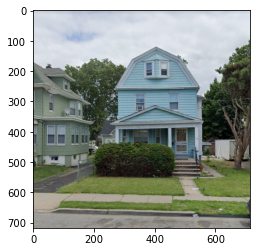

OrderedDict([('0',
              tensor([[[[-0.1991,  0.0026,  0.0092,  ...,  0.0507, -0.0953,  0.1259],
                        [-0.3299, -0.2723, -0.2656,  ..., -0.1242, -0.1929,  0.0618],
                        [-0.2950, -0.2788, -0.2796,  ..., -0.1172, -0.1487,  0.0854],
                        ...,
                        [ 0.0581, -0.0995, -0.0914,  ..., -0.2489, -0.1784, -0.1366],
                        [ 0.0645, -0.0619, -0.0635,  ..., -0.1888, -0.1395, -0.1380],
                        [ 0.0626, -0.1144, -0.1147,  ..., -0.2066, -0.1612, -0.1996]],
              
                       [[ 0.0919,  0.2492,  0.1616,  ..., -0.0877, -0.0304,  0.0289],
                        [ 0.2652,  0.2165,  0.1183,  ..., -0.1978, -0.0413,  0.0319],
                        [ 0.2716,  0.2303,  0.1322,  ..., -0.1786, -0.0309,  0.0245],
                        ...,
                        [-0.0409,  0.0489,  0.0092,  ..., -0.0629, -0.0816, -0.0960],
                        [ 0.0545,  0.1384,  0.0

In [90]:
import torch
from torch.autograd import Variable
import torch.nn
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
import numpy as np
import io
import os
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, ToPILImage, transforms
 

class DaC_net(nn.Module):
    
    def __init__(self):
        super(DaC_net, self).__init__()
        self.fpn_backbone = torchvision.models.detection.backbone_utils.resnet_fpn_backbone('resnet50', pretrained=True )
 
    def forward(self, x):
        
        out = self.fpn_backbone(x)
 
        return out


net_DaC = DaC_net()
net_DaC.eval()

file = r'C:\Users\N\Pictures\test.png'

image = Image.open(file)
plt.imshow(image)

image = ToTensor()(image).unsqueeze(0) 
    
# img = np.fromarray(img)


plt.show()
re = net_DaC(image)
re

In [91]:
print(len(re))

5


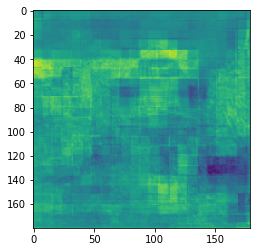

In [112]:
# re["0"].shape
plt.imshow(re["0"].detach().numpy()[0][9] )

In [75]:
re["1"].shape

torch.Size([1, 256, 90, 90])

In [76]:
re["2"].shape

torch.Size([1, 256, 45, 45])

In [77]:
re["3"].shape

torch.Size([1, 256, 23, 23])

In [79]:
re["pool"].shape

torch.Size([1, 256, 12, 12])

In [25]:
import torch
from torch.autograd import Variable
import torch.nn

class my_net(nn.Module):
    def __init__(self):
        super(my_net, self).__init__()
        self.features1 = torch.nn.Sequential(
                            torch.nn.Conv2d(3, 5, 3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.Conv2d(5, 10, 3, padding=1),
                            )
        # Take the output of this layer as the input of net2
        self.features2 = torch.nn.Sequential(
                            torch.nn.ReLU(),
                            torch.nn.Conv2d(10, 15, 3, padding=1)
                            )
    def forward(self, x):
        x1 = self.features1(x)
        x2 = self.features2(x1)

        # 呃呃呃呃呃， 对，通过这种方式进行返回，虽然ugly，但是straightforward
        return (x1,x2)

class my_net2(nn.Module):
    def __init__(self):
        super(my_net2, self).__init__()
        self.features = torch.nn.Sequential(
                            torch.nn.Conv2d(10, 25, 3, padding=1)
                            )
    def forward(self, x):
        x = self.features(x)
        return x

net1 = my_net().cuda()
net2 = my_net2().cuda()


input1 = Variable(torch.ones(1, 3, 10, 10).cuda())
feat_for_net2, out1 = net1(input1)

# input of net2 are features got from net1
input2 = feat_for_net2
out2 = net2(input2)

# Create targets
target1 = Variable(torch.ones_like(out1.data)).cuda()
target2 = Variable(torch.ones(1, 25, 10, 10)*2).cuda()


criterion1 = torch.nn.MSELoss(size_average=False)
criterion2 = torch.nn.MSELoss(size_average=False)

loss1 = criterion1(out1, target1)

loss2 = criterion2(out2, target2)

loss = loss1+loss2
loss.backward()
 

In [27]:
from collections import OrderedDict

import torch
from torch import nn
import torch.nn.functional as F

from torchvision.ops import misc as misc_nn_ops
from torchvision.ops import MultiScaleRoIAlign

from ..utils import load_state_dict_from_url

from .generalized_rcnn import GeneralizedRCNN
from .rpn import AnchorGenerator, RPNHead, RegionProposalNetwork
from .roi_heads import RoIHeads
from .transform import GeneralizedRCNNTransform
from .backbone_utils import resnet_fpn_backbone


__all__ = [
    "FasterRCNN", "fasterrcnn_resnet50_fpn",
]


class FasterRCNN(GeneralizedRCNN):
    """
    Implements Faster R-CNN.
    The input to the model is expected to be a list of tensors, each of shape [C, H, W], one for each
    image, and should be in 0-1 range. Different images can have different sizes.
    The behavior of the model changes depending if it is in training or evaluation mode.
    During training, the model expects both the input tensors, as well as a targets (list of dictionary),
    containing:
        - boxes (FloatTensor[N, 4]): the ground-truth boxes in [x1, y1, x2, y2] format, with values of x
          between 0 and W and values of y between 0 and H
        - labels (Int64Tensor[N]): the class label for each ground-truth box
    The model returns a Dict[Tensor] during training, containing the classification and regression
    losses for both the RPN and the R-CNN.
    During inference, the model requires only the input tensors, and returns the post-processed
    predictions as a List[Dict[Tensor]], one for each input image. The fields of the Dict are as
    follows:
        - boxes (FloatTensor[N, 4]): the predicted boxes in [x1, y1, x2, y2] format, with values of x
          between 0 and W and values of y between 0 and H
        - labels (Int64Tensor[N]): the predicted labels for each image
        - scores (Tensor[N]): the scores or each prediction
    Arguments:
        backbone (nn.Module): the network used to compute the features for the model.
            It should contain a out_channels attribute, which indicates the number of output
            channels that each feature map has (and it should be the same for all feature maps).
            The backbone should return a single Tensor or and OrderedDict[Tensor].
        num_classes (int): number of output classes of the model (including the background).
            If box_predictor is specified, num_classes should be None.
        min_size (int): minimum size of the image to be rescaled before feeding it to the backbone
        max_size (int): maximum size of the image to be rescaled before feeding it to the backbone
        image_mean (Tuple[float, float, float]): mean values used for input normalization.
            They are generally the mean values of the dataset on which the backbone has been trained
            on
        image_std (Tuple[float, float, float]): std values used for input normalization.
            They are generally the std values of the dataset on which the backbone has been trained on
        rpn_anchor_generator (AnchorGenerator): module that generates the anchors for a set of feature
            maps.
        rpn_head (nn.Module): module that computes the objectness and regression deltas from the RPN
        rpn_pre_nms_top_n_train (int): number of proposals to keep before applying NMS during training
        rpn_pre_nms_top_n_test (int): number of proposals to keep before applying NMS during testing
        rpn_post_nms_top_n_train (int): number of proposals to keep after applying NMS during training
        rpn_post_nms_top_n_test (int): number of proposals to keep after applying NMS during testing
        rpn_nms_thresh (float): NMS threshold used for postprocessing the RPN proposals
        rpn_fg_iou_thresh (float): minimum IoU between the anchor and the GT box so that they can be
            considered as positive during training of the RPN.
        rpn_bg_iou_thresh (float): maximum IoU between the anchor and the GT box so that they can be
            considered as negative during training of the RPN.
        rpn_batch_size_per_image (int): number of anchors that are sampled during training of the RPN
            for computing the loss
        rpn_positive_fraction (float): proportion of positive anchors in a mini-batch during training
            of the RPN
        box_roi_pool (MultiScaleRoIAlign): the module which crops and resizes the feature maps in
            the locations indicated by the bounding boxes
        box_head (nn.Module): module that takes the cropped feature maps as input
        box_predictor (nn.Module): module that takes the output of box_head and returns the
            classification logits and box regression deltas.
        box_score_thresh (float): during inference, only return proposals with a classification score
            greater than box_score_thresh
        box_nms_thresh (float): NMS threshold for the prediction head. Used during inference
        box_detections_per_img (int): maximum number of detections per image, for all classes.
        box_fg_iou_thresh (float): minimum IoU between the proposals and the GT box so that they can be
            considered as positive during training of the classification head
        box_bg_iou_thresh (float): maximum IoU between the proposals and the GT box so that they can be
            considered as negative during training of the classification head
        box_batch_size_per_image (int): number of proposals that are sampled during training of the
            classification head
        box_positive_fraction (float): proportion of positive proposals in a mini-batch during training
            of the classification head
        bbox_reg_weights (Tuple[float, float, float, float]): weights for the encoding/decoding of the
            bounding boxes
    Example::
        >>> import torch
        >>> import torchvision
        >>> from torchvision.models.detection import FasterRCNN
        >>> from torchvision.models.detection.rpn import AnchorGenerator
        >>> # load a pre-trained model for classification and return
        >>> # only the features
        >>> backbone = torchvision.models.mobilenet_v2(pretrained=True).features
        >>> # FasterRCNN needs to know the number of
        >>> # output channels in a backbone. For mobilenet_v2, it's 1280
        >>> # so we need to add it here
        >>> backbone.out_channels = 1280
        >>>
        >>> # let's make the RPN generate 5 x 3 anchors per spatial
        >>> # location, with 5 different sizes and 3 different aspect
        >>> # ratios. We have a Tuple[Tuple[int]] because each feature
        >>> # map could potentially have different sizes and
        >>> # aspect ratios
        >>> anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
        >>>                                    aspect_ratios=((0.5, 1.0, 2.0),))
        >>>
        >>> # let's define what are the feature maps that we will
        >>> # use to perform the region of interest cropping, as well as
        >>> # the size of the crop after rescaling.
        >>> # if your backbone returns a Tensor, featmap_names is expected to
        >>> # be ['0']. More generally, the backbone should return an
        >>> # OrderedDict[Tensor], and in featmap_names you can choose which
        >>> # feature maps to use.
        >>> roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
        >>>                                                 output_size=7,
        >>>                                                 sampling_ratio=2)
        >>>
        >>> # put the pieces together inside a FasterRCNN model
        >>> model = FasterRCNN(backbone,
        >>>                    num_classes=2,
        >>>                    rpn_anchor_generator=anchor_generator,
        >>>                    box_roi_pool=roi_pooler)
        >>> model.eval()
        >>> x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
        >>> predictions = model(x)
    """

    def __init__(self, backbone, num_classes=None,
                 # transform parameters
                 min_size=800, max_size=1333,
                 image_mean=None, image_std=None,
                 # RPN parameters
                 rpn_anchor_generator=None, rpn_head=None,
                 rpn_pre_nms_top_n_train=2000, rpn_pre_nms_top_n_test=1000,
                 rpn_post_nms_top_n_train=2000, rpn_post_nms_top_n_test=1000,
                 rpn_nms_thresh=0.7,
                 rpn_fg_iou_thresh=0.7, rpn_bg_iou_thresh=0.3,
                 rpn_batch_size_per_image=256, rpn_positive_fraction=0.5,
                 # Box parameters
                 box_roi_pool=None, box_head=None, box_predictor=None,
                 box_score_thresh=0.05, box_nms_thresh=0.5, box_detections_per_img=100,
                 box_fg_iou_thresh=0.5, box_bg_iou_thresh=0.5,
                 box_batch_size_per_image=512, box_positive_fraction=0.25,
                 bbox_reg_weights=None):

        if not hasattr(backbone, "out_channels"):
            raise ValueError(
                "backbone should contain an attribute out_channels "
                "specifying the number of output channels (assumed to be the "
                "same for all the levels)")

        assert isinstance(rpn_anchor_generator, (AnchorGenerator, type(None)))
        assert isinstance(box_roi_pool, (MultiScaleRoIAlign, type(None)))

        if num_classes is not None:
            if box_predictor is not None:
                raise ValueError("num_classes should be None when box_predictor is specified")
        else:
            if box_predictor is None:
                raise ValueError("num_classes should not be None when box_predictor "
                                 "is not specified")

        out_channels = backbone.out_channels

        if rpn_anchor_generator is None:
            anchor_sizes = ((32,), (64,), (128,), (256,), (512,))
            aspect_ratios = ((0.5, 1.0, 2.0),) * len(anchor_sizes)
            rpn_anchor_generator = AnchorGenerator(
                anchor_sizes, aspect_ratios
            )
        if rpn_head is None:
            rpn_head = RPNHead(
                out_channels, rpn_anchor_generator.num_anchors_per_location()[0]
            )

        rpn_pre_nms_top_n = dict(training=rpn_pre_nms_top_n_train, testing=rpn_pre_nms_top_n_test)
        rpn_post_nms_top_n = dict(training=rpn_post_nms_top_n_train, testing=rpn_post_nms_top_n_test)

        rpn = RegionProposalNetwork(
            rpn_anchor_generator, rpn_head,
            rpn_fg_iou_thresh, rpn_bg_iou_thresh,
            rpn_batch_size_per_image, rpn_positive_fraction,
            rpn_pre_nms_top_n, rpn_post_nms_top_n, rpn_nms_thresh)

        if box_roi_pool is None:
            box_roi_pool = MultiScaleRoIAlign(
                featmap_names=['0', '1', '2', '3'],
                output_size=7,
                sampling_ratio=2)

        if box_head is None:
            resolution = box_roi_pool.output_size[0]
            representation_size = 1024
            box_head = TwoMLPHead(
                out_channels * resolution ** 2,
                representation_size)

        if box_predictor is None:
            representation_size = 1024
            box_predictor = FastRCNNPredictor(
                representation_size,
                num_classes)

        roi_heads = RoIHeads(
            # Box
            box_roi_pool, box_head, box_predictor,
            box_fg_iou_thresh, box_bg_iou_thresh,
            box_batch_size_per_image, box_positive_fraction,
            bbox_reg_weights,
            box_score_thresh, box_nms_thresh, box_detections_per_img)

        if image_mean is None:
            image_mean = [0.485, 0.456, 0.406]
        if image_std is None:
            image_std = [0.229, 0.224, 0.225]
        transform = GeneralizedRCNNTransform(min_size, max_size, image_mean, image_std)

        super(FasterRCNN, self).__init__(backbone, rpn, roi_heads, transform)


class TwoMLPHead(nn.Module):
    """
    Standard heads for FPN-based models
    Arguments:
        in_channels (int): number of input channels
        representation_size (int): size of the intermediate representation
    """

    def __init__(self, in_channels, representation_size):
        super(TwoMLPHead, self).__init__()

        self.fc6 = nn.Linear(in_channels, representation_size)
        self.fc7 = nn.Linear(representation_size, representation_size)

    def forward(self, x):
        x = x.flatten(start_dim=1)

        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))

        return x


class FastRCNNPredictor(nn.Module):
    """
    Standard classification + bounding box regression layers
    for Fast R-CNN.
    Arguments:
        in_channels (int): number of input channels
        num_classes (int): number of output classes (including background)
    """

    def __init__(self, in_channels, num_classes):
        super(FastRCNNPredictor, self).__init__()
        self.cls_score = nn.Linear(in_channels, num_classes)
        self.bbox_pred = nn.Linear(in_channels, num_classes * 4)

    def forward(self, x):
        if x.dim() == 4:
            assert list(x.shape[2:]) == [1, 1]
        x = x.flatten(start_dim=1)
        scores = self.cls_score(x)
        bbox_deltas = self.bbox_pred(x)

        return scores, bbox_deltas


model_urls = {
    'fasterrcnn_resnet50_fpn_coco':
        'https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth',
}


def fasterrcnn_resnet50_fpn(pretrained=False, progress=True,
                            num_classes=91, pretrained_backbone=True, trainable_backbone_layers=3, **kwargs):
    """
    Constructs a Faster R-CNN model with a ResNet-50-FPN backbone.
    The input to the model is expected to be a list of tensors, each of shape ``[C, H, W]``, one for each
    image, and should be in ``0-1`` range. Different images can have different sizes.
    The behavior of the model changes depending if it is in training or evaluation mode.
    During training, the model expects both the input tensors, as well as a targets (list of dictionary),
    containing:
        - boxes (``FloatTensor[N, 4]``): the ground-truth boxes in ``[x1, y1, x2, y2]`` format, with values of ``x``
          between ``0`` and ``W`` and values of ``y`` between ``0`` and ``H``
        - labels (``Int64Tensor[N]``): the class label for each ground-truth box
    The model returns a ``Dict[Tensor]`` during training, containing the classification and regression
    losses for both the RPN and the R-CNN.
    During inference, the model requires only the input tensors, and returns the post-processed
    predictions as a ``List[Dict[Tensor]]``, one for each input image. The fields of the ``Dict`` are as
    follows:
        - boxes (``FloatTensor[N, 4]``): the predicted boxes in ``[x1, y1, x2, y2]`` format, with values of ``x``
          between ``0`` and ``W`` and values of ``y`` between ``0`` and ``H``
        - labels (``Int64Tensor[N]``): the predicted labels for each image
        - scores (``Tensor[N]``): the scores or each prediction
    Faster R-CNN is exportable to ONNX for a fixed batch size with inputs images of fixed size.
    Example::
        >>> model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
        >>> # For training
        >>> images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
        >>> labels = torch.randint(1, 91, (4, 11))
        >>> images = list(image for image in images)
        >>> targets = []
        >>> for i in range(len(images)):
        >>>     d = {}
        >>>     d['boxes'] = boxes[i]
        >>>     d['labels'] = labels[i]
        >>>     targets.append(d)
        >>> output = model(images, targets)
        >>> # For inference
        >>> model.eval()
        >>> x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
        >>> predictions = model(x)
        >>>
        >>> # optionally, if you want to export the model to ONNX:
        >>> torch.onnx.export(model, x, "faster_rcnn.onnx", opset_version = 11)
    Arguments:
        pretrained (bool): If True, returns a model pre-trained on COCO train2017
        progress (bool): If True, displays a progress bar of the download to stderr
        pretrained_backbone (bool): If True, returns a model with backbone pre-trained on Imagenet
        num_classes (int): number of output classes of the model (including the background)
        trainable_backbone_layers (int): number of trainable (not frozen) resnet layers starting from final block.
            Valid values are between 0 and 5, with 5 meaning all backbone layers are trainable.
    """
    assert trainable_backbone_layers <= 5 and trainable_backbone_layers >= 0
    # dont freeze any layers if pretrained model or backbone is not used
    if not (pretrained or pretrained_backbone):
        trainable_backbone_layers = 5
    if pretrained:
        # no need to download the backbone if pretrained is set
        pretrained_backbone = False
    backbone = resnet_fpn_backbone('resnet50', pretrained_backbone, trainable_layers=trainable_backbone_layers)
    model = FasterRCNN(backbone, num_classes, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls['fasterrcnn_resnet50_fpn_coco'],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model

ValueError: attempted relative import beyond top-level package

In [154]:
'''ResNet-18 Image classfication for cifar-10 with PyTorch 

Author 'Sun-qian'.

'''
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(outchannel)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(outchannel)
            )

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, ResidualBlock, num_classes=10):
        super(ResNet, self).__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.layer1 = self.make_layer(ResidualBlock, 64,  2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)   #strides=[1,1]
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


def ResNet18():

    return ResNet(ResidualBlock)
 

In [135]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import argparse
# from resnet import ResNet18
import os

# 定义是否使用GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 参数设置,使得我们能够手动输入命令行参数，就是让风格变得和Linux命令行差不多
# parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
# parser.add_argument('--outf', default='./model/', help='folder to output images and model checkpoints') #输出结果保存路径
# args = parser.parse_args()

# 超参数设置
EPOCH = 135   #遍历数据集次数
pre_epoch = 0  # 定义已经遍历数据集的次数
BATCH_SIZE = 128      #批处理尺寸(batch_size)
LR = 0.01        #学习率

# 准备数据集并预处理
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，在吧图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train) #训练数据集
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)   #生成一个个batch进行批训练，组成batch的时候顺序打乱取

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
# Cifar-10的标签
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 模型定义-ResNet
net = ResNet18().to(device)

# 定义损失函数和优化方式
criterion = nn.CrossEntropyLoss()  #损失函数为交叉熵，多用于多分类问题
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9, weight_decay=5e-4) #优化方式为mini-batch momentum-SGD，并采用L2正则化（权重衰减）

# 训练
if __name__ == "__main__":
#     if not os.path.exists(args.outf):
#         os.makedirs(args.outf)
    best_acc = 85  #2 初始化best test accuracy
    print("Start Training, Resnet-18!")  # 定义遍历数据集的次数
    with open("acc.txt", "w") as f:
        with open("log.txt", "w")as f2:
            for epoch in range(pre_epoch, EPOCH):
                print('\nEpoch: %d' % (epoch + 1))
                net.train()
                sum_loss = 0.0
                correct = 0.0
                total = 0.0
                for i, data in enumerate(trainloader, 0):
                    # 准备数据
                    length = len(trainloader)
                    inputs, labels = data
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()

                    # forward + backward
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    
                    for param_group in optimizer.param_groups:
                        print("param_group[‘lr’]:", param_group['lr'])
                    
#                     print(optimizer.)

                    # 每训练1个batch打印一次loss和准确率
                    sum_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += predicted.eq(labels.data).cpu().sum()
                    print('[epoch:%d, iter:%d] Loss: %.03f | Acc: %.3f%% '
                          % (epoch + 1, (i + 1 + epoch * length), sum_loss / (i + 1), 100. * correct / total))
                    f2.write('%03d  %05d |Loss: %.03f | Acc: %.3f%% '
                          % (epoch + 1, (i + 1 + epoch * length), sum_loss / (i + 1), 100. * correct / total))
                    f2.write('\n')
                    f2.flush()

                # 每训练完一个epoch测试一下准确率
                print("Waiting Test!")
                with torch.no_grad():
                    correct = 0
                    total = 0
                    for data in testloader:
                        net.eval()
                        images, labels = data
                        images, labels = images.to(device), labels.to(device)
                        outputs = net(images)
                        # 取得分最高的那个类 (outputs.data的索引号)
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum()
                    print('测试分类准确率为：%.3f%%' % (100 * correct / total))
                    acc = 100. * correct / total
                    # 将每次测试结果实时写入acc.txt文件中
                    print('Saving model......')
                    torch.save(net.state_dict(), 'resnet_%03d.pth' % (epoch + 1))
                    f.write("EPOCH=%03d,Accuracy= %.3f%%" % (epoch + 1, acc))
                    f.write('\n')
                    f.flush()
                    # 记录最佳测试分类准确率并写入best_acc.txt文件中
                    if acc > best_acc:
                        f3 = open("best_acc.txt", "w")
                        f3.write("EPOCH=%d,best_acc= %.3f%%" % (epoch + 1, acc))
                        f3.close()
                        best_acc = acc
            print("Training Finished, TotalEPOCH=%d" % EPOCH)



Files already downloaded and verified
Files already downloaded and verified
Start Training, Resnet-18!

Epoch: 1
param_group[‘lr’]: 0.01
[epoch:1, iter:1] Loss: 2.398 | Acc: 10.156% 
param_group[‘lr’]: 0.01
[epoch:1, iter:2] Loss: 2.339 | Acc: 10.938% 
param_group[‘lr’]: 0.01
[epoch:1, iter:3] Loss: 2.327 | Acc: 10.156% 
param_group[‘lr’]: 0.01
[epoch:1, iter:4] Loss: 2.309 | Acc: 11.523% 
param_group[‘lr’]: 0.01
[epoch:1, iter:5] Loss: 2.297 | Acc: 12.188% 
param_group[‘lr’]: 0.01
[epoch:1, iter:6] Loss: 2.275 | Acc: 13.411% 
param_group[‘lr’]: 0.01
[epoch:1, iter:7] Loss: 2.253 | Acc: 14.732% 
param_group[‘lr’]: 0.01
[epoch:1, iter:8] Loss: 2.240 | Acc: 15.820% 
param_group[‘lr’]: 0.01
[epoch:1, iter:9] Loss: 2.220 | Acc: 16.667% 
param_group[‘lr’]: 0.01
[epoch:1, iter:10] Loss: 2.212 | Acc: 17.578% 
param_group[‘lr’]: 0.01
[epoch:1, iter:11] Loss: 2.208 | Acc: 17.614% 
param_group[‘lr’]: 0.01
[epoch:1, iter:12] Loss: 2.193 | Acc: 18.034% 
param_group[‘lr’]: 0.01
[epoch:1, iter:13] L

[epoch:1, iter:116] Loss: 1.770 | Acc: 34.294% 
param_group[‘lr’]: 0.01
[epoch:1, iter:117] Loss: 1.767 | Acc: 34.422% 
param_group[‘lr’]: 0.01
[epoch:1, iter:118] Loss: 1.766 | Acc: 34.474% 
param_group[‘lr’]: 0.01
[epoch:1, iter:119] Loss: 1.765 | Acc: 34.519% 
param_group[‘lr’]: 0.01
[epoch:1, iter:120] Loss: 1.763 | Acc: 34.577% 
param_group[‘lr’]: 0.01
[epoch:1, iter:121] Loss: 1.761 | Acc: 34.659% 
param_group[‘lr’]: 0.01
[epoch:1, iter:122] Loss: 1.759 | Acc: 34.721% 
param_group[‘lr’]: 0.01
[epoch:1, iter:123] Loss: 1.757 | Acc: 34.788% 
param_group[‘lr’]: 0.01
[epoch:1, iter:124] Loss: 1.755 | Acc: 34.879% 
param_group[‘lr’]: 0.01
[epoch:1, iter:125] Loss: 1.755 | Acc: 34.906% 
param_group[‘lr’]: 0.01
[epoch:1, iter:126] Loss: 1.753 | Acc: 34.958% 
param_group[‘lr’]: 0.01
[epoch:1, iter:127] Loss: 1.749 | Acc: 35.125% 
param_group[‘lr’]: 0.01
[epoch:1, iter:128] Loss: 1.747 | Acc: 35.248% 
param_group[‘lr’]: 0.01
[epoch:1, iter:129] Loss: 1.746 | Acc: 35.289% 
param_group[‘lr’

[epoch:1, iter:231] Loss: 1.593 | Acc: 41.075% 
param_group[‘lr’]: 0.01
[epoch:1, iter:232] Loss: 1.592 | Acc: 41.113% 
param_group[‘lr’]: 0.01
[epoch:1, iter:233] Loss: 1.591 | Acc: 41.131% 
param_group[‘lr’]: 0.01
[epoch:1, iter:234] Loss: 1.591 | Acc: 41.149% 
param_group[‘lr’]: 0.01
[epoch:1, iter:235] Loss: 1.589 | Acc: 41.237% 
param_group[‘lr’]: 0.01
[epoch:1, iter:236] Loss: 1.588 | Acc: 41.280% 
param_group[‘lr’]: 0.01
[epoch:1, iter:237] Loss: 1.588 | Acc: 41.291% 
param_group[‘lr’]: 0.01
[epoch:1, iter:238] Loss: 1.587 | Acc: 41.304% 
param_group[‘lr’]: 0.01
[epoch:1, iter:239] Loss: 1.586 | Acc: 41.354% 
param_group[‘lr’]: 0.01
[epoch:1, iter:240] Loss: 1.585 | Acc: 41.413% 
param_group[‘lr’]: 0.01
[epoch:1, iter:241] Loss: 1.584 | Acc: 41.455% 
param_group[‘lr’]: 0.01
[epoch:1, iter:242] Loss: 1.583 | Acc: 41.490% 
param_group[‘lr’]: 0.01
[epoch:1, iter:243] Loss: 1.581 | Acc: 41.557% 
param_group[‘lr’]: 0.01
[epoch:1, iter:244] Loss: 1.581 | Acc: 41.586% 
param_group[‘lr’

param_group[‘lr’]: 0.01
[epoch:1, iter:346] Loss: 1.480 | Acc: 45.615% 
param_group[‘lr’]: 0.01
[epoch:1, iter:347] Loss: 1.479 | Acc: 45.657% 
param_group[‘lr’]: 0.01
[epoch:1, iter:348] Loss: 1.478 | Acc: 45.703% 
param_group[‘lr’]: 0.01
[epoch:1, iter:349] Loss: 1.477 | Acc: 45.722% 
param_group[‘lr’]: 0.01
[epoch:1, iter:350] Loss: 1.476 | Acc: 45.781% 
param_group[‘lr’]: 0.01
[epoch:1, iter:351] Loss: 1.475 | Acc: 45.824% 
param_group[‘lr’]: 0.01
[epoch:1, iter:352] Loss: 1.474 | Acc: 45.854% 
param_group[‘lr’]: 0.01
[epoch:1, iter:353] Loss: 1.474 | Acc: 45.886% 
param_group[‘lr’]: 0.01
[epoch:1, iter:354] Loss: 1.473 | Acc: 45.922% 
param_group[‘lr’]: 0.01
[epoch:1, iter:355] Loss: 1.471 | Acc: 45.973% 
param_group[‘lr’]: 0.01
[epoch:1, iter:356] Loss: 1.470 | Acc: 46.019% 
param_group[‘lr’]: 0.01
[epoch:1, iter:357] Loss: 1.470 | Acc: 46.028% 
param_group[‘lr’]: 0.01
[epoch:1, iter:358] Loss: 1.469 | Acc: 46.057% 
param_group[‘lr’]: 0.01
[epoch:1, iter:359] Loss: 1.468 | Acc: 4

param_group[‘lr’]: 0.01
[epoch:2, iter:460] Loss: 1.080 | Acc: 61.639% 
param_group[‘lr’]: 0.01
[epoch:2, iter:461] Loss: 1.079 | Acc: 61.708% 
param_group[‘lr’]: 0.01
[epoch:2, iter:462] Loss: 1.080 | Acc: 61.686% 
param_group[‘lr’]: 0.01
[epoch:2, iter:463] Loss: 1.080 | Acc: 61.719% 
param_group[‘lr’]: 0.01
[epoch:2, iter:464] Loss: 1.078 | Acc: 61.815% 
param_group[‘lr’]: 0.01
[epoch:2, iter:465] Loss: 1.076 | Acc: 61.814% 
param_group[‘lr’]: 0.01
[epoch:2, iter:466] Loss: 1.074 | Acc: 61.927% 
param_group[‘lr’]: 0.01
[epoch:2, iter:467] Loss: 1.073 | Acc: 61.996% 
param_group[‘lr’]: 0.01
[epoch:2, iter:468] Loss: 1.073 | Acc: 62.074% 
param_group[‘lr’]: 0.01
[epoch:2, iter:469] Loss: 1.069 | Acc: 62.179% 
param_group[‘lr’]: 0.01
[epoch:2, iter:470] Loss: 1.069 | Acc: 62.243% 
param_group[‘lr’]: 0.01
[epoch:2, iter:471] Loss: 1.069 | Acc: 62.275% 
param_group[‘lr’]: 0.01
[epoch:2, iter:472] Loss: 1.068 | Acc: 62.230% 
param_group[‘lr’]: 0.01
[epoch:2, iter:473] Loss: 1.066 | Acc: 6

[epoch:2, iter:575] Loss: 1.022 | Acc: 63.668% 
param_group[‘lr’]: 0.01
[epoch:2, iter:576] Loss: 1.022 | Acc: 63.661% 
param_group[‘lr’]: 0.01
[epoch:2, iter:577] Loss: 1.023 | Acc: 63.638% 
param_group[‘lr’]: 0.01
[epoch:2, iter:578] Loss: 1.023 | Acc: 63.649% 
param_group[‘lr’]: 0.01
[epoch:2, iter:579] Loss: 1.023 | Acc: 63.647% 
param_group[‘lr’]: 0.01
[epoch:2, iter:580] Loss: 1.023 | Acc: 63.657% 
param_group[‘lr’]: 0.01
[epoch:2, iter:581] Loss: 1.024 | Acc: 63.618% 
param_group[‘lr’]: 0.01
[epoch:2, iter:582] Loss: 1.024 | Acc: 63.617% 
param_group[‘lr’]: 0.01
[epoch:2, iter:583] Loss: 1.024 | Acc: 63.623% 
param_group[‘lr’]: 0.01
[epoch:2, iter:584] Loss: 1.023 | Acc: 63.629% 
param_group[‘lr’]: 0.01
[epoch:2, iter:585] Loss: 1.022 | Acc: 63.644% 
param_group[‘lr’]: 0.01
[epoch:2, iter:586] Loss: 1.021 | Acc: 63.678% 
param_group[‘lr’]: 0.01
[epoch:2, iter:587] Loss: 1.020 | Acc: 63.716% 
param_group[‘lr’]: 0.01
[epoch:2, iter:588] Loss: 1.020 | Acc: 63.706% 
param_group[‘lr’

param_group[‘lr’]: 0.01
[epoch:2, iter:689] Loss: 0.983 | Acc: 65.001% 
param_group[‘lr’]: 0.01
[epoch:2, iter:690] Loss: 0.982 | Acc: 65.019% 
param_group[‘lr’]: 0.01
[epoch:2, iter:691] Loss: 0.982 | Acc: 65.049% 
param_group[‘lr’]: 0.01
[epoch:2, iter:692] Loss: 0.982 | Acc: 65.041% 
param_group[‘lr’]: 0.01
[epoch:2, iter:693] Loss: 0.981 | Acc: 65.084% 
param_group[‘lr’]: 0.01
[epoch:2, iter:694] Loss: 0.981 | Acc: 65.094% 
param_group[‘lr’]: 0.01
[epoch:2, iter:695] Loss: 0.981 | Acc: 65.088% 
param_group[‘lr’]: 0.01
[epoch:2, iter:696] Loss: 0.981 | Acc: 65.082% 
param_group[‘lr’]: 0.01
[epoch:2, iter:697] Loss: 0.981 | Acc: 65.091% 
param_group[‘lr’]: 0.01
[epoch:2, iter:698] Loss: 0.980 | Acc: 65.111% 
param_group[‘lr’]: 0.01
[epoch:2, iter:699] Loss: 0.980 | Acc: 65.146% 
param_group[‘lr’]: 0.01
[epoch:2, iter:700] Loss: 0.979 | Acc: 65.162% 
param_group[‘lr’]: 0.01
[epoch:2, iter:701] Loss: 0.978 | Acc: 65.176% 
param_group[‘lr’]: 0.01
[epoch:2, iter:702] Loss: 0.978 | Acc: 6

[epoch:3, iter:802] Loss: 0.768 | Acc: 73.750% 
param_group[‘lr’]: 0.01
[epoch:3, iter:803] Loss: 0.765 | Acc: 73.810% 
param_group[‘lr’]: 0.01
[epoch:3, iter:804] Loss: 0.768 | Acc: 73.580% 
param_group[‘lr’]: 0.01
[epoch:3, iter:805] Loss: 0.773 | Acc: 73.370% 
param_group[‘lr’]: 0.01
[epoch:3, iter:806] Loss: 0.766 | Acc: 73.535% 
param_group[‘lr’]: 0.01
[epoch:3, iter:807] Loss: 0.763 | Acc: 73.688% 
param_group[‘lr’]: 0.01
[epoch:3, iter:808] Loss: 0.759 | Acc: 73.798% 
param_group[‘lr’]: 0.01
[epoch:3, iter:809] Loss: 0.763 | Acc: 73.698% 
param_group[‘lr’]: 0.01
[epoch:3, iter:810] Loss: 0.762 | Acc: 73.717% 
param_group[‘lr’]: 0.01
[epoch:3, iter:811] Loss: 0.762 | Acc: 73.680% 
param_group[‘lr’]: 0.01
[epoch:3, iter:812] Loss: 0.756 | Acc: 73.802% 
param_group[‘lr’]: 0.01
[epoch:3, iter:813] Loss: 0.752 | Acc: 73.841% 
param_group[‘lr’]: 0.01
[epoch:3, iter:814] Loss: 0.754 | Acc: 73.877% 
param_group[‘lr’]: 0.01
[epoch:3, iter:815] Loss: 0.752 | Acc: 73.982% 
param_group[‘lr’

param_group[‘lr’]: 0.01
[epoch:3, iter:917] Loss: 0.758 | Acc: 73.895% 
param_group[‘lr’]: 0.01
[epoch:3, iter:918] Loss: 0.757 | Acc: 73.886% 
param_group[‘lr’]: 0.01
[epoch:3, iter:919] Loss: 0.757 | Acc: 73.905% 
param_group[‘lr’]: 0.01
[epoch:3, iter:920] Loss: 0.757 | Acc: 73.890% 
param_group[‘lr’]: 0.01
[epoch:3, iter:921] Loss: 0.757 | Acc: 73.882% 
param_group[‘lr’]: 0.01
[epoch:3, iter:922] Loss: 0.757 | Acc: 73.834% 
param_group[‘lr’]: 0.01
[epoch:3, iter:923] Loss: 0.757 | Acc: 73.842% 
param_group[‘lr’]: 0.01
[epoch:3, iter:924] Loss: 0.757 | Acc: 73.839% 
param_group[‘lr’]: 0.01
[epoch:3, iter:925] Loss: 0.757 | Acc: 73.825% 
param_group[‘lr’]: 0.01
[epoch:3, iter:926] Loss: 0.756 | Acc: 73.850% 
param_group[‘lr’]: 0.01
[epoch:3, iter:927] Loss: 0.755 | Acc: 73.847% 
param_group[‘lr’]: 0.01
[epoch:3, iter:928] Loss: 0.756 | Acc: 73.839% 
param_group[‘lr’]: 0.01
[epoch:3, iter:929] Loss: 0.755 | Acc: 73.879% 
param_group[‘lr’]: 0.01
[epoch:3, iter:930] Loss: 0.755 | Acc: 7

[epoch:3, iter:1030] Loss: 0.737 | Acc: 74.452% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1031] Loss: 0.737 | Acc: 74.454% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1032] Loss: 0.737 | Acc: 74.456% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1033] Loss: 0.736 | Acc: 74.471% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1034] Loss: 0.736 | Acc: 74.488% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1035] Loss: 0.736 | Acc: 74.512% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1036] Loss: 0.736 | Acc: 74.508% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1037] Loss: 0.736 | Acc: 74.516% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1038] Loss: 0.735 | Acc: 74.542% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1039] Loss: 0.735 | Acc: 74.544% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1040] Loss: 0.734 | Acc: 74.564% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1041] Loss: 0.734 | Acc: 74.560% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1042] Loss: 0.734 | Acc: 74.567% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1043] Loss: 0.734 | Acc: 74.557% 
pa

param_group[‘lr’]: 0.01
[epoch:3, iter:1143] Loss: 0.719 | Acc: 75.015% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1144] Loss: 0.718 | Acc: 75.047% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1145] Loss: 0.718 | Acc: 75.069% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1146] Loss: 0.718 | Acc: 75.067% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1147] Loss: 0.718 | Acc: 75.071% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1148] Loss: 0.718 | Acc: 75.079% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1149] Loss: 0.717 | Acc: 75.100% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1150] Loss: 0.717 | Acc: 75.113% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1151] Loss: 0.716 | Acc: 75.131% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1152] Loss: 0.716 | Acc: 75.154% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1153] Loss: 0.716 | Acc: 75.166% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1154] Loss: 0.716 | Acc: 75.179% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1155] Loss: 0.716 | Acc: 75.180% 
param_group[‘lr’]: 0.01
[epoch:3, iter:1156] Loss: 

param_group[‘lr’]: 0.01
[epoch:4, iter:1256] Loss: 0.600 | Acc: 78.793% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1257] Loss: 0.598 | Acc: 78.832% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1258] Loss: 0.599 | Acc: 78.814% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1259] Loss: 0.599 | Acc: 78.843% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1260] Loss: 0.599 | Acc: 78.825% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1261] Loss: 0.599 | Acc: 78.782% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1262] Loss: 0.601 | Acc: 78.766% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1263] Loss: 0.601 | Acc: 78.759% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1264] Loss: 0.603 | Acc: 78.709% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1265] Loss: 0.603 | Acc: 78.694% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1266] Loss: 0.603 | Acc: 78.705% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1267] Loss: 0.604 | Acc: 78.674% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1268] Loss: 0.604 | Acc: 78.692% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1269] Loss: 

param_group[‘lr’]: 0.01
[epoch:4, iter:1369] Loss: 0.615 | Acc: 78.675% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1370] Loss: 0.614 | Acc: 78.700% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1371] Loss: 0.614 | Acc: 78.697% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1372] Loss: 0.614 | Acc: 78.714% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1373] Loss: 0.614 | Acc: 78.738% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1374] Loss: 0.613 | Acc: 78.766% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1375] Loss: 0.614 | Acc: 78.763% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1376] Loss: 0.613 | Acc: 78.802% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1377] Loss: 0.613 | Acc: 78.811% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1378] Loss: 0.613 | Acc: 78.811% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1379] Loss: 0.614 | Acc: 78.785% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1380] Loss: 0.614 | Acc: 78.782% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1381] Loss: 0.614 | Acc: 78.775% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1382] Loss: 

param_group[‘lr’]: 0.01
[epoch:4, iter:1482] Loss: 0.604 | Acc: 79.114% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1483] Loss: 0.603 | Acc: 79.133% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1484] Loss: 0.603 | Acc: 79.145% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1485] Loss: 0.603 | Acc: 79.159% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1486] Loss: 0.603 | Acc: 79.183% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1487] Loss: 0.603 | Acc: 79.165% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1488] Loss: 0.604 | Acc: 79.137% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1489] Loss: 0.604 | Acc: 79.139% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1490] Loss: 0.603 | Acc: 79.165% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1491] Loss: 0.603 | Acc: 79.184% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1492] Loss: 0.602 | Acc: 79.195% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1493] Loss: 0.602 | Acc: 79.214% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1494] Loss: 0.602 | Acc: 79.218% 
param_group[‘lr’]: 0.01
[epoch:4, iter:1495] Loss: 

param_group[‘lr’]: 0.01
[epoch:5, iter:1594] Loss: 0.549 | Acc: 81.562% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1595] Loss: 0.545 | Acc: 81.678% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1596] Loss: 0.547 | Acc: 81.519% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1597] Loss: 0.544 | Acc: 81.581% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1598] Loss: 0.547 | Acc: 81.411% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1599] Loss: 0.548 | Acc: 81.384% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1600] Loss: 0.547 | Acc: 81.380% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1601] Loss: 0.545 | Acc: 81.461% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1602] Loss: 0.546 | Acc: 81.373% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1603] Loss: 0.545 | Acc: 81.350% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1604] Loss: 0.544 | Acc: 81.406% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1605] Loss: 0.544 | Acc: 81.402% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1606] Loss: 0.539 | Acc: 81.548% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1607] Loss: 

[epoch:5, iter:1707] Loss: 0.527 | Acc: 81.845% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1708] Loss: 0.528 | Acc: 81.841% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1709] Loss: 0.527 | Acc: 81.880% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1710] Loss: 0.527 | Acc: 81.871% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1711] Loss: 0.526 | Acc: 81.893% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1712] Loss: 0.525 | Acc: 81.899% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1713] Loss: 0.526 | Acc: 81.900% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1714] Loss: 0.525 | Acc: 81.917% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1715] Loss: 0.525 | Acc: 81.923% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1716] Loss: 0.525 | Acc: 81.928% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1717] Loss: 0.524 | Acc: 81.955% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1718] Loss: 0.525 | Acc: 81.935% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1719] Loss: 0.524 | Acc: 81.961% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1720] Loss: 0.524 | Acc: 81.951% 
pa

param_group[‘lr’]: 0.01
[epoch:5, iter:1820] Loss: 0.526 | Acc: 81.812% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1821] Loss: 0.526 | Acc: 81.794% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1822] Loss: 0.526 | Acc: 81.792% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1823] Loss: 0.526 | Acc: 81.787% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1824] Loss: 0.526 | Acc: 81.791% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1825] Loss: 0.525 | Acc: 81.807% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1826] Loss: 0.525 | Acc: 81.808% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1827] Loss: 0.525 | Acc: 81.823% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1828] Loss: 0.524 | Acc: 81.827% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1829] Loss: 0.524 | Acc: 81.831% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1830] Loss: 0.524 | Acc: 81.823% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1831] Loss: 0.524 | Acc: 81.815% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1832] Loss: 0.525 | Acc: 81.801% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1833] Loss: 

[epoch:5, iter:1933] Loss: 0.522 | Acc: 81.809% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1934] Loss: 0.522 | Acc: 81.816% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1935] Loss: 0.522 | Acc: 81.819% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1936] Loss: 0.522 | Acc: 81.823% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1937] Loss: 0.522 | Acc: 81.836% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1938] Loss: 0.522 | Acc: 81.835% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1939] Loss: 0.521 | Acc: 81.838% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1940] Loss: 0.521 | Acc: 81.850% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1941] Loss: 0.521 | Acc: 81.851% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1942] Loss: 0.521 | Acc: 81.849% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1943] Loss: 0.521 | Acc: 81.862% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1944] Loss: 0.521 | Acc: 81.871% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1945] Loss: 0.521 | Acc: 81.882% 
param_group[‘lr’]: 0.01
[epoch:5, iter:1946] Loss: 0.520 | Acc: 81.890% 
pa

param_group[‘lr’]: 0.01
[epoch:6, iter:2045] Loss: 0.451 | Acc: 84.774% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2046] Loss: 0.452 | Acc: 84.727% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2047] Loss: 0.452 | Acc: 84.706% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2048] Loss: 0.451 | Acc: 84.719% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2049] Loss: 0.451 | Acc: 84.732% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2050] Loss: 0.452 | Acc: 84.696% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2051] Loss: 0.452 | Acc: 84.684% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2052] Loss: 0.453 | Acc: 84.689% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2053] Loss: 0.451 | Acc: 84.758% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2054] Loss: 0.450 | Acc: 84.770% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2055] Loss: 0.449 | Acc: 84.828% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2056] Loss: 0.448 | Acc: 84.886% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2057] Loss: 0.448 | Acc: 84.881% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2058] Loss: 

[epoch:6, iter:2158] Loss: 0.461 | Acc: 84.117% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2159] Loss: 0.461 | Acc: 84.141% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2160] Loss: 0.461 | Acc: 84.135% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2161] Loss: 0.461 | Acc: 84.144% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2162] Loss: 0.461 | Acc: 84.152% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2163] Loss: 0.462 | Acc: 84.108% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2164] Loss: 0.461 | Acc: 84.110% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2165] Loss: 0.462 | Acc: 84.115% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2166] Loss: 0.461 | Acc: 84.131% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2167] Loss: 0.461 | Acc: 84.132% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2168] Loss: 0.461 | Acc: 84.140% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2169] Loss: 0.461 | Acc: 84.149% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2170] Loss: 0.460 | Acc: 84.161% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2171] Loss: 0.460 | Acc: 84.165% 
pa

param_group[‘lr’]: 0.01
[epoch:6, iter:2271] Loss: 0.461 | Acc: 84.071% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2272] Loss: 0.460 | Acc: 84.072% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2273] Loss: 0.460 | Acc: 84.070% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2274] Loss: 0.460 | Acc: 84.086% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2275] Loss: 0.460 | Acc: 84.084% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2276] Loss: 0.460 | Acc: 84.085% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2277] Loss: 0.460 | Acc: 84.094% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2278] Loss: 0.460 | Acc: 84.104% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2279] Loss: 0.460 | Acc: 84.095% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2280] Loss: 0.460 | Acc: 84.089% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2281] Loss: 0.460 | Acc: 84.083% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2282] Loss: 0.460 | Acc: 84.067% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2283] Loss: 0.461 | Acc: 84.049% 
param_group[‘lr’]: 0.01
[epoch:6, iter:2284] Loss: 

param_group[‘lr’]: 0.01
[epoch:7, iter:2384] Loss: 0.386 | Acc: 86.143% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2385] Loss: 0.384 | Acc: 86.218% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2386] Loss: 0.382 | Acc: 86.289% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2387] Loss: 0.382 | Acc: 86.319% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2388] Loss: 0.380 | Acc: 86.310% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2389] Loss: 0.381 | Acc: 86.301% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2390] Loss: 0.381 | Acc: 86.293% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2391] Loss: 0.381 | Acc: 86.337% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2392] Loss: 0.384 | Acc: 86.209% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2393] Loss: 0.389 | Acc: 86.137% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2394] Loss: 0.389 | Acc: 86.133% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2395] Loss: 0.391 | Acc: 86.033% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2396] Loss: 0.390 | Acc: 86.016% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2397] Loss: 

param_group[‘lr’]: 0.01
[epoch:7, iter:2498] Loss: 0.416 | Acc: 85.449% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2499] Loss: 0.415 | Acc: 85.478% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2500] Loss: 0.416 | Acc: 85.466% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2501] Loss: 0.417 | Acc: 85.449% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2502] Loss: 0.417 | Acc: 85.447% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2503] Loss: 0.417 | Acc: 85.435% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2504] Loss: 0.417 | Acc: 85.423% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2505] Loss: 0.416 | Acc: 85.412% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2506] Loss: 0.417 | Acc: 85.415% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2507] Loss: 0.417 | Acc: 85.399% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2508] Loss: 0.417 | Acc: 85.397% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2509] Loss: 0.417 | Acc: 85.391% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2510] Loss: 0.418 | Acc: 85.356% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2511] Loss: 

[epoch:7, iter:2610] Loss: 0.413 | Acc: 85.574% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2611] Loss: 0.414 | Acc: 85.566% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2612] Loss: 0.413 | Acc: 85.562% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2613] Loss: 0.413 | Acc: 85.563% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2614] Loss: 0.413 | Acc: 85.567% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2615] Loss: 0.414 | Acc: 85.551% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2616] Loss: 0.414 | Acc: 85.558% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2617] Loss: 0.414 | Acc: 85.551% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2618] Loss: 0.414 | Acc: 85.570% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2619] Loss: 0.414 | Acc: 85.571% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2620] Loss: 0.413 | Acc: 85.575% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2621] Loss: 0.413 | Acc: 85.585% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2622] Loss: 0.414 | Acc: 85.558% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2623] Loss: 0.414 | Acc: 85.548% 
pa

param_group[‘lr’]: 0.01
[epoch:7, iter:2723] Loss: 0.415 | Acc: 85.567% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2724] Loss: 0.415 | Acc: 85.574% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2725] Loss: 0.415 | Acc: 85.575% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2726] Loss: 0.415 | Acc: 85.567% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2727] Loss: 0.415 | Acc: 85.566% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2728] Loss: 0.416 | Acc: 85.559% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2729] Loss: 0.415 | Acc: 85.564% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2730] Loss: 0.415 | Acc: 85.559% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2731] Loss: 0.415 | Acc: 85.566% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2732] Loss: 0.415 | Acc: 85.559% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2733] Loss: 0.416 | Acc: 85.542% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2734] Loss: 0.415 | Acc: 85.537% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2735] Loss: 0.415 | Acc: 85.534% 
param_group[‘lr’]: 0.01
[epoch:7, iter:2736] Loss: 

[epoch:8, iter:2834] Loss: 0.384 | Acc: 86.735% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2835] Loss: 0.384 | Acc: 86.719% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2836] Loss: 0.383 | Acc: 86.766% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2837] Loss: 0.383 | Acc: 86.789% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2838] Loss: 0.383 | Acc: 86.773% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2839] Loss: 0.383 | Acc: 86.780% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2840] Loss: 0.382 | Acc: 86.779% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2841] Loss: 0.383 | Acc: 86.756% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2842] Loss: 0.383 | Acc: 86.734% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2843] Loss: 0.384 | Acc: 86.667% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2844] Loss: 0.384 | Acc: 86.653% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2845] Loss: 0.384 | Acc: 86.668% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2846] Loss: 0.383 | Acc: 86.697% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2847] Loss: 0.384 | Acc: 86.662% 
pa

[epoch:8, iter:2947] Loss: 0.379 | Acc: 86.760% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2948] Loss: 0.379 | Acc: 86.767% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2949] Loss: 0.378 | Acc: 86.767% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2950] Loss: 0.378 | Acc: 86.788% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2951] Loss: 0.378 | Acc: 86.759% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2952] Loss: 0.378 | Acc: 86.755% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2953] Loss: 0.378 | Acc: 86.766% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2954] Loss: 0.379 | Acc: 86.744% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2955] Loss: 0.379 | Acc: 86.733% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2956] Loss: 0.379 | Acc: 86.754% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2957] Loss: 0.378 | Acc: 86.776% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2958] Loss: 0.378 | Acc: 86.793% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2959] Loss: 0.378 | Acc: 86.779% 
param_group[‘lr’]: 0.01
[epoch:8, iter:2960] Loss: 0.378 | Acc: 86.761% 
pa

param_group[‘lr’]: 0.01
[epoch:8, iter:3061] Loss: 0.377 | Acc: 86.902% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3062] Loss: 0.377 | Acc: 86.911% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3063] Loss: 0.377 | Acc: 86.927% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3064] Loss: 0.378 | Acc: 86.917% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3065] Loss: 0.378 | Acc: 86.909% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3066] Loss: 0.378 | Acc: 86.899% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3067] Loss: 0.378 | Acc: 86.894% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3068] Loss: 0.378 | Acc: 86.900% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3069] Loss: 0.378 | Acc: 86.895% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3070] Loss: 0.378 | Acc: 86.904% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3071] Loss: 0.378 | Acc: 86.899% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3072] Loss: 0.378 | Acc: 86.896% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3073] Loss: 0.378 | Acc: 86.888% 
param_group[‘lr’]: 0.01
[epoch:8, iter:3074] Loss: 

[epoch:9, iter:3174] Loss: 0.326 | Acc: 88.434% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3175] Loss: 0.328 | Acc: 88.464% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3176] Loss: 0.328 | Acc: 88.477% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3177] Loss: 0.325 | Acc: 88.568% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3178] Loss: 0.326 | Acc: 88.547% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3179] Loss: 0.325 | Acc: 88.588% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3180] Loss: 0.326 | Acc: 88.552% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3181] Loss: 0.329 | Acc: 88.502% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3182] Loss: 0.327 | Acc: 88.527% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3183] Loss: 0.327 | Acc: 88.480% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3184] Loss: 0.327 | Acc: 88.449% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3185] Loss: 0.326 | Acc: 88.432% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3186] Loss: 0.325 | Acc: 88.483% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3187] Loss: 0.326 | Acc: 88.453% 
pa

param_group[‘lr’]: 0.01
[epoch:9, iter:3288] Loss: 0.340 | Acc: 88.193% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3289] Loss: 0.341 | Acc: 88.170% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3290] Loss: 0.342 | Acc: 88.117% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3291] Loss: 0.342 | Acc: 88.090% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3292] Loss: 0.342 | Acc: 88.086% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3293] Loss: 0.342 | Acc: 88.097% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3294] Loss: 0.342 | Acc: 88.079% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3295] Loss: 0.343 | Acc: 88.047% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3296] Loss: 0.343 | Acc: 88.044% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3297] Loss: 0.343 | Acc: 88.041% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3298] Loss: 0.342 | Acc: 88.061% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3299] Loss: 0.343 | Acc: 88.067% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3300] Loss: 0.343 | Acc: 88.054% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3301] Loss: 

param_group[‘lr’]: 0.01
[epoch:9, iter:3401] Loss: 0.350 | Acc: 87.815% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3402] Loss: 0.350 | Acc: 87.822% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3403] Loss: 0.349 | Acc: 87.841% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3404] Loss: 0.350 | Acc: 87.843% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3405] Loss: 0.349 | Acc: 87.850% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3406] Loss: 0.350 | Acc: 87.843% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3407] Loss: 0.350 | Acc: 87.844% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3408] Loss: 0.349 | Acc: 87.843% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3409] Loss: 0.349 | Acc: 87.856% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3410] Loss: 0.349 | Acc: 87.860% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3411] Loss: 0.349 | Acc: 87.845% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3412] Loss: 0.349 | Acc: 87.838% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3413] Loss: 0.349 | Acc: 87.829% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3414] Loss: 

[epoch:9, iter:3513] Loss: 0.352 | Acc: 87.725% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3514] Loss: 0.352 | Acc: 87.733% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3515] Loss: 0.352 | Acc: 87.736% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3516] Loss: 0.352 | Acc: 87.730% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3517] Loss: 0.351 | Acc: 87.733% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3518] Loss: 0.351 | Acc: 87.726% 
param_group[‘lr’]: 0.01
[epoch:9, iter:3519] Loss: 0.352 | Acc: 87.720% 
Waiting Test!
测试分类准确率为：84.000%
Saving model......

Epoch: 10
param_group[‘lr’]: 0.01
[epoch:10, iter:3520] Loss: 0.375 | Acc: 89.844% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3521] Loss: 0.315 | Acc: 89.453% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3522] Loss: 0.336 | Acc: 88.542% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3523] Loss: 0.333 | Acc: 88.867% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3524] Loss: 0.313 | Acc: 89.688% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3525] Loss: 0.322 | Acc: 89.453% 
param_gr

param_group[‘lr’]: 0.01
[epoch:10, iter:3624] Loss: 0.313 | Acc: 88.810% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3625] Loss: 0.313 | Acc: 88.790% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3626] Loss: 0.313 | Acc: 88.792% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3627] Loss: 0.314 | Acc: 88.766% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3628] Loss: 0.314 | Acc: 88.726% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3629] Loss: 0.315 | Acc: 88.707% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3630] Loss: 0.315 | Acc: 88.725% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3631] Loss: 0.314 | Acc: 88.742% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3632] Loss: 0.314 | Acc: 88.751% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3633] Loss: 0.315 | Acc: 88.727% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3634] Loss: 0.315 | Acc: 88.770% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3635] Loss: 0.314 | Acc: 88.786% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3636] Loss: 0.313 | Acc: 88.849% 
param_group[‘lr’]: 0.01
[epoch:10, ite

param_group[‘lr’]: 0.01
[epoch:10, iter:3736] Loss: 0.318 | Acc: 88.868% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3737] Loss: 0.317 | Acc: 88.898% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3738] Loss: 0.317 | Acc: 88.931% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3739] Loss: 0.317 | Acc: 88.945% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3740] Loss: 0.317 | Acc: 88.942% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3741] Loss: 0.317 | Acc: 88.918% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3742] Loss: 0.316 | Acc: 88.943% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3743] Loss: 0.317 | Acc: 88.937% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3744] Loss: 0.317 | Acc: 88.931% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3745] Loss: 0.317 | Acc: 88.924% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3746] Loss: 0.317 | Acc: 88.928% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3747] Loss: 0.317 | Acc: 88.932% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3748] Loss: 0.317 | Acc: 88.933% 
param_group[‘lr’]: 0.01
[epoch:10, ite

param_group[‘lr’]: 0.01
[epoch:10, iter:3848] Loss: 0.324 | Acc: 88.683% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3849] Loss: 0.324 | Acc: 88.674% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3850] Loss: 0.324 | Acc: 88.668% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3851] Loss: 0.324 | Acc: 88.655% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3852] Loss: 0.325 | Acc: 88.647% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3853] Loss: 0.324 | Acc: 88.651% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3854] Loss: 0.324 | Acc: 88.666% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3855] Loss: 0.324 | Acc: 88.674% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3856] Loss: 0.324 | Acc: 88.673% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3857] Loss: 0.324 | Acc: 88.670% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3858] Loss: 0.324 | Acc: 88.668% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3859] Loss: 0.324 | Acc: 88.660% 
param_group[‘lr’]: 0.01
[epoch:10, iter:3860] Loss: 0.324 | Acc: 88.662% 
param_group[‘lr’]: 0.01
[epoch:10, ite

param_group[‘lr’]: 0.01
[epoch:11, iter:3959] Loss: 0.293 | Acc: 89.796% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3960] Loss: 0.293 | Acc: 89.750% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3961] Loss: 0.295 | Acc: 89.767% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3962] Loss: 0.293 | Acc: 89.874% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3963] Loss: 0.293 | Acc: 89.873% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3964] Loss: 0.294 | Acc: 89.873% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3965] Loss: 0.295 | Acc: 89.872% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3966] Loss: 0.294 | Acc: 89.955% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3967] Loss: 0.293 | Acc: 90.022% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3968] Loss: 0.292 | Acc: 90.019% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3969] Loss: 0.291 | Acc: 90.122% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3970] Loss: 0.291 | Acc: 90.104% 
param_group[‘lr’]: 0.01
[epoch:11, iter:3971] Loss: 0.290 | Acc: 90.113% 
param_group[‘lr’]: 0.01
[epoch:11, ite

param_group[‘lr’]: 0.01
[epoch:11, iter:4070] Loss: 0.290 | Acc: 89.834% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4071] Loss: 0.290 | Acc: 89.815% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4072] Loss: 0.291 | Acc: 89.791% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4073] Loss: 0.291 | Acc: 89.772% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4074] Loss: 0.291 | Acc: 89.768% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4075] Loss: 0.291 | Acc: 89.777% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4076] Loss: 0.291 | Acc: 89.801% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4077] Loss: 0.291 | Acc: 89.802% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4078] Loss: 0.290 | Acc: 89.807% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4079] Loss: 0.291 | Acc: 89.807% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4080] Loss: 0.290 | Acc: 89.825% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4081] Loss: 0.290 | Acc: 89.821% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4082] Loss: 0.290 | Acc: 89.835% 
param_group[‘lr’]: 0.01
[epoch:11, ite

param_group[‘lr’]: 0.01
[epoch:11, iter:4181] Loss: 0.293 | Acc: 89.754% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4182] Loss: 0.294 | Acc: 89.737% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4183] Loss: 0.294 | Acc: 89.735% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4184] Loss: 0.294 | Acc: 89.730% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4185] Loss: 0.294 | Acc: 89.724% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4186] Loss: 0.294 | Acc: 89.719% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4187] Loss: 0.294 | Acc: 89.739% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4188] Loss: 0.294 | Acc: 89.737% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4189] Loss: 0.294 | Acc: 89.735% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4190] Loss: 0.294 | Acc: 89.721% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4191] Loss: 0.295 | Acc: 89.708% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4192] Loss: 0.294 | Acc: 89.722% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4193] Loss: 0.294 | Acc: 89.717% 
param_group[‘lr’]: 0.01
[epoch:11, ite

param_group[‘lr’]: 0.01
[epoch:11, iter:4293] Loss: 0.299 | Acc: 89.554% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4294] Loss: 0.299 | Acc: 89.535% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4295] Loss: 0.299 | Acc: 89.539% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4296] Loss: 0.298 | Acc: 89.552% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4297] Loss: 0.298 | Acc: 89.559% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4298] Loss: 0.298 | Acc: 89.572% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4299] Loss: 0.298 | Acc: 89.579% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4300] Loss: 0.298 | Acc: 89.575% 
param_group[‘lr’]: 0.01
[epoch:11, iter:4301] Loss: 0.298 | Acc: 89.570% 
Waiting Test!
测试分类准确率为：82.000%
Saving model......

Epoch: 12
param_group[‘lr’]: 0.01
[epoch:12, iter:4302] Loss: 0.300 | Acc: 85.938% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4303] Loss: 0.325 | Acc: 86.719% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4304] Loss: 0.309 | Acc: 88.021% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4305] Loss:

[epoch:12, iter:4403] Loss: 0.270 | Acc: 90.594% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4404] Loss: 0.270 | Acc: 90.595% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4405] Loss: 0.271 | Acc: 90.550% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4406] Loss: 0.271 | Acc: 90.551% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4407] Loss: 0.272 | Acc: 90.522% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4408] Loss: 0.272 | Acc: 90.523% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4409] Loss: 0.272 | Acc: 90.538% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4410] Loss: 0.272 | Acc: 90.503% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4411] Loss: 0.273 | Acc: 90.462% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4412] Loss: 0.273 | Acc: 90.470% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4413] Loss: 0.273 | Acc: 90.465% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4414] Loss: 0.273 | Acc: 90.452% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4415] Loss: 0.273 | Acc: 90.454% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4416] Loss: 0.273 | Ac

[epoch:12, iter:4514] Loss: 0.280 | Acc: 90.141% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4515] Loss: 0.280 | Acc: 90.136% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4516] Loss: 0.281 | Acc: 90.134% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4517] Loss: 0.281 | Acc: 90.140% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4518] Loss: 0.280 | Acc: 90.157% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4519] Loss: 0.280 | Acc: 90.152% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4520] Loss: 0.280 | Acc: 90.140% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4521] Loss: 0.280 | Acc: 90.135% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4522] Loss: 0.281 | Acc: 90.134% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4523] Loss: 0.280 | Acc: 90.132% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4524] Loss: 0.281 | Acc: 90.121% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4525] Loss: 0.281 | Acc: 90.123% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4526] Loss: 0.281 | Acc: 90.125% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4527] Loss: 0.281 | Ac

[epoch:12, iter:4625] Loss: 0.287 | Acc: 89.945% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4626] Loss: 0.286 | Acc: 89.954% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4627] Loss: 0.286 | Acc: 89.954% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4628] Loss: 0.286 | Acc: 89.958% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4629] Loss: 0.286 | Acc: 89.960% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4630] Loss: 0.286 | Acc: 89.965% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4631] Loss: 0.286 | Acc: 89.976% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4632] Loss: 0.286 | Acc: 89.964% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4633] Loss: 0.286 | Acc: 89.966% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4634] Loss: 0.287 | Acc: 89.961% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4635] Loss: 0.287 | Acc: 89.947% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4636] Loss: 0.287 | Acc: 89.960% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4637] Loss: 0.287 | Acc: 89.965% 
param_group[‘lr’]: 0.01
[epoch:12, iter:4638] Loss: 0.287 | Ac

[epoch:13, iter:4735] Loss: 0.246 | Acc: 91.188% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4736] Loss: 0.246 | Acc: 91.246% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4737] Loss: 0.245 | Acc: 91.285% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4738] Loss: 0.245 | Acc: 91.253% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4739] Loss: 0.244 | Acc: 91.273% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4740] Loss: 0.244 | Acc: 91.211% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4741] Loss: 0.246 | Acc: 91.183% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4742] Loss: 0.245 | Acc: 91.250% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4743] Loss: 0.246 | Acc: 91.238% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4744] Loss: 0.245 | Acc: 91.286% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4745] Loss: 0.244 | Acc: 91.303% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4746] Loss: 0.244 | Acc: 91.291% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4747] Loss: 0.246 | Acc: 91.193% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4748] Loss: 0.246 | Ac

param_group[‘lr’]: 0.01
[epoch:13, iter:4847] Loss: 0.255 | Acc: 91.225% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4848] Loss: 0.254 | Acc: 91.231% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4849] Loss: 0.254 | Acc: 91.232% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4850] Loss: 0.254 | Acc: 91.223% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4851] Loss: 0.255 | Acc: 91.215% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4852] Loss: 0.255 | Acc: 91.191% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4853] Loss: 0.255 | Acc: 91.188% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4854] Loss: 0.255 | Acc: 91.184% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4855] Loss: 0.255 | Acc: 91.162% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4856] Loss: 0.255 | Acc: 91.182% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4857] Loss: 0.255 | Acc: 91.179% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4858] Loss: 0.255 | Acc: 91.171% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4859] Loss: 0.256 | Acc: 91.140% 
param_group[‘lr’]: 0.01
[epoch:13, ite

[epoch:13, iter:4958] Loss: 0.260 | Acc: 90.966% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4959] Loss: 0.260 | Acc: 90.964% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4960] Loss: 0.260 | Acc: 90.946% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4961] Loss: 0.260 | Acc: 90.950% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4962] Loss: 0.260 | Acc: 90.952% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4963] Loss: 0.260 | Acc: 90.948% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4964] Loss: 0.260 | Acc: 90.952% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4965] Loss: 0.261 | Acc: 90.937% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4966] Loss: 0.261 | Acc: 90.939% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4967] Loss: 0.261 | Acc: 90.932% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4968] Loss: 0.260 | Acc: 90.951% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4969] Loss: 0.260 | Acc: 90.963% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4970] Loss: 0.260 | Acc: 90.959% 
param_group[‘lr’]: 0.01
[epoch:13, iter:4971] Loss: 0.261 | Ac

[epoch:13, iter:5071] Loss: 0.266 | Acc: 90.759% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5072] Loss: 0.265 | Acc: 90.759% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5073] Loss: 0.265 | Acc: 90.758% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5074] Loss: 0.265 | Acc: 90.758% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5075] Loss: 0.265 | Acc: 90.766% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5076] Loss: 0.265 | Acc: 90.757% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5077] Loss: 0.265 | Acc: 90.767% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5078] Loss: 0.265 | Acc: 90.775% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5079] Loss: 0.265 | Acc: 90.780% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5080] Loss: 0.265 | Acc: 90.770% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5081] Loss: 0.265 | Acc: 90.778% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5082] Loss: 0.265 | Acc: 90.789% 
param_group[‘lr’]: 0.01
[epoch:13, iter:5083] Loss: 0.265 | Acc: 90.788% 
Waiting Test!
测试分类准确率为：86.000%
Saving model......

Epoch: 14
p

param_group[‘lr’]: 0.01
[epoch:14, iter:5182] Loss: 0.244 | Acc: 91.493% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5183] Loss: 0.244 | Acc: 91.516% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5184] Loss: 0.243 | Acc: 91.530% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5185] Loss: 0.243 | Acc: 91.529% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5186] Loss: 0.243 | Acc: 91.543% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5187] Loss: 0.242 | Acc: 91.579% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5188] Loss: 0.242 | Acc: 91.637% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5189] Loss: 0.242 | Acc: 91.635% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5190] Loss: 0.241 | Acc: 91.669% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5191] Loss: 0.240 | Acc: 91.688% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5192] Loss: 0.240 | Acc: 91.729% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5193] Loss: 0.240 | Acc: 91.719% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5194] Loss: 0.240 | Acc: 91.744% 
param_group[‘lr’]: 0.01
[epoch:14, ite

[epoch:14, iter:5293] Loss: 0.246 | Acc: 91.466% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5294] Loss: 0.246 | Acc: 91.473% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5295] Loss: 0.246 | Acc: 91.469% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5296] Loss: 0.246 | Acc: 91.480% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5297] Loss: 0.247 | Acc: 91.476% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5298] Loss: 0.246 | Acc: 91.475% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5299] Loss: 0.247 | Acc: 91.468% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5300] Loss: 0.246 | Acc: 91.478% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5301] Loss: 0.247 | Acc: 91.464% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5302] Loss: 0.247 | Acc: 91.442% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5303] Loss: 0.247 | Acc: 91.431% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5304] Loss: 0.247 | Acc: 91.427% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5305] Loss: 0.247 | Acc: 91.413% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5306] Loss: 0.248 | Ac

param_group[‘lr’]: 0.01
[epoch:14, iter:5405] Loss: 0.247 | Acc: 91.375% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5406] Loss: 0.247 | Acc: 91.375% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5407] Loss: 0.247 | Acc: 91.370% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5408] Loss: 0.247 | Acc: 91.363% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5409] Loss: 0.247 | Acc: 91.370% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5410] Loss: 0.247 | Acc: 91.366% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5411] Loss: 0.247 | Acc: 91.363% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5412] Loss: 0.247 | Acc: 91.371% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5413] Loss: 0.247 | Acc: 91.371% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5414] Loss: 0.247 | Acc: 91.371% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5415] Loss: 0.247 | Acc: 91.376% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5416] Loss: 0.247 | Acc: 91.371% 
param_group[‘lr’]: 0.01
[epoch:14, iter:5417] Loss: 0.247 | Acc: 91.369% 
param_group[‘lr’]: 0.01
[epoch:14, ite

[epoch:15, iter:5515] Loss: 0.221 | Acc: 92.073% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5516] Loss: 0.224 | Acc: 92.001% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5517] Loss: 0.223 | Acc: 92.060% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5518] Loss: 0.224 | Acc: 92.045% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5519] Loss: 0.225 | Acc: 92.066% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5520] Loss: 0.225 | Acc: 92.069% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5521] Loss: 0.228 | Acc: 91.971% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5522] Loss: 0.226 | Acc: 92.041% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5523] Loss: 0.227 | Acc: 92.012% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5524] Loss: 0.226 | Acc: 92.047% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5525] Loss: 0.226 | Acc: 92.065% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5526] Loss: 0.225 | Acc: 92.097% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5527] Loss: 0.226 | Acc: 92.099% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5528] Loss: 0.226 | Ac

[epoch:15, iter:5627] Loss: 0.231 | Acc: 92.004% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5628] Loss: 0.231 | Acc: 92.000% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5629] Loss: 0.231 | Acc: 92.001% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5630] Loss: 0.231 | Acc: 92.002% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5631] Loss: 0.231 | Acc: 91.983% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5632] Loss: 0.232 | Acc: 91.975% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5633] Loss: 0.231 | Acc: 91.991% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5634] Loss: 0.231 | Acc: 91.997% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5635] Loss: 0.232 | Acc: 91.969% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5636] Loss: 0.232 | Acc: 91.961% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5637] Loss: 0.232 | Acc: 91.957% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5638] Loss: 0.231 | Acc: 91.992% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5639] Loss: 0.231 | Acc: 91.998% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5640] Loss: 0.231 | Ac

param_group[‘lr’]: 0.01
[epoch:15, iter:5741] Loss: 0.238 | Acc: 91.775% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5742] Loss: 0.238 | Acc: 91.765% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5743] Loss: 0.238 | Acc: 91.784% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5744] Loss: 0.238 | Acc: 91.791% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5745] Loss: 0.238 | Acc: 91.790% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5746] Loss: 0.238 | Acc: 91.788% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5747] Loss: 0.238 | Acc: 91.787% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5748] Loss: 0.238 | Acc: 91.785% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5749] Loss: 0.238 | Acc: 91.784% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5750] Loss: 0.238 | Acc: 91.786% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5751] Loss: 0.238 | Acc: 91.787% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5752] Loss: 0.238 | Acc: 91.769% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5753] Loss: 0.238 | Acc: 91.770% 
param_group[‘lr’]: 0.01
[epoch:15, ite

[epoch:15, iter:5851] Loss: 0.240 | Acc: 91.711% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5852] Loss: 0.240 | Acc: 91.722% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5853] Loss: 0.240 | Acc: 91.726% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5854] Loss: 0.239 | Acc: 91.737% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5855] Loss: 0.239 | Acc: 91.736% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5856] Loss: 0.239 | Acc: 91.731% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5857] Loss: 0.240 | Acc: 91.712% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5858] Loss: 0.240 | Acc: 91.705% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5859] Loss: 0.240 | Acc: 91.711% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5860] Loss: 0.240 | Acc: 91.708% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5861] Loss: 0.240 | Acc: 91.711% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5862] Loss: 0.240 | Acc: 91.704% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5863] Loss: 0.240 | Acc: 91.720% 
param_group[‘lr’]: 0.01
[epoch:15, iter:5864] Loss: 0.240 | Ac

[epoch:16, iter:5962] Loss: 0.219 | Acc: 92.389% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5963] Loss: 0.218 | Acc: 92.379% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5964] Loss: 0.218 | Acc: 92.361% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5965] Loss: 0.218 | Acc: 92.406% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5966] Loss: 0.217 | Acc: 92.396% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5967] Loss: 0.216 | Acc: 92.425% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5968] Loss: 0.216 | Acc: 92.430% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5969] Loss: 0.217 | Acc: 92.420% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5970] Loss: 0.217 | Acc: 92.433% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5971] Loss: 0.217 | Acc: 92.438% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5972] Loss: 0.216 | Acc: 92.458% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5973] Loss: 0.217 | Acc: 92.470% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5974] Loss: 0.218 | Acc: 92.446% 
param_group[‘lr’]: 0.01
[epoch:16, iter:5975] Loss: 0.219 | Ac

param_group[‘lr’]: 0.01
[epoch:16, iter:6075] Loss: 0.217 | Acc: 92.474% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6076] Loss: 0.217 | Acc: 92.480% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6077] Loss: 0.217 | Acc: 92.497% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6078] Loss: 0.217 | Acc: 92.477% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6079] Loss: 0.217 | Acc: 92.476% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6080] Loss: 0.217 | Acc: 92.478% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6081] Loss: 0.217 | Acc: 92.470% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6082] Loss: 0.217 | Acc: 92.486% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6083] Loss: 0.217 | Acc: 92.499% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6084] Loss: 0.217 | Acc: 92.505% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6085] Loss: 0.217 | Acc: 92.500% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6086] Loss: 0.216 | Acc: 92.509% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6087] Loss: 0.217 | Acc: 92.518% 
param_group[‘lr’]: 0.01
[epoch:16, ite

param_group[‘lr’]: 0.01
[epoch:16, iter:6188] Loss: 0.222 | Acc: 92.267% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6189] Loss: 0.222 | Acc: 92.265% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6190] Loss: 0.222 | Acc: 92.257% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6191] Loss: 0.223 | Acc: 92.252% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6192] Loss: 0.223 | Acc: 92.257% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6193] Loss: 0.223 | Acc: 92.252% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6194] Loss: 0.223 | Acc: 92.249% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6195] Loss: 0.223 | Acc: 92.242% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6196] Loss: 0.223 | Acc: 92.232% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6197] Loss: 0.223 | Acc: 92.242% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6198] Loss: 0.223 | Acc: 92.237% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6199] Loss: 0.224 | Acc: 92.232% 
param_group[‘lr’]: 0.01
[epoch:16, iter:6200] Loss: 0.224 | Acc: 92.225% 
param_group[‘lr’]: 0.01
[epoch:16, ite

param_group[‘lr’]: 0.01
[epoch:17, iter:6298] Loss: 0.199 | Acc: 92.801% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6299] Loss: 0.199 | Acc: 92.769% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6300] Loss: 0.199 | Acc: 92.773% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6301] Loss: 0.198 | Acc: 92.812% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6302] Loss: 0.200 | Acc: 92.782% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6303] Loss: 0.202 | Acc: 92.686% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6304] Loss: 0.203 | Acc: 92.627% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6305] Loss: 0.202 | Acc: 92.650% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6306] Loss: 0.201 | Acc: 92.656% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6307] Loss: 0.201 | Acc: 92.724% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6308] Loss: 0.200 | Acc: 92.698% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6309] Loss: 0.202 | Acc: 92.630% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6310] Loss: 0.203 | Acc: 92.607% 
param_group[‘lr’]: 0.01
[epoch:17, ite

param_group[‘lr’]: 0.01
[epoch:17, iter:6411] Loss: 0.207 | Acc: 92.621% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6412] Loss: 0.207 | Acc: 92.638% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6413] Loss: 0.206 | Acc: 92.665% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6414] Loss: 0.206 | Acc: 92.662% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6415] Loss: 0.206 | Acc: 92.669% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6416] Loss: 0.206 | Acc: 92.676% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6417] Loss: 0.206 | Acc: 92.673% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6418] Loss: 0.206 | Acc: 92.679% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6419] Loss: 0.206 | Acc: 92.676% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6420] Loss: 0.206 | Acc: 92.664% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6421] Loss: 0.206 | Acc: 92.661% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6422] Loss: 0.206 | Acc: 92.658% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6423] Loss: 0.206 | Acc: 92.660% 
param_group[‘lr’]: 0.01
[epoch:17, ite

[epoch:17, iter:6523] Loss: 0.205 | Acc: 92.659% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6524] Loss: 0.205 | Acc: 92.666% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6525] Loss: 0.205 | Acc: 92.684% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6526] Loss: 0.204 | Acc: 92.691% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6527] Loss: 0.205 | Acc: 92.692% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6528] Loss: 0.205 | Acc: 92.693% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6529] Loss: 0.205 | Acc: 92.694% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6530] Loss: 0.205 | Acc: 92.695% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6531] Loss: 0.205 | Acc: 92.693% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6532] Loss: 0.205 | Acc: 92.697% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6533] Loss: 0.205 | Acc: 92.695% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6534] Loss: 0.204 | Acc: 92.707% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6535] Loss: 0.204 | Acc: 92.720% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6536] Loss: 0.205 | Ac

[epoch:17, iter:6634] Loss: 0.209 | Acc: 92.533% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6635] Loss: 0.210 | Acc: 92.528% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6636] Loss: 0.210 | Acc: 92.537% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6637] Loss: 0.210 | Acc: 92.532% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6638] Loss: 0.210 | Acc: 92.541% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6639] Loss: 0.210 | Acc: 92.544% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6640] Loss: 0.210 | Acc: 92.537% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6641] Loss: 0.210 | Acc: 92.541% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6642] Loss: 0.210 | Acc: 92.544% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6643] Loss: 0.209 | Acc: 92.549% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6644] Loss: 0.209 | Acc: 92.554% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6645] Loss: 0.209 | Acc: 92.555% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6646] Loss: 0.210 | Acc: 92.552% 
param_group[‘lr’]: 0.01
[epoch:17, iter:6647] Loss: 0.210 | Ac

[epoch:18, iter:6745] Loss: 0.193 | Acc: 93.320% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6746] Loss: 0.192 | Acc: 93.324% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6747] Loss: 0.192 | Acc: 93.305% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6748] Loss: 0.193 | Acc: 93.263% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6749] Loss: 0.193 | Acc: 93.206% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6750] Loss: 0.195 | Acc: 93.166% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6751] Loss: 0.194 | Acc: 93.172% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6752] Loss: 0.195 | Acc: 93.177% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6753] Loss: 0.195 | Acc: 93.197% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6754] Loss: 0.195 | Acc: 93.202% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6755] Loss: 0.194 | Acc: 93.215% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6756] Loss: 0.194 | Acc: 93.241% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6757] Loss: 0.194 | Acc: 93.217% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6758] Loss: 0.194 | Ac

param_group[‘lr’]: 0.01
[epoch:18, iter:6858] Loss: 0.196 | Acc: 93.124% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6859] Loss: 0.196 | Acc: 93.124% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6860] Loss: 0.196 | Acc: 93.141% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6861] Loss: 0.196 | Acc: 93.137% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6862] Loss: 0.196 | Acc: 93.132% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6863] Loss: 0.196 | Acc: 93.150% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6864] Loss: 0.196 | Acc: 93.138% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6865] Loss: 0.196 | Acc: 93.152% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6866] Loss: 0.196 | Acc: 93.147% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6867] Loss: 0.196 | Acc: 93.153% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6868] Loss: 0.196 | Acc: 93.138% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6869] Loss: 0.196 | Acc: 93.138% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6870] Loss: 0.196 | Acc: 93.126% 
param_group[‘lr’]: 0.01
[epoch:18, ite

[epoch:18, iter:6969] Loss: 0.202 | Acc: 92.913% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6970] Loss: 0.202 | Acc: 92.911% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6971] Loss: 0.202 | Acc: 92.911% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6972] Loss: 0.202 | Acc: 92.911% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6973] Loss: 0.202 | Acc: 92.904% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6974] Loss: 0.202 | Acc: 92.899% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6975] Loss: 0.202 | Acc: 92.890% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6976] Loss: 0.202 | Acc: 92.893% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6977] Loss: 0.202 | Acc: 92.884% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6978] Loss: 0.202 | Acc: 92.877% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6979] Loss: 0.203 | Acc: 92.875% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6980] Loss: 0.203 | Acc: 92.875% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6981] Loss: 0.203 | Acc: 92.871% 
param_group[‘lr’]: 0.01
[epoch:18, iter:6982] Loss: 0.203 | Ac

[epoch:19, iter:7079] Loss: 0.184 | Acc: 92.912% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7080] Loss: 0.184 | Acc: 92.950% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7081] Loss: 0.185 | Acc: 92.932% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7082] Loss: 0.184 | Acc: 92.987% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7083] Loss: 0.182 | Acc: 93.038% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7084] Loss: 0.183 | Acc: 93.071% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7085] Loss: 0.184 | Acc: 93.035% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7086] Loss: 0.184 | Acc: 93.018% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7087] Loss: 0.184 | Acc: 93.048% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7088] Loss: 0.184 | Acc: 93.062% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7089] Loss: 0.182 | Acc: 93.153% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7090] Loss: 0.181 | Acc: 93.239% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7091] Loss: 0.181 | Acc: 93.234% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7092] Loss: 0.181 | Ac

param_group[‘lr’]: 0.01
[epoch:19, iter:7192] Loss: 0.190 | Acc: 93.207% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7193] Loss: 0.190 | Acc: 93.216% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7194] Loss: 0.190 | Acc: 93.229% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7195] Loss: 0.190 | Acc: 93.237% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7196] Loss: 0.190 | Acc: 93.236% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7197] Loss: 0.190 | Acc: 93.219% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7198] Loss: 0.190 | Acc: 93.237% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7199] Loss: 0.190 | Acc: 93.211% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7200] Loss: 0.190 | Acc: 93.215% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7201] Loss: 0.190 | Acc: 93.232% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7202] Loss: 0.189 | Acc: 93.245% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7203] Loss: 0.190 | Acc: 93.243% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7204] Loss: 0.190 | Acc: 93.228% 
param_group[‘lr’]: 0.01
[epoch:19, ite

[epoch:19, iter:7303] Loss: 0.193 | Acc: 93.219% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7304] Loss: 0.193 | Acc: 93.215% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7305] Loss: 0.193 | Acc: 93.206% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7306] Loss: 0.193 | Acc: 93.208% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7307] Loss: 0.193 | Acc: 93.216% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7308] Loss: 0.193 | Acc: 93.232% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7309] Loss: 0.193 | Acc: 93.220% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7310] Loss: 0.193 | Acc: 93.216% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7311] Loss: 0.193 | Acc: 93.226% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7312] Loss: 0.192 | Acc: 93.242% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7313] Loss: 0.192 | Acc: 93.256% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7314] Loss: 0.193 | Acc: 93.243% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7315] Loss: 0.193 | Acc: 93.242% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7316] Loss: 0.193 | Ac

[epoch:19, iter:7414] Loss: 0.195 | Acc: 93.125% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7415] Loss: 0.195 | Acc: 93.120% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7416] Loss: 0.195 | Acc: 93.120% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7417] Loss: 0.195 | Acc: 93.130% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7418] Loss: 0.195 | Acc: 93.123% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7419] Loss: 0.195 | Acc: 93.127% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7420] Loss: 0.195 | Acc: 93.120% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7421] Loss: 0.195 | Acc: 93.109% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7422] Loss: 0.195 | Acc: 93.105% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7423] Loss: 0.195 | Acc: 93.105% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7424] Loss: 0.195 | Acc: 93.106% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7425] Loss: 0.196 | Acc: 93.094% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7426] Loss: 0.196 | Acc: 93.092% 
param_group[‘lr’]: 0.01
[epoch:19, iter:7427] Loss: 0.196 | Ac

param_group[‘lr’]: 0.01
[epoch:20, iter:7525] Loss: 0.175 | Acc: 93.840% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7526] Loss: 0.175 | Acc: 93.839% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7527] Loss: 0.175 | Acc: 93.822% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7528] Loss: 0.176 | Acc: 93.813% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7529] Loss: 0.175 | Acc: 93.820% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7530] Loss: 0.175 | Acc: 93.843% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7531] Loss: 0.175 | Acc: 93.827% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7532] Loss: 0.175 | Acc: 93.833% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7533] Loss: 0.175 | Acc: 93.818% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7534] Loss: 0.176 | Acc: 93.817% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7535] Loss: 0.175 | Acc: 93.838% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7536] Loss: 0.174 | Acc: 93.845% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7537] Loss: 0.174 | Acc: 93.859% 
param_group[‘lr’]: 0.01
[epoch:20, ite

param_group[‘lr’]: 0.01
[epoch:20, iter:7637] Loss: 0.179 | Acc: 93.739% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7638] Loss: 0.178 | Acc: 93.757% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7639] Loss: 0.178 | Acc: 93.757% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7640] Loss: 0.178 | Acc: 93.761% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7641] Loss: 0.179 | Acc: 93.754% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7642] Loss: 0.179 | Acc: 93.735% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7643] Loss: 0.179 | Acc: 93.735% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7644] Loss: 0.179 | Acc: 93.732% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7645] Loss: 0.179 | Acc: 93.725% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7646] Loss: 0.179 | Acc: 93.732% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7647] Loss: 0.179 | Acc: 93.743% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7648] Loss: 0.179 | Acc: 93.736% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7649] Loss: 0.179 | Acc: 93.736% 
param_group[‘lr’]: 0.01
[epoch:20, ite

param_group[‘lr’]: 0.01
[epoch:20, iter:7748] Loss: 0.181 | Acc: 93.762% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7749] Loss: 0.180 | Acc: 93.770% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7750] Loss: 0.180 | Acc: 93.772% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7751] Loss: 0.180 | Acc: 93.767% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7752] Loss: 0.181 | Acc: 93.762% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7753] Loss: 0.180 | Acc: 93.769% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7754] Loss: 0.180 | Acc: 93.762% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7755] Loss: 0.180 | Acc: 93.757% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7756] Loss: 0.180 | Acc: 93.760% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7757] Loss: 0.180 | Acc: 93.757% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7758] Loss: 0.180 | Acc: 93.762% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7759] Loss: 0.180 | Acc: 93.767% 
param_group[‘lr’]: 0.01
[epoch:20, iter:7760] Loss: 0.180 | Acc: 93.762% 
param_group[‘lr’]: 0.01
[epoch:20, ite

param_group[‘lr’]: 0.01
[epoch:21, iter:7859] Loss: 0.167 | Acc: 94.271% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7860] Loss: 0.167 | Acc: 94.258% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7861] Loss: 0.168 | Acc: 94.245% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7862] Loss: 0.169 | Acc: 94.234% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7863] Loss: 0.169 | Acc: 94.241% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7864] Loss: 0.170 | Acc: 94.194% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7865] Loss: 0.172 | Acc: 94.097% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7866] Loss: 0.171 | Acc: 94.107% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7867] Loss: 0.174 | Acc: 93.949% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7868] Loss: 0.173 | Acc: 93.945% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7869] Loss: 0.171 | Acc: 94.005% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7870] Loss: 0.172 | Acc: 94.047% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7871] Loss: 0.171 | Acc: 94.072% 
param_group[‘lr’]: 0.01
[epoch:21, ite

param_group[‘lr’]: 0.01
[epoch:21, iter:7971] Loss: 0.164 | Acc: 94.402% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7972] Loss: 0.164 | Acc: 94.403% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7973] Loss: 0.164 | Acc: 94.404% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7974] Loss: 0.164 | Acc: 94.404% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7975] Loss: 0.164 | Acc: 94.405% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7976] Loss: 0.164 | Acc: 94.381% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7977] Loss: 0.164 | Acc: 94.382% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7978] Loss: 0.165 | Acc: 94.378% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7979] Loss: 0.164 | Acc: 94.384% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7980] Loss: 0.164 | Acc: 94.380% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7981] Loss: 0.165 | Acc: 94.366% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7982] Loss: 0.165 | Acc: 94.362% 
param_group[‘lr’]: 0.01
[epoch:21, iter:7983] Loss: 0.165 | Acc: 94.373% 
param_group[‘lr’]: 0.01
[epoch:21, ite

param_group[‘lr’]: 0.01
[epoch:21, iter:8082] Loss: 0.169 | Acc: 94.132% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8083] Loss: 0.169 | Acc: 94.124% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8084] Loss: 0.169 | Acc: 94.123% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8085] Loss: 0.169 | Acc: 94.124% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8086] Loss: 0.169 | Acc: 94.117% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8087] Loss: 0.169 | Acc: 94.125% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8088] Loss: 0.169 | Acc: 94.117% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8089] Loss: 0.169 | Acc: 94.125% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8090] Loss: 0.169 | Acc: 94.115% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8091] Loss: 0.170 | Acc: 94.110% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8092] Loss: 0.169 | Acc: 94.106% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8093] Loss: 0.170 | Acc: 94.108% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8094] Loss: 0.170 | Acc: 94.109% 
param_group[‘lr’]: 0.01
[epoch:21, ite

param_group[‘lr’]: 0.01
[epoch:21, iter:8194] Loss: 0.174 | Acc: 93.946% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8195] Loss: 0.174 | Acc: 93.935% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8196] Loss: 0.174 | Acc: 93.939% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8197] Loss: 0.174 | Acc: 93.947% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8198] Loss: 0.174 | Acc: 93.950% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8199] Loss: 0.174 | Acc: 93.958% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8200] Loss: 0.174 | Acc: 93.949% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8201] Loss: 0.174 | Acc: 93.951% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8202] Loss: 0.174 | Acc: 93.955% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8203] Loss: 0.174 | Acc: 93.960% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8204] Loss: 0.174 | Acc: 93.953% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8205] Loss: 0.174 | Acc: 93.951% 
param_group[‘lr’]: 0.01
[epoch:21, iter:8206] Loss: 0.174 | Acc: 93.963% 
param_group[‘lr’]: 0.01
[epoch:21, ite

param_group[‘lr’]: 0.01
[epoch:22, iter:8305] Loss: 0.153 | Acc: 94.673% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8306] Loss: 0.154 | Acc: 94.638% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8307] Loss: 0.154 | Acc: 94.645% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8308] Loss: 0.154 | Acc: 94.660% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8309] Loss: 0.154 | Acc: 94.651% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8310] Loss: 0.153 | Acc: 94.658% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8311] Loss: 0.154 | Acc: 94.656% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8312] Loss: 0.154 | Acc: 94.663% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8313] Loss: 0.154 | Acc: 94.669% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8314] Loss: 0.154 | Acc: 94.675% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8315] Loss: 0.154 | Acc: 94.689% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8316] Loss: 0.153 | Acc: 94.695% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8317] Loss: 0.154 | Acc: 94.657% 
param_group[‘lr’]: 0.01
[epoch:22, ite

[epoch:22, iter:8416] Loss: 0.162 | Acc: 94.341% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8417] Loss: 0.162 | Acc: 94.357% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8418] Loss: 0.162 | Acc: 94.358% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8419] Loss: 0.162 | Acc: 94.355% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8420] Loss: 0.162 | Acc: 94.352% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8421] Loss: 0.162 | Acc: 94.345% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8422] Loss: 0.162 | Acc: 94.354% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8423] Loss: 0.162 | Acc: 94.343% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8424] Loss: 0.163 | Acc: 94.341% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8425] Loss: 0.163 | Acc: 94.330% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8426] Loss: 0.163 | Acc: 94.328% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8427] Loss: 0.162 | Acc: 94.340% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8428] Loss: 0.162 | Acc: 94.333% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8429] Loss: 0.162 | Ac

[epoch:22, iter:8528] Loss: 0.164 | Acc: 94.240% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8529] Loss: 0.164 | Acc: 94.234% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8530] Loss: 0.164 | Acc: 94.240% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8531] Loss: 0.164 | Acc: 94.243% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8532] Loss: 0.164 | Acc: 94.246% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8533] Loss: 0.164 | Acc: 94.230% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8534] Loss: 0.164 | Acc: 94.241% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8535] Loss: 0.164 | Acc: 94.235% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8536] Loss: 0.164 | Acc: 94.245% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8537] Loss: 0.164 | Acc: 94.248% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8538] Loss: 0.164 | Acc: 94.252% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8539] Loss: 0.164 | Acc: 94.253% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8540] Loss: 0.164 | Acc: 94.258% 
param_group[‘lr’]: 0.01
[epoch:22, iter:8541] Loss: 0.164 | Ac

param_group[‘lr’]: 0.01
[epoch:23, iter:8638] Loss: 0.155 | Acc: 94.510% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8639] Loss: 0.157 | Acc: 94.447% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8640] Loss: 0.157 | Acc: 94.408% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8641] Loss: 0.156 | Acc: 94.471% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8642] Loss: 0.156 | Acc: 94.473% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8643] Loss: 0.157 | Acc: 94.455% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8644] Loss: 0.156 | Acc: 94.494% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8645] Loss: 0.155 | Acc: 94.549% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8646] Loss: 0.156 | Acc: 94.496% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8647] Loss: 0.155 | Acc: 94.462% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8648] Loss: 0.155 | Acc: 94.463% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8649] Loss: 0.154 | Acc: 94.531% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8650] Loss: 0.152 | Acc: 94.613% 
param_group[‘lr’]: 0.01
[epoch:23, ite

[epoch:23, iter:8749] Loss: 0.152 | Acc: 94.595% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8750] Loss: 0.152 | Acc: 94.589% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8751] Loss: 0.152 | Acc: 94.594% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8752] Loss: 0.152 | Acc: 94.594% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8753] Loss: 0.152 | Acc: 94.619% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8754] Loss: 0.152 | Acc: 94.624% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8755] Loss: 0.152 | Acc: 94.628% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8756] Loss: 0.152 | Acc: 94.617% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8757] Loss: 0.152 | Acc: 94.622% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8758] Loss: 0.152 | Acc: 94.636% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8759] Loss: 0.151 | Acc: 94.646% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8760] Loss: 0.151 | Acc: 94.650% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8761] Loss: 0.151 | Acc: 94.634% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8762] Loss: 0.151 | Ac

[epoch:23, iter:8860] Loss: 0.154 | Acc: 94.637% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8861] Loss: 0.154 | Acc: 94.634% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8862] Loss: 0.154 | Acc: 94.633% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8863] Loss: 0.154 | Acc: 94.633% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8864] Loss: 0.154 | Acc: 94.636% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8865] Loss: 0.154 | Acc: 94.644% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8866] Loss: 0.154 | Acc: 94.647% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8867] Loss: 0.154 | Acc: 94.646% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8868] Loss: 0.154 | Acc: 94.649% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8869] Loss: 0.154 | Acc: 94.648% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8870] Loss: 0.154 | Acc: 94.642% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8871] Loss: 0.154 | Acc: 94.650% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8872] Loss: 0.154 | Acc: 94.653% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8873] Loss: 0.154 | Ac

[epoch:23, iter:8972] Loss: 0.154 | Acc: 94.605% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8973] Loss: 0.154 | Acc: 94.609% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8974] Loss: 0.154 | Acc: 94.607% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8975] Loss: 0.154 | Acc: 94.611% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8976] Loss: 0.154 | Acc: 94.615% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8977] Loss: 0.154 | Acc: 94.619% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8978] Loss: 0.154 | Acc: 94.612% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8979] Loss: 0.154 | Acc: 94.612% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8980] Loss: 0.154 | Acc: 94.604% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8981] Loss: 0.154 | Acc: 94.599% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8982] Loss: 0.154 | Acc: 94.593% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8983] Loss: 0.154 | Acc: 94.595% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8984] Loss: 0.154 | Acc: 94.597% 
param_group[‘lr’]: 0.01
[epoch:23, iter:8985] Loss: 0.154 | Ac

[epoch:24, iter:9082] Loss: 0.147 | Acc: 94.926% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9083] Loss: 0.146 | Acc: 94.948% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9084] Loss: 0.146 | Acc: 94.943% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9085] Loss: 0.146 | Acc: 94.922% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9086] Loss: 0.146 | Acc: 94.918% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9087] Loss: 0.146 | Acc: 94.914% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9088] Loss: 0.146 | Acc: 94.893% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9089] Loss: 0.146 | Acc: 94.889% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9090] Loss: 0.145 | Acc: 94.902% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9091] Loss: 0.146 | Acc: 94.882% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9092] Loss: 0.145 | Acc: 94.894% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9093] Loss: 0.146 | Acc: 94.891% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9094] Loss: 0.146 | Acc: 94.879% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9095] Loss: 0.146 | Ac

[epoch:24, iter:9194] Loss: 0.146 | Acc: 94.893% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9195] Loss: 0.147 | Acc: 94.883% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9196] Loss: 0.147 | Acc: 94.878% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9197] Loss: 0.147 | Acc: 94.876% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9198] Loss: 0.147 | Acc: 94.870% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9199] Loss: 0.147 | Acc: 94.869% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9200] Loss: 0.147 | Acc: 94.882% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9201] Loss: 0.148 | Acc: 94.873% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9202] Loss: 0.147 | Acc: 94.886% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9203] Loss: 0.147 | Acc: 94.892% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9204] Loss: 0.147 | Acc: 94.894% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9205] Loss: 0.147 | Acc: 94.900% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9206] Loss: 0.147 | Acc: 94.894% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9207] Loss: 0.147 | Ac

[epoch:24, iter:9306] Loss: 0.147 | Acc: 94.936% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9307] Loss: 0.147 | Acc: 94.924% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9308] Loss: 0.147 | Acc: 94.933% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9309] Loss: 0.147 | Acc: 94.932% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9310] Loss: 0.147 | Acc: 94.931% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9311] Loss: 0.147 | Acc: 94.939% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9312] Loss: 0.147 | Acc: 94.935% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9313] Loss: 0.147 | Acc: 94.934% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9314] Loss: 0.148 | Acc: 94.930% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9315] Loss: 0.148 | Acc: 94.932% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9316] Loss: 0.147 | Acc: 94.935% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9317] Loss: 0.147 | Acc: 94.936% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9318] Loss: 0.147 | Acc: 94.942% 
param_group[‘lr’]: 0.01
[epoch:24, iter:9319] Loss: 0.147 | Ac

[epoch:25, iter:9417] Loss: 0.142 | Acc: 95.289% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9418] Loss: 0.140 | Acc: 95.358% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9419] Loss: 0.138 | Acc: 95.446% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9420] Loss: 0.139 | Acc: 95.421% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9421] Loss: 0.139 | Acc: 95.397% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9422] Loss: 0.138 | Acc: 95.395% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9423] Loss: 0.138 | Acc: 95.453% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9424] Loss: 0.138 | Acc: 95.469% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9425] Loss: 0.137 | Acc: 95.484% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9426] Loss: 0.136 | Acc: 95.517% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9427] Loss: 0.135 | Acc: 95.512% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9428] Loss: 0.134 | Acc: 95.543% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9429] Loss: 0.133 | Acc: 95.573% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9430] Loss: 0.134 | Ac

[epoch:25, iter:9529] Loss: 0.144 | Acc: 95.016% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9530] Loss: 0.144 | Acc: 94.997% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9531] Loss: 0.145 | Acc: 94.983% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9532] Loss: 0.144 | Acc: 94.985% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9533] Loss: 0.145 | Acc: 94.982% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9534] Loss: 0.144 | Acc: 94.995% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9535] Loss: 0.144 | Acc: 95.012% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9536] Loss: 0.145 | Acc: 94.989% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9537] Loss: 0.145 | Acc: 94.955% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9538] Loss: 0.145 | Acc: 94.957% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9539] Loss: 0.145 | Acc: 94.940% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9540] Loss: 0.145 | Acc: 94.932% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9541] Loss: 0.145 | Acc: 94.924% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9542] Loss: 0.145 | Ac

[epoch:25, iter:9640] Loss: 0.148 | Acc: 94.830% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9641] Loss: 0.148 | Acc: 94.829% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9642] Loss: 0.148 | Acc: 94.819% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9643] Loss: 0.148 | Acc: 94.824% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9644] Loss: 0.148 | Acc: 94.808% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9645] Loss: 0.148 | Acc: 94.816% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9646] Loss: 0.148 | Acc: 94.815% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9647] Loss: 0.148 | Acc: 94.802% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9648] Loss: 0.148 | Acc: 94.804% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9649] Loss: 0.148 | Acc: 94.805% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9650] Loss: 0.148 | Acc: 94.801% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9651] Loss: 0.148 | Acc: 94.809% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9652] Loss: 0.148 | Acc: 94.808% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9653] Loss: 0.148 | Ac

param_group[‘lr’]: 0.01
[epoch:25, iter:9752] Loss: 0.150 | Acc: 94.695% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9753] Loss: 0.150 | Acc: 94.686% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9754] Loss: 0.150 | Acc: 94.688% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9755] Loss: 0.150 | Acc: 94.696% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9756] Loss: 0.150 | Acc: 94.687% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9757] Loss: 0.150 | Acc: 94.682% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9758] Loss: 0.150 | Acc: 94.682% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9759] Loss: 0.150 | Acc: 94.688% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9760] Loss: 0.150 | Acc: 94.689% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9761] Loss: 0.150 | Acc: 94.685% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9762] Loss: 0.150 | Acc: 94.688% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9763] Loss: 0.150 | Acc: 94.690% 
param_group[‘lr’]: 0.01
[epoch:25, iter:9764] Loss: 0.150 | Acc: 94.694% 
param_group[‘lr’]: 0.01
[epoch:25, ite

[epoch:26, iter:9862] Loss: 0.127 | Acc: 95.609% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9863] Loss: 0.127 | Acc: 95.614% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9864] Loss: 0.127 | Acc: 95.620% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9865] Loss: 0.127 | Acc: 95.625% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9866] Loss: 0.126 | Acc: 95.639% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9867] Loss: 0.126 | Acc: 95.652% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9868] Loss: 0.127 | Acc: 95.632% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9869] Loss: 0.126 | Acc: 95.653% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9870] Loss: 0.126 | Acc: 95.641% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9871] Loss: 0.126 | Acc: 95.630% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9872] Loss: 0.126 | Acc: 95.635% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9873] Loss: 0.126 | Acc: 95.647% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9874] Loss: 0.127 | Acc: 95.620% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9875] Loss: 0.126 | Ac

param_group[‘lr’]: 0.01
[epoch:26, iter:9974] Loss: 0.129 | Acc: 95.548% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9975] Loss: 0.129 | Acc: 95.551% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9976] Loss: 0.129 | Acc: 95.546% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9977] Loss: 0.129 | Acc: 95.541% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9978] Loss: 0.129 | Acc: 95.536% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9979] Loss: 0.129 | Acc: 95.527% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9980] Loss: 0.129 | Acc: 95.514% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9981] Loss: 0.129 | Acc: 95.525% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9982] Loss: 0.129 | Acc: 95.528% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9983] Loss: 0.129 | Acc: 95.515% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9984] Loss: 0.130 | Acc: 95.507% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9985] Loss: 0.130 | Acc: 95.510% 
param_group[‘lr’]: 0.01
[epoch:26, iter:9986] Loss: 0.130 | Acc: 95.509% 
param_group[‘lr’]: 0.01
[epoch:26, ite

[epoch:26, iter:10084] Loss: 0.136 | Acc: 95.277% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10085] Loss: 0.136 | Acc: 95.282% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10086] Loss: 0.136 | Acc: 95.277% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10087] Loss: 0.136 | Acc: 95.277% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10088] Loss: 0.136 | Acc: 95.275% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10089] Loss: 0.136 | Acc: 95.268% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10090] Loss: 0.136 | Acc: 95.260% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10091] Loss: 0.136 | Acc: 95.258% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10092] Loss: 0.136 | Acc: 95.266% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10093] Loss: 0.136 | Acc: 95.266% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10094] Loss: 0.136 | Acc: 95.266% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10095] Loss: 0.136 | Acc: 95.256% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10096] Loss: 0.136 | Acc: 95.257% 
param_group[‘lr’]: 0.01
[epoch:26, iter:10097] Lo

param_group[‘lr’]: 0.01
[epoch:27, iter:10194] Loss: 0.121 | Acc: 95.815% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10195] Loss: 0.120 | Acc: 95.824% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10196] Loss: 0.119 | Acc: 95.859% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10197] Loss: 0.118 | Acc: 95.892% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10198] Loss: 0.120 | Acc: 95.850% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10199] Loss: 0.119 | Acc: 95.857% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10200] Loss: 0.119 | Acc: 95.887% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10201] Loss: 0.117 | Acc: 95.960% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10202] Loss: 0.117 | Acc: 95.877% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10203] Loss: 0.117 | Acc: 95.883% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10204] Loss: 0.116 | Acc: 95.868% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10205] Loss: 0.117 | Acc: 95.853% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10206] Loss: 0.117 | Acc: 95.879% 
param_group[‘lr’]: 0.01
[

[epoch:27, iter:10304] Loss: 0.112 | Acc: 95.930% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10305] Loss: 0.112 | Acc: 95.948% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10306] Loss: 0.112 | Acc: 95.932% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10307] Loss: 0.112 | Acc: 95.928% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10308] Loss: 0.113 | Acc: 95.890% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10309] Loss: 0.114 | Acc: 95.864% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10310] Loss: 0.114 | Acc: 95.866% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10311] Loss: 0.114 | Acc: 95.867% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10312] Loss: 0.114 | Acc: 95.848% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10313] Loss: 0.114 | Acc: 95.860% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10314] Loss: 0.114 | Acc: 95.835% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10315] Loss: 0.114 | Acc: 95.832% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10316] Loss: 0.114 | Acc: 95.833% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10317] Lo

[epoch:27, iter:10414] Loss: 0.121 | Acc: 95.605% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10415] Loss: 0.122 | Acc: 95.604% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10416] Loss: 0.122 | Acc: 95.603% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10417] Loss: 0.122 | Acc: 95.596% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10418] Loss: 0.122 | Acc: 95.598% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10419] Loss: 0.123 | Acc: 95.590% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10420] Loss: 0.123 | Acc: 95.586% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10421] Loss: 0.122 | Acc: 95.594% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10422] Loss: 0.123 | Acc: 95.590% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10423] Loss: 0.122 | Acc: 95.598% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10424] Loss: 0.123 | Acc: 95.585% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10425] Loss: 0.123 | Acc: 95.578% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10426] Loss: 0.123 | Acc: 95.583% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10427] Lo

[epoch:27, iter:10524] Loss: 0.130 | Acc: 95.323% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10525] Loss: 0.130 | Acc: 95.312% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10526] Loss: 0.130 | Acc: 95.317% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10527] Loss: 0.130 | Acc: 95.317% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10528] Loss: 0.130 | Acc: 95.319% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10529] Loss: 0.130 | Acc: 95.312% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10530] Loss: 0.130 | Acc: 95.300% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10531] Loss: 0.130 | Acc: 95.302% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10532] Loss: 0.131 | Acc: 95.298% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10533] Loss: 0.131 | Acc: 95.295% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10534] Loss: 0.131 | Acc: 95.300% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10535] Loss: 0.131 | Acc: 95.293% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10536] Loss: 0.131 | Acc: 95.287% 
param_group[‘lr’]: 0.01
[epoch:27, iter:10537] Lo

param_group[‘lr’]: 0.01
[epoch:28, iter:10633] Loss: 0.122 | Acc: 95.703% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10634] Loss: 0.122 | Acc: 95.688% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10635] Loss: 0.122 | Acc: 95.683% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10636] Loss: 0.122 | Acc: 95.708% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10637] Loss: 0.122 | Acc: 95.713% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10638] Loss: 0.122 | Acc: 95.708% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10639] Loss: 0.122 | Acc: 95.703% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10640] Loss: 0.121 | Acc: 95.745% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10641] Loss: 0.121 | Acc: 95.740% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10642] Loss: 0.121 | Acc: 95.754% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10643] Loss: 0.121 | Acc: 95.739% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10644] Loss: 0.121 | Acc: 95.726% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10645] Loss: 0.120 | Acc: 95.739% 
param_group[‘lr’]: 0.01
[

[epoch:28, iter:10743] Loss: 0.125 | Acc: 95.556% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10744] Loss: 0.125 | Acc: 95.542% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10745] Loss: 0.124 | Acc: 95.566% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10746] Loss: 0.124 | Acc: 95.569% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10747] Loss: 0.124 | Acc: 95.584% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10748] Loss: 0.124 | Acc: 95.570% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10749] Loss: 0.124 | Acc: 95.557% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10750] Loss: 0.124 | Acc: 95.563% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10751] Loss: 0.124 | Acc: 95.562% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10752] Loss: 0.124 | Acc: 95.577% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10753] Loss: 0.124 | Acc: 95.564% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10754] Loss: 0.124 | Acc: 95.582% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10755] Loss: 0.124 | Acc: 95.577% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10756] Lo

param_group[‘lr’]: 0.01
[epoch:28, iter:10853] Loss: 0.123 | Acc: 95.648% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10854] Loss: 0.123 | Acc: 95.644% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10855] Loss: 0.123 | Acc: 95.651% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10856] Loss: 0.123 | Acc: 95.650% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10857] Loss: 0.123 | Acc: 95.656% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10858] Loss: 0.123 | Acc: 95.653% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10859] Loss: 0.123 | Acc: 95.659% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10860] Loss: 0.123 | Acc: 95.666% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10861] Loss: 0.123 | Acc: 95.672% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10862] Loss: 0.123 | Acc: 95.671% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10863] Loss: 0.123 | Acc: 95.672% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10864] Loss: 0.123 | Acc: 95.666% 
param_group[‘lr’]: 0.01
[epoch:28, iter:10865] Loss: 0.123 | Acc: 95.660% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:29, iter:10962] Loss: 0.123 | Acc: 96.038% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10963] Loss: 0.123 | Acc: 96.094% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10964] Loss: 0.122 | Acc: 96.094% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10965] Loss: 0.120 | Acc: 96.094% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10966] Loss: 0.119 | Acc: 96.181% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10967] Loss: 0.118 | Acc: 96.217% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10968] Loss: 0.113 | Acc: 96.406% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10969] Loss: 0.113 | Acc: 96.466% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10970] Loss: 0.114 | Acc: 96.520% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10971] Loss: 0.115 | Acc: 96.467% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10972] Loss: 0.116 | Acc: 96.387% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10973] Loss: 0.114 | Acc: 96.438% 
param_group[‘lr’]: 0.01
[epoch:29, iter:10974] Loss: 0.111 | Acc: 96.544% 
param_group[‘lr’]: 0.01
[

[epoch:29, iter:11072] Loss: 0.114 | Acc: 96.024% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11073] Loss: 0.114 | Acc: 96.006% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11074] Loss: 0.114 | Acc: 96.026% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11075] Loss: 0.115 | Acc: 95.995% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11076] Loss: 0.114 | Acc: 95.990% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11077] Loss: 0.114 | Acc: 95.997% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11078] Loss: 0.114 | Acc: 95.992% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11079] Loss: 0.114 | Acc: 96.004% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11080] Loss: 0.114 | Acc: 96.005% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11081] Loss: 0.115 | Acc: 95.994% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11082] Loss: 0.115 | Acc: 95.989% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11083] Loss: 0.114 | Acc: 95.990% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11084] Loss: 0.115 | Acc: 95.973% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11085] Lo

param_group[‘lr’]: 0.01
[epoch:29, iter:11183] Loss: 0.118 | Acc: 95.808% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11184] Loss: 0.118 | Acc: 95.822% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11185] Loss: 0.118 | Acc: 95.827% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11186] Loss: 0.118 | Acc: 95.828% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11187] Loss: 0.118 | Acc: 95.826% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11188] Loss: 0.118 | Acc: 95.811% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11189] Loss: 0.118 | Acc: 95.812% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11190] Loss: 0.119 | Acc: 95.800% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11191] Loss: 0.118 | Acc: 95.808% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11192] Loss: 0.118 | Acc: 95.799% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11193] Loss: 0.118 | Acc: 95.800% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11194] Loss: 0.118 | Acc: 95.811% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11195] Loss: 0.118 | Acc: 95.809% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:29, iter:11295] Loss: 0.122 | Acc: 95.702% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11296] Loss: 0.122 | Acc: 95.699% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11297] Loss: 0.122 | Acc: 95.691% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11298] Loss: 0.122 | Acc: 95.681% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11299] Loss: 0.122 | Acc: 95.680% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11300] Loss: 0.122 | Acc: 95.679% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11301] Loss: 0.123 | Acc: 95.675% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11302] Loss: 0.123 | Acc: 95.672% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11303] Loss: 0.123 | Acc: 95.671% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11304] Loss: 0.123 | Acc: 95.670% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11305] Loss: 0.123 | Acc: 95.665% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11306] Loss: 0.123 | Acc: 95.655% 
param_group[‘lr’]: 0.01
[epoch:29, iter:11307] Loss: 0.123 | Acc: 95.648% 
param_group[‘lr’]: 0.01
[

[epoch:30, iter:11404] Loss: 0.109 | Acc: 96.154% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11405] Loss: 0.108 | Acc: 96.188% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11406] Loss: 0.108 | Acc: 96.175% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11407] Loss: 0.108 | Acc: 96.128% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11408] Loss: 0.108 | Acc: 96.128% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11409] Loss: 0.110 | Acc: 96.071% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11410] Loss: 0.111 | Acc: 96.039% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11411] Loss: 0.111 | Acc: 96.050% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11412] Loss: 0.112 | Acc: 95.997% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11413] Loss: 0.111 | Acc: 96.030% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11414] Loss: 0.111 | Acc: 96.010% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11415] Loss: 0.111 | Acc: 96.022% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11416] Loss: 0.111 | Acc: 95.992% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11417] Lo

param_group[‘lr’]: 0.01
[epoch:30, iter:11514] Loss: 0.113 | Acc: 95.960% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11515] Loss: 0.113 | Acc: 95.956% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11516] Loss: 0.113 | Acc: 95.953% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11517] Loss: 0.114 | Acc: 95.918% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11518] Loss: 0.114 | Acc: 95.924% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11519] Loss: 0.114 | Acc: 95.916% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11520] Loss: 0.115 | Acc: 95.895% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11521] Loss: 0.114 | Acc: 95.901% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11522] Loss: 0.114 | Acc: 95.906% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11523] Loss: 0.114 | Acc: 95.915% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11524] Loss: 0.114 | Acc: 95.921% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11525] Loss: 0.114 | Acc: 95.917% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11526] Loss: 0.114 | Acc: 95.935% 
param_group[‘lr’]: 0.01
[

[epoch:30, iter:11625] Loss: 0.115 | Acc: 95.911% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11626] Loss: 0.115 | Acc: 95.906% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11627] Loss: 0.115 | Acc: 95.901% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11628] Loss: 0.115 | Acc: 95.894% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11629] Loss: 0.115 | Acc: 95.900% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11630] Loss: 0.115 | Acc: 95.898% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11631] Loss: 0.115 | Acc: 95.901% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11632] Loss: 0.115 | Acc: 95.904% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11633] Loss: 0.115 | Acc: 95.913% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11634] Loss: 0.115 | Acc: 95.916% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11635] Loss: 0.115 | Acc: 95.917% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11636] Loss: 0.115 | Acc: 95.923% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11637] Loss: 0.115 | Acc: 95.918% 
param_group[‘lr’]: 0.01
[epoch:30, iter:11638] Lo

param_group[‘lr’]: 0.01
[epoch:31, iter:11734] Loss: 0.096 | Acc: 97.070% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11735] Loss: 0.095 | Acc: 97.031% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11736] Loss: 0.097 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11737] Loss: 0.095 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11738] Loss: 0.094 | Acc: 96.777% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11739] Loss: 0.091 | Acc: 96.962% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11740] Loss: 0.094 | Acc: 96.797% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11741] Loss: 0.094 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11742] Loss: 0.095 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11743] Loss: 0.094 | Acc: 96.935% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11744] Loss: 0.093 | Acc: 96.931% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11745] Loss: 0.096 | Acc: 96.771% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11746] Loss: 0.093 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[

[epoch:31, iter:11844] Loss: 0.114 | Acc: 95.929% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11845] Loss: 0.114 | Acc: 95.910% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11846] Loss: 0.114 | Acc: 95.905% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11847] Loss: 0.114 | Acc: 95.920% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11848] Loss: 0.114 | Acc: 95.915% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11849] Loss: 0.114 | Acc: 95.903% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11850] Loss: 0.114 | Acc: 95.905% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11851] Loss: 0.114 | Acc: 95.913% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11852] Loss: 0.115 | Acc: 95.882% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11853] Loss: 0.115 | Acc: 95.884% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11854] Loss: 0.114 | Acc: 95.898% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11855] Loss: 0.114 | Acc: 95.919% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11856] Loss: 0.114 | Acc: 95.914% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11857] Lo

param_group[‘lr’]: 0.01
[epoch:31, iter:11954] Loss: 0.113 | Acc: 96.007% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11955] Loss: 0.113 | Acc: 96.010% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11956] Loss: 0.112 | Acc: 96.018% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11957] Loss: 0.112 | Acc: 96.021% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11958] Loss: 0.112 | Acc: 96.015% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11959] Loss: 0.113 | Acc: 95.998% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11960] Loss: 0.113 | Acc: 96.005% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11961] Loss: 0.113 | Acc: 96.002% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11962] Loss: 0.112 | Acc: 96.010% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11963] Loss: 0.112 | Acc: 96.020% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11964] Loss: 0.113 | Acc: 96.004% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11965] Loss: 0.113 | Acc: 95.994% 
param_group[‘lr’]: 0.01
[epoch:31, iter:11966] Loss: 0.113 | Acc: 96.001% 
param_group[‘lr’]: 0.01
[

[epoch:31, iter:12064] Loss: 0.116 | Acc: 95.827% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12065] Loss: 0.116 | Acc: 95.823% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12066] Loss: 0.116 | Acc: 95.826% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12067] Loss: 0.116 | Acc: 95.825% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12068] Loss: 0.116 | Acc: 95.828% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12069] Loss: 0.116 | Acc: 95.826% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12070] Loss: 0.116 | Acc: 95.825% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12071] Loss: 0.116 | Acc: 95.826% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12072] Loss: 0.115 | Acc: 95.831% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12073] Loss: 0.115 | Acc: 95.834% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12074] Loss: 0.115 | Acc: 95.835% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12075] Loss: 0.115 | Acc: 95.831% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12076] Loss: 0.115 | Acc: 95.832% 
param_group[‘lr’]: 0.01
[epoch:31, iter:12077] Lo

[epoch:32, iter:12173] Loss: 0.091 | Acc: 96.770% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12174] Loss: 0.091 | Acc: 96.772% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12175] Loss: 0.091 | Acc: 96.774% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12176] Loss: 0.092 | Acc: 96.733% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12177] Loss: 0.092 | Acc: 96.749% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12178] Loss: 0.092 | Acc: 96.724% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12179] Loss: 0.092 | Acc: 96.727% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12180] Loss: 0.091 | Acc: 96.756% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12181] Loss: 0.092 | Acc: 96.771% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12182] Loss: 0.092 | Acc: 96.747% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12183] Loss: 0.092 | Acc: 96.736% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12184] Loss: 0.092 | Acc: 96.739% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12185] Loss: 0.092 | Acc: 96.765% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12186] Lo

[epoch:32, iter:12282] Loss: 0.101 | Acc: 96.501% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12283] Loss: 0.101 | Acc: 96.504% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12284] Loss: 0.101 | Acc: 96.501% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12285] Loss: 0.101 | Acc: 96.503% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12286] Loss: 0.102 | Acc: 96.496% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12287] Loss: 0.102 | Acc: 96.498% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12288] Loss: 0.102 | Acc: 96.505% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12289] Loss: 0.101 | Acc: 96.508% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12290] Loss: 0.102 | Acc: 96.505% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12291] Loss: 0.101 | Acc: 96.507% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12292] Loss: 0.102 | Acc: 96.496% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12293] Loss: 0.101 | Acc: 96.503% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12294] Loss: 0.101 | Acc: 96.500% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12295] Lo

param_group[‘lr’]: 0.01
[epoch:32, iter:12393] Loss: 0.103 | Acc: 96.369% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12394] Loss: 0.103 | Acc: 96.374% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12395] Loss: 0.103 | Acc: 96.370% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12396] Loss: 0.103 | Acc: 96.378% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12397] Loss: 0.103 | Acc: 96.382% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12398] Loss: 0.103 | Acc: 96.384% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12399] Loss: 0.103 | Acc: 96.389% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12400] Loss: 0.103 | Acc: 96.391% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12401] Loss: 0.103 | Acc: 96.378% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12402] Loss: 0.103 | Acc: 96.375% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12403] Loss: 0.103 | Acc: 96.374% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12404] Loss: 0.103 | Acc: 96.370% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12405] Loss: 0.103 | Acc: 96.374% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:32, iter:12503] Loss: 0.107 | Acc: 96.221% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12504] Loss: 0.107 | Acc: 96.220% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12505] Loss: 0.107 | Acc: 96.226% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12506] Loss: 0.107 | Acc: 96.222% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12507] Loss: 0.107 | Acc: 96.219% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12508] Loss: 0.107 | Acc: 96.209% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12509] Loss: 0.107 | Acc: 96.213% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12510] Loss: 0.107 | Acc: 96.206% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12511] Loss: 0.107 | Acc: 96.202% 
param_group[‘lr’]: 0.01
[epoch:32, iter:12512] Loss: 0.107 | Acc: 96.202% 
Waiting Test!
测试分类准确率为：90.000%
Saving model......

Epoch: 33
param_group[‘lr’]: 0.01
[epoch:33, iter:12513] Loss: 0.071 | Acc: 96.094% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12514] Loss: 0.080 | Acc: 95.703% 
param_group[‘lr’]: 0.01
[epoch:33, iter

[epoch:33, iter:12612] Loss: 0.102 | Acc: 96.336% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12613] Loss: 0.102 | Acc: 96.349% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12614] Loss: 0.101 | Acc: 96.362% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12615] Loss: 0.101 | Acc: 96.359% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12616] Loss: 0.101 | Acc: 96.364% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12617] Loss: 0.102 | Acc: 96.339% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12618] Loss: 0.102 | Acc: 96.344% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12619] Loss: 0.102 | Acc: 96.327% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12620] Loss: 0.103 | Acc: 96.325% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12621] Loss: 0.102 | Acc: 96.352% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12622] Loss: 0.102 | Acc: 96.357% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12623] Loss: 0.101 | Acc: 96.368% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12624] Loss: 0.101 | Acc: 96.380% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12625] Lo

[epoch:33, iter:12722] Loss: 0.101 | Acc: 96.466% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12723] Loss: 0.101 | Acc: 96.468% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12724] Loss: 0.101 | Acc: 96.473% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12725] Loss: 0.101 | Acc: 96.486% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12726] Loss: 0.101 | Acc: 96.484% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12727] Loss: 0.101 | Acc: 96.483% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12728] Loss: 0.101 | Acc: 96.477% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12729] Loss: 0.101 | Acc: 96.465% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12730] Loss: 0.101 | Acc: 96.466% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12731] Loss: 0.101 | Acc: 96.472% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12732] Loss: 0.101 | Acc: 96.484% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12733] Loss: 0.100 | Acc: 96.486% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12734] Loss: 0.100 | Acc: 96.484% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12735] Lo

param_group[‘lr’]: 0.01
[epoch:33, iter:12832] Loss: 0.103 | Acc: 96.379% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12833] Loss: 0.104 | Acc: 96.369% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12834] Loss: 0.103 | Acc: 96.370% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12835] Loss: 0.103 | Acc: 96.374% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12836] Loss: 0.104 | Acc: 96.364% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12837] Loss: 0.104 | Acc: 96.361% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12838] Loss: 0.104 | Acc: 96.362% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12839] Loss: 0.104 | Acc: 96.364% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12840] Loss: 0.103 | Acc: 96.365% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12841] Loss: 0.103 | Acc: 96.376% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12842] Loss: 0.103 | Acc: 96.380% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12843] Loss: 0.103 | Acc: 96.375% 
param_group[‘lr’]: 0.01
[epoch:33, iter:12844] Loss: 0.104 | Acc: 96.369% 
param_group[‘lr’]: 0.01
[

[epoch:34, iter:12940] Loss: 0.095 | Acc: 96.727% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12941] Loss: 0.095 | Acc: 96.669% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12942] Loss: 0.095 | Acc: 96.695% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12943] Loss: 0.095 | Acc: 96.680% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12944] Loss: 0.096 | Acc: 96.589% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12945] Loss: 0.096 | Acc: 96.633% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12946] Loss: 0.097 | Acc: 96.584% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12947] Loss: 0.097 | Acc: 96.591% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12948] Loss: 0.098 | Acc: 96.562% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12949] Loss: 0.099 | Acc: 96.535% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12950] Loss: 0.099 | Acc: 96.543% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12951] Loss: 0.098 | Acc: 96.582% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12952] Loss: 0.097 | Acc: 96.588% 
param_group[‘lr’]: 0.01
[epoch:34, iter:12953] Lo

param_group[‘lr’]: 0.01
[epoch:34, iter:13050] Loss: 0.094 | Acc: 96.705% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13051] Loss: 0.094 | Acc: 96.706% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13052] Loss: 0.095 | Acc: 96.681% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13053] Loss: 0.095 | Acc: 96.667% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13054] Loss: 0.096 | Acc: 96.668% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13055] Loss: 0.096 | Acc: 96.664% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13056] Loss: 0.096 | Acc: 96.655% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13057] Loss: 0.096 | Acc: 96.637% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13058] Loss: 0.096 | Acc: 96.638% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13059] Loss: 0.096 | Acc: 96.635% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13060] Loss: 0.096 | Acc: 96.636% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13061] Loss: 0.096 | Acc: 96.638% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13062] Loss: 0.096 | Acc: 96.629% 
param_group[‘lr’]: 0.01
[

[epoch:34, iter:13160] Loss: 0.099 | Acc: 96.507% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13161] Loss: 0.099 | Acc: 96.509% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13162] Loss: 0.099 | Acc: 96.510% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13163] Loss: 0.099 | Acc: 96.511% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13164] Loss: 0.099 | Acc: 96.504% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13165] Loss: 0.099 | Acc: 96.511% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13166] Loss: 0.099 | Acc: 96.519% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13167] Loss: 0.099 | Acc: 96.517% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13168] Loss: 0.099 | Acc: 96.524% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13169] Loss: 0.099 | Acc: 96.525% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13170] Loss: 0.099 | Acc: 96.533% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13171] Loss: 0.099 | Acc: 96.537% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13172] Loss: 0.099 | Acc: 96.538% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13173] Lo

param_group[‘lr’]: 0.01
[epoch:34, iter:13271] Loss: 0.100 | Acc: 96.508% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13272] Loss: 0.100 | Acc: 96.500% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13273] Loss: 0.100 | Acc: 96.495% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13274] Loss: 0.100 | Acc: 96.496% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13275] Loss: 0.100 | Acc: 96.499% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13276] Loss: 0.100 | Acc: 96.490% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13277] Loss: 0.100 | Acc: 96.493% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13278] Loss: 0.100 | Acc: 96.492% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13279] Loss: 0.101 | Acc: 96.484% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13280] Loss: 0.101 | Acc: 96.483% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13281] Loss: 0.101 | Acc: 96.476% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13282] Loss: 0.101 | Acc: 96.473% 
param_group[‘lr’]: 0.01
[epoch:34, iter:13283] Loss: 0.101 | Acc: 96.478% 
param_group[‘lr’]: 0.01
[

[epoch:35, iter:13381] Loss: 0.100 | Acc: 96.579% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13382] Loss: 0.099 | Acc: 96.591% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13383] Loss: 0.099 | Acc: 96.594% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13384] Loss: 0.099 | Acc: 96.597% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13385] Loss: 0.099 | Acc: 96.575% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13386] Loss: 0.099 | Acc: 96.578% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13387] Loss: 0.099 | Acc: 96.581% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13388] Loss: 0.098 | Acc: 96.617% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13389] Loss: 0.098 | Acc: 96.645% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13390] Loss: 0.097 | Acc: 96.663% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13391] Loss: 0.098 | Acc: 96.641% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13392] Loss: 0.099 | Acc: 96.612% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13393] Loss: 0.099 | Acc: 96.630% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13394] Lo

param_group[‘lr’]: 0.01
[epoch:35, iter:13491] Loss: 0.098 | Acc: 96.586% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13492] Loss: 0.098 | Acc: 96.591% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13493] Loss: 0.098 | Acc: 96.604% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13494] Loss: 0.098 | Acc: 96.602% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13495] Loss: 0.098 | Acc: 96.595% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13496] Loss: 0.098 | Acc: 96.604% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13497] Loss: 0.098 | Acc: 96.598% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13498] Loss: 0.099 | Acc: 96.584% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13499] Loss: 0.099 | Acc: 96.585% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13500] Loss: 0.098 | Acc: 96.594% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13501] Loss: 0.098 | Acc: 96.592% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13502] Loss: 0.098 | Acc: 96.593% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13503] Loss: 0.098 | Acc: 96.587% 
param_group[‘lr’]: 0.01
[

[epoch:35, iter:13601] Loss: 0.098 | Acc: 96.519% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13602] Loss: 0.098 | Acc: 96.525% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13603] Loss: 0.098 | Acc: 96.519% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13604] Loss: 0.098 | Acc: 96.510% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13605] Loss: 0.098 | Acc: 96.516% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13606] Loss: 0.098 | Acc: 96.512% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13607] Loss: 0.098 | Acc: 96.518% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13608] Loss: 0.098 | Acc: 96.517% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13609] Loss: 0.098 | Acc: 96.518% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13610] Loss: 0.098 | Acc: 96.517% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13611] Loss: 0.099 | Acc: 96.503% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13612] Loss: 0.099 | Acc: 96.502% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13613] Loss: 0.099 | Acc: 96.498% 
param_group[‘lr’]: 0.01
[epoch:35, iter:13614] Lo

[epoch:36, iter:13711] Loss: 0.097 | Acc: 96.695% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13712] Loss: 0.098 | Acc: 96.644% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13713] Loss: 0.098 | Acc: 96.680% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13714] Loss: 0.098 | Acc: 96.713% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13715] Loss: 0.097 | Acc: 96.745% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13716] Loss: 0.101 | Acc: 96.699% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13717] Loss: 0.099 | Acc: 96.753% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13718] Loss: 0.098 | Acc: 96.804% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13719] Loss: 0.099 | Acc: 96.714% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13720] Loss: 0.100 | Acc: 96.674% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13721] Loss: 0.101 | Acc: 96.636% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13722] Loss: 0.101 | Acc: 96.643% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13723] Loss: 0.102 | Acc: 96.608% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13724] Lo

param_group[‘lr’]: 0.01
[epoch:36, iter:13822] Loss: 0.095 | Acc: 96.704% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13823] Loss: 0.094 | Acc: 96.722% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13824] Loss: 0.094 | Acc: 96.740% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13825] Loss: 0.094 | Acc: 96.747% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13826] Loss: 0.094 | Acc: 96.748% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13827] Loss: 0.094 | Acc: 96.748% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13828] Loss: 0.094 | Acc: 96.744% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13829] Loss: 0.094 | Acc: 96.750% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13830] Loss: 0.094 | Acc: 96.740% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13831] Loss: 0.094 | Acc: 96.736% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13832] Loss: 0.094 | Acc: 96.742% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13833] Loss: 0.094 | Acc: 96.754% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13834] Loss: 0.093 | Acc: 96.765% 
param_group[‘lr’]: 0.01
[

[epoch:36, iter:13932] Loss: 0.091 | Acc: 96.862% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13933] Loss: 0.091 | Acc: 96.853% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13934] Loss: 0.091 | Acc: 96.847% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13935] Loss: 0.091 | Acc: 96.853% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13936] Loss: 0.091 | Acc: 96.859% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13937] Loss: 0.091 | Acc: 96.859% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13938] Loss: 0.091 | Acc: 96.860% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13939] Loss: 0.091 | Acc: 96.863% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13940] Loss: 0.091 | Acc: 96.863% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13941] Loss: 0.091 | Acc: 96.860% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13942] Loss: 0.091 | Acc: 96.863% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13943] Loss: 0.091 | Acc: 96.860% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13944] Loss: 0.091 | Acc: 96.851% 
param_group[‘lr’]: 0.01
[epoch:36, iter:13945] Lo

param_group[‘lr’]: 0.01
[epoch:36, iter:14043] Loss: 0.094 | Acc: 96.781% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14044] Loss: 0.094 | Acc: 96.781% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14045] Loss: 0.094 | Acc: 96.769% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14046] Loss: 0.094 | Acc: 96.767% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14047] Loss: 0.094 | Acc: 96.771% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14048] Loss: 0.094 | Acc: 96.776% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14049] Loss: 0.094 | Acc: 96.774% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14050] Loss: 0.094 | Acc: 96.766% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14051] Loss: 0.094 | Acc: 96.758% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14052] Loss: 0.094 | Acc: 96.760% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14053] Loss: 0.094 | Acc: 96.762% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14054] Loss: 0.094 | Acc: 96.767% 
param_group[‘lr’]: 0.01
[epoch:36, iter:14055] Loss: 0.094 | Acc: 96.772% 
param_group[‘lr’]: 0.01
[

[epoch:37, iter:14152] Loss: 0.083 | Acc: 97.132% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14153] Loss: 0.083 | Acc: 97.139% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14154] Loss: 0.083 | Acc: 97.155% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14155] Loss: 0.082 | Acc: 97.152% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14156] Loss: 0.083 | Acc: 97.100% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14157] Loss: 0.084 | Acc: 97.097% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14158] Loss: 0.084 | Acc: 97.075% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14159] Loss: 0.083 | Acc: 97.101% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14160] Loss: 0.082 | Acc: 97.126% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14161] Loss: 0.083 | Acc: 97.123% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14162] Loss: 0.082 | Acc: 97.129% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14163] Loss: 0.083 | Acc: 97.117% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14164] Loss: 0.082 | Acc: 97.141% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14165] Lo

param_group[‘lr’]: 0.01
[epoch:37, iter:14262] Loss: 0.087 | Acc: 96.951% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14263] Loss: 0.087 | Acc: 96.963% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14264] Loss: 0.086 | Acc: 96.979% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14265] Loss: 0.086 | Acc: 96.982% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14266] Loss: 0.087 | Acc: 96.982% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14267] Loss: 0.087 | Acc: 96.977% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14268] Loss: 0.087 | Acc: 96.973% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14269] Loss: 0.087 | Acc: 96.968% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14270] Loss: 0.086 | Acc: 96.984% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14271] Loss: 0.086 | Acc: 96.995% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14272] Loss: 0.086 | Acc: 96.987% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14273] Loss: 0.086 | Acc: 96.994% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14274] Loss: 0.086 | Acc: 96.989% 
param_group[‘lr’]: 0.01
[

[epoch:37, iter:14372] Loss: 0.089 | Acc: 96.880% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14373] Loss: 0.089 | Acc: 96.872% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14374] Loss: 0.089 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14375] Loss: 0.089 | Acc: 96.880% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14376] Loss: 0.089 | Acc: 96.880% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14377] Loss: 0.089 | Acc: 96.878% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14378] Loss: 0.089 | Acc: 96.883% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14379] Loss: 0.089 | Acc: 96.878% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14380] Loss: 0.089 | Acc: 96.872% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14381] Loss: 0.089 | Acc: 96.872% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14382] Loss: 0.089 | Acc: 96.867% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14383] Loss: 0.089 | Acc: 96.857% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14384] Loss: 0.089 | Acc: 96.860% 
param_group[‘lr’]: 0.01
[epoch:37, iter:14385] Lo

[epoch:38, iter:14481] Loss: 0.081 | Acc: 97.210% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14482] Loss: 0.080 | Acc: 97.292% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14483] Loss: 0.082 | Acc: 97.314% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14484] Loss: 0.082 | Acc: 97.335% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14485] Loss: 0.082 | Acc: 97.309% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14486] Loss: 0.081 | Acc: 97.327% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14487] Loss: 0.082 | Acc: 97.305% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14488] Loss: 0.082 | Acc: 97.321% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14489] Loss: 0.083 | Acc: 97.301% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14490] Loss: 0.082 | Acc: 97.351% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14491] Loss: 0.082 | Acc: 97.331% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14492] Loss: 0.080 | Acc: 97.406% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14493] Loss: 0.079 | Acc: 97.446% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14494] Lo

param_group[‘lr’]: 0.01
[epoch:38, iter:14591] Loss: 0.079 | Acc: 97.291% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14592] Loss: 0.078 | Acc: 97.306% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14593] Loss: 0.078 | Acc: 97.290% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14594] Loss: 0.078 | Acc: 97.287% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14595] Loss: 0.078 | Acc: 97.296% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14596] Loss: 0.078 | Acc: 97.293% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14597] Loss: 0.079 | Acc: 97.278% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14598] Loss: 0.079 | Acc: 97.275% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14599] Loss: 0.079 | Acc: 97.295% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14600] Loss: 0.079 | Acc: 97.292% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14601] Loss: 0.078 | Acc: 97.306% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14602] Loss: 0.079 | Acc: 97.280% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14603] Loss: 0.079 | Acc: 97.277% 
param_group[‘lr’]: 0.01
[

[epoch:38, iter:14701] Loss: 0.082 | Acc: 97.159% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14702] Loss: 0.082 | Acc: 97.168% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14703] Loss: 0.082 | Acc: 97.163% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14704] Loss: 0.083 | Acc: 97.162% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14705] Loss: 0.083 | Acc: 97.147% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14706] Loss: 0.083 | Acc: 97.146% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14707] Loss: 0.083 | Acc: 97.148% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14708] Loss: 0.083 | Acc: 97.141% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14709] Loss: 0.083 | Acc: 97.136% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14710] Loss: 0.083 | Acc: 97.126% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14711] Loss: 0.083 | Acc: 97.106% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14712] Loss: 0.084 | Acc: 97.095% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14713] Loss: 0.083 | Acc: 97.107% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14714] Lo

param_group[‘lr’]: 0.01
[epoch:38, iter:14811] Loss: 0.086 | Acc: 96.939% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14812] Loss: 0.086 | Acc: 96.945% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14813] Loss: 0.086 | Acc: 96.934% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14814] Loss: 0.086 | Acc: 96.931% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14815] Loss: 0.087 | Acc: 96.927% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14816] Loss: 0.086 | Acc: 96.933% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14817] Loss: 0.086 | Acc: 96.933% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14818] Loss: 0.086 | Acc: 96.926% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14819] Loss: 0.086 | Acc: 96.926% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14820] Loss: 0.086 | Acc: 96.930% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14821] Loss: 0.086 | Acc: 96.939% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14822] Loss: 0.086 | Acc: 96.937% 
param_group[‘lr’]: 0.01
[epoch:38, iter:14823] Loss: 0.086 | Acc: 96.939% 
param_group[‘lr’]: 0.01
[

[epoch:39, iter:14920] Loss: 0.081 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14921] Loss: 0.082 | Acc: 97.272% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14922] Loss: 0.081 | Acc: 97.278% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14923] Loss: 0.081 | Acc: 97.296% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14924] Loss: 0.081 | Acc: 97.242% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14925] Loss: 0.082 | Acc: 97.213% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14926] Loss: 0.081 | Acc: 97.243% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14927] Loss: 0.080 | Acc: 97.271% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14928] Loss: 0.080 | Acc: 97.277% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14929] Loss: 0.080 | Acc: 97.271% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14930] Loss: 0.081 | Acc: 97.233% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14931] Loss: 0.082 | Acc: 97.217% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14932] Loss: 0.082 | Acc: 97.192% 
param_group[‘lr’]: 0.01
[epoch:39, iter:14933] Lo

param_group[‘lr’]: 0.01
[epoch:39, iter:15030] Loss: 0.087 | Acc: 97.034% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15031] Loss: 0.086 | Acc: 97.051% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15032] Loss: 0.086 | Acc: 97.050% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15033] Loss: 0.086 | Acc: 97.045% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15034] Loss: 0.086 | Acc: 97.057% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15035] Loss: 0.086 | Acc: 97.047% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15036] Loss: 0.086 | Acc: 97.059% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15037] Loss: 0.086 | Acc: 97.067% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15038] Loss: 0.086 | Acc: 97.070% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15039] Loss: 0.087 | Acc: 97.052% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15040] Loss: 0.086 | Acc: 97.055% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15041] Loss: 0.086 | Acc: 97.041% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15042] Loss: 0.086 | Acc: 97.049% 
param_group[‘lr’]: 0.01
[

[epoch:39, iter:15140] Loss: 0.089 | Acc: 96.894% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15141] Loss: 0.089 | Acc: 96.900% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15142] Loss: 0.089 | Acc: 96.903% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15143] Loss: 0.089 | Acc: 96.897% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15144] Loss: 0.089 | Acc: 96.897% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15145] Loss: 0.089 | Acc: 96.902% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15146] Loss: 0.089 | Acc: 96.891% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15147] Loss: 0.089 | Acc: 96.894% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15148] Loss: 0.089 | Acc: 96.888% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15149] Loss: 0.089 | Acc: 96.896% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15150] Loss: 0.089 | Acc: 96.888% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15151] Loss: 0.089 | Acc: 96.894% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15152] Loss: 0.089 | Acc: 96.888% 
param_group[‘lr’]: 0.01
[epoch:39, iter:15153] Lo

[epoch:39, iter:15249] Loss: 0.091 | Acc: 96.828% 
Waiting Test!
测试分类准确率为：90.000%
Saving model......

Epoch: 40
param_group[‘lr’]: 0.01
[epoch:40, iter:15250] Loss: 0.092 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15251] Loss: 0.073 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15252] Loss: 0.085 | Acc: 97.396% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15253] Loss: 0.084 | Acc: 97.461% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15254] Loss: 0.082 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15255] Loss: 0.080 | Acc: 97.396% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15256] Loss: 0.081 | Acc: 97.321% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15257] Loss: 0.081 | Acc: 97.461% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15258] Loss: 0.088 | Acc: 97.135% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15259] Loss: 0.088 | Acc: 97.109% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15260] Loss: 0.086 | Acc: 97.088% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15261] Loss: 0.092 | Ac

param_group[‘lr’]: 0.01
[epoch:40, iter:15359] Loss: 0.078 | Acc: 97.365% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15360] Loss: 0.078 | Acc: 97.361% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15361] Loss: 0.079 | Acc: 97.356% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15362] Loss: 0.078 | Acc: 97.373% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15363] Loss: 0.078 | Acc: 97.368% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15364] Loss: 0.078 | Acc: 97.357% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15365] Loss: 0.078 | Acc: 97.360% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15366] Loss: 0.078 | Acc: 97.356% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15367] Loss: 0.078 | Acc: 97.345% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15368] Loss: 0.078 | Acc: 97.348% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15369] Loss: 0.079 | Acc: 97.311% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15370] Loss: 0.079 | Acc: 97.295% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15371] Loss: 0.079 | Acc: 97.304% 
param_group[‘lr’]: 0.01
[

[epoch:40, iter:15468] Loss: 0.080 | Acc: 97.250% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15469] Loss: 0.080 | Acc: 97.251% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15470] Loss: 0.080 | Acc: 97.246% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15471] Loss: 0.080 | Acc: 97.245% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15472] Loss: 0.080 | Acc: 97.232% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15473] Loss: 0.079 | Acc: 97.241% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15474] Loss: 0.079 | Acc: 97.236% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15475] Loss: 0.080 | Acc: 97.228% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15476] Loss: 0.080 | Acc: 97.223% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15477] Loss: 0.080 | Acc: 97.211% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15478] Loss: 0.080 | Acc: 97.203% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15479] Loss: 0.080 | Acc: 97.211% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15480] Loss: 0.080 | Acc: 97.203% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15481] Lo

[epoch:40, iter:15577] Loss: 0.082 | Acc: 97.116% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15578] Loss: 0.082 | Acc: 97.110% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15579] Loss: 0.082 | Acc: 97.114% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15580] Loss: 0.082 | Acc: 97.116% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15581] Loss: 0.082 | Acc: 97.115% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15582] Loss: 0.082 | Acc: 97.110% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15583] Loss: 0.082 | Acc: 97.111% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15584] Loss: 0.082 | Acc: 97.113% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15585] Loss: 0.082 | Acc: 97.110% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15586] Loss: 0.082 | Acc: 97.116% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15587] Loss: 0.082 | Acc: 97.118% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15588] Loss: 0.082 | Acc: 97.126% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15589] Loss: 0.082 | Acc: 97.123% 
param_group[‘lr’]: 0.01
[epoch:40, iter:15590] Lo

param_group[‘lr’]: 0.01
[epoch:41, iter:15686] Loss: 0.088 | Acc: 97.147% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15687] Loss: 0.088 | Acc: 97.158% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15688] Loss: 0.088 | Acc: 97.087% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15689] Loss: 0.087 | Acc: 97.098% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15690] Loss: 0.090 | Acc: 97.016% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15691] Loss: 0.090 | Acc: 96.982% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15692] Loss: 0.090 | Acc: 96.965% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15693] Loss: 0.090 | Acc: 96.978% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15694] Loss: 0.090 | Acc: 96.962% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15695] Loss: 0.089 | Acc: 97.003% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15696] Loss: 0.090 | Acc: 97.001% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15697] Loss: 0.089 | Acc: 97.012% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15698] Loss: 0.089 | Acc: 97.037% 
param_group[‘lr’]: 0.01
[

[epoch:41, iter:15795] Loss: 0.087 | Acc: 97.021% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15796] Loss: 0.086 | Acc: 97.025% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15797] Loss: 0.086 | Acc: 97.029% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15798] Loss: 0.086 | Acc: 97.023% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15799] Loss: 0.086 | Acc: 97.027% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15800] Loss: 0.086 | Acc: 97.026% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15801] Loss: 0.087 | Acc: 97.021% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15802] Loss: 0.086 | Acc: 97.029% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15803] Loss: 0.086 | Acc: 97.024% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15804] Loss: 0.086 | Acc: 97.023% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15805] Loss: 0.086 | Acc: 97.027% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15806] Loss: 0.086 | Acc: 97.007% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15807] Loss: 0.086 | Acc: 97.011% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15808] Lo

param_group[‘lr’]: 0.01
[epoch:41, iter:15906] Loss: 0.086 | Acc: 96.934% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15907] Loss: 0.087 | Acc: 96.931% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15908] Loss: 0.087 | Acc: 96.925% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15909] Loss: 0.087 | Acc: 96.930% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15910] Loss: 0.087 | Acc: 96.936% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15911] Loss: 0.086 | Acc: 96.944% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15912] Loss: 0.087 | Acc: 96.941% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15913] Loss: 0.087 | Acc: 96.941% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15914] Loss: 0.086 | Acc: 96.949% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15915] Loss: 0.087 | Acc: 96.940% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15916] Loss: 0.087 | Acc: 96.937% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15917] Loss: 0.087 | Acc: 96.929% 
param_group[‘lr’]: 0.01
[epoch:41, iter:15918] Loss: 0.087 | Acc: 96.917% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:41, iter:16016] Loss: 0.089 | Acc: 96.836% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16017] Loss: 0.089 | Acc: 96.829% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16018] Loss: 0.089 | Acc: 96.834% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16019] Loss: 0.089 | Acc: 96.830% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16020] Loss: 0.089 | Acc: 96.828% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16021] Loss: 0.089 | Acc: 96.832% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16022] Loss: 0.089 | Acc: 96.826% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16023] Loss: 0.089 | Acc: 96.826% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16024] Loss: 0.089 | Acc: 96.828% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16025] Loss: 0.089 | Acc: 96.828% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16026] Loss: 0.089 | Acc: 96.830% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16027] Loss: 0.089 | Acc: 96.833% 
param_group[‘lr’]: 0.01
[epoch:41, iter:16028] Loss: 0.089 | Acc: 96.827% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:42, iter:16125] Loss: 0.073 | Acc: 97.515% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16126] Loss: 0.074 | Acc: 97.492% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16127] Loss: 0.074 | Acc: 97.493% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16128] Loss: 0.075 | Acc: 97.479% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16129] Loss: 0.074 | Acc: 97.489% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16130] Loss: 0.074 | Acc: 97.491% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16131] Loss: 0.074 | Acc: 97.500% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16132] Loss: 0.074 | Acc: 97.502% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16133] Loss: 0.073 | Acc: 97.495% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16134] Loss: 0.073 | Acc: 97.497% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16135] Loss: 0.074 | Acc: 97.483% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16136] Loss: 0.074 | Acc: 97.478% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16137] Loss: 0.073 | Acc: 97.501% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:42, iter:16235] Loss: 0.075 | Acc: 97.423% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16236] Loss: 0.074 | Acc: 97.431% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16237] Loss: 0.074 | Acc: 97.436% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16238] Loss: 0.074 | Acc: 97.430% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16239] Loss: 0.074 | Acc: 97.420% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16240] Loss: 0.075 | Acc: 97.410% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16241] Loss: 0.075 | Acc: 97.418% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16242] Loss: 0.075 | Acc: 97.412% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16243] Loss: 0.075 | Acc: 97.409% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16244] Loss: 0.075 | Acc: 97.403% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16245] Loss: 0.075 | Acc: 97.404% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16246] Loss: 0.075 | Acc: 97.398% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16247] Loss: 0.075 | Acc: 97.399% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:42, iter:16346] Loss: 0.078 | Acc: 97.274% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16347] Loss: 0.078 | Acc: 97.271% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16348] Loss: 0.078 | Acc: 97.272% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16349] Loss: 0.078 | Acc: 97.268% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16350] Loss: 0.078 | Acc: 97.269% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16351] Loss: 0.078 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16352] Loss: 0.078 | Acc: 97.264% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16353] Loss: 0.079 | Acc: 97.263% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16354] Loss: 0.078 | Acc: 97.267% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16355] Loss: 0.078 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16356] Loss: 0.078 | Acc: 97.267% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16357] Loss: 0.078 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:42, iter:16358] Loss: 0.078 | Acc: 97.260% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:43, iter:16456] Loss: 0.080 | Acc: 96.990% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16457] Loss: 0.081 | Acc: 96.964% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16458] Loss: 0.083 | Acc: 96.918% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16459] Loss: 0.083 | Acc: 96.917% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16460] Loss: 0.083 | Acc: 96.916% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16461] Loss: 0.082 | Acc: 96.975% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16462] Loss: 0.081 | Acc: 96.992% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16463] Loss: 0.082 | Acc: 96.989% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16464] Loss: 0.082 | Acc: 96.987% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16465] Loss: 0.081 | Acc: 97.020% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16466] Loss: 0.081 | Acc: 97.035% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16467] Loss: 0.082 | Acc: 97.014% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16468] Loss: 0.083 | Acc: 96.892% 
param_group[‘lr’]: 0.01
[

[epoch:43, iter:16565] Loss: 0.080 | Acc: 97.225% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16566] Loss: 0.080 | Acc: 97.217% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16567] Loss: 0.080 | Acc: 97.209% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16568] Loss: 0.080 | Acc: 97.201% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16569] Loss: 0.081 | Acc: 97.178% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16570] Loss: 0.080 | Acc: 97.192% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16571] Loss: 0.080 | Acc: 97.205% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16572] Loss: 0.080 | Acc: 97.208% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16573] Loss: 0.080 | Acc: 97.201% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16574] Loss: 0.080 | Acc: 97.204% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16575] Loss: 0.080 | Acc: 97.202% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16576] Loss: 0.080 | Acc: 97.190% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16577] Loss: 0.080 | Acc: 97.188% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16578] Lo

[epoch:43, iter:16675] Loss: 0.076 | Acc: 97.246% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16676] Loss: 0.077 | Acc: 97.238% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16677] Loss: 0.077 | Acc: 97.237% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16678] Loss: 0.077 | Acc: 97.241% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16679] Loss: 0.076 | Acc: 97.252% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16680] Loss: 0.076 | Acc: 97.263% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16681] Loss: 0.076 | Acc: 97.264% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16682] Loss: 0.076 | Acc: 97.269% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16683] Loss: 0.076 | Acc: 97.273% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16684] Loss: 0.077 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16685] Loss: 0.077 | Acc: 97.264% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16686] Loss: 0.077 | Acc: 97.269% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16687] Loss: 0.077 | Acc: 97.267% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16688] Lo

param_group[‘lr’]: 0.01
[epoch:43, iter:16785] Loss: 0.081 | Acc: 97.116% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16786] Loss: 0.081 | Acc: 97.113% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16787] Loss: 0.081 | Acc: 97.104% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16788] Loss: 0.081 | Acc: 97.097% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16789] Loss: 0.081 | Acc: 97.099% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16790] Loss: 0.081 | Acc: 97.104% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16791] Loss: 0.081 | Acc: 97.102% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16792] Loss: 0.081 | Acc: 97.101% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16793] Loss: 0.081 | Acc: 97.107% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16794] Loss: 0.081 | Acc: 97.102% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16795] Loss: 0.081 | Acc: 97.097% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16796] Loss: 0.081 | Acc: 97.094% 
param_group[‘lr’]: 0.01
[epoch:43, iter:16797] Loss: 0.081 | Acc: 97.098% 
param_group[‘lr’]: 0.01
[

[epoch:44, iter:16894] Loss: 0.078 | Acc: 97.251% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16895] Loss: 0.079 | Acc: 97.247% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16896] Loss: 0.078 | Acc: 97.270% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16897] Loss: 0.078 | Acc: 97.294% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16898] Loss: 0.078 | Acc: 97.289% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16899] Loss: 0.078 | Acc: 97.275% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16900] Loss: 0.078 | Acc: 97.279% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16901] Loss: 0.078 | Acc: 97.283% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16902] Loss: 0.078 | Acc: 97.244% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16903] Loss: 0.078 | Acc: 97.274% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16904] Loss: 0.078 | Acc: 97.270% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16905] Loss: 0.077 | Acc: 97.274% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16906] Loss: 0.077 | Acc: 97.287% 
param_group[‘lr’]: 0.01
[epoch:44, iter:16907] Lo

param_group[‘lr’]: 0.01
[epoch:44, iter:17004] Loss: 0.073 | Acc: 97.468% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17005] Loss: 0.073 | Acc: 97.473% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17006] Loss: 0.073 | Acc: 97.482% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17007] Loss: 0.073 | Acc: 97.491% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17008] Loss: 0.073 | Acc: 97.488% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17009] Loss: 0.073 | Acc: 97.501% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17010] Loss: 0.073 | Acc: 97.510% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17011] Loss: 0.073 | Acc: 97.514% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17012] Loss: 0.073 | Acc: 97.511% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17013] Loss: 0.073 | Acc: 97.492% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17014] Loss: 0.073 | Acc: 97.489% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17015] Loss: 0.073 | Acc: 97.486% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17016] Loss: 0.073 | Acc: 97.479% 
param_group[‘lr’]: 0.01
[

[epoch:44, iter:17114] Loss: 0.073 | Acc: 97.454% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17115] Loss: 0.073 | Acc: 97.454% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17116] Loss: 0.073 | Acc: 97.450% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17117] Loss: 0.073 | Acc: 97.448% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17118] Loss: 0.073 | Acc: 97.456% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17119] Loss: 0.073 | Acc: 97.457% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17120] Loss: 0.073 | Acc: 97.458% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17121] Loss: 0.073 | Acc: 97.463% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17122] Loss: 0.073 | Acc: 97.462% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17123] Loss: 0.073 | Acc: 97.465% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17124] Loss: 0.073 | Acc: 97.463% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17125] Loss: 0.073 | Acc: 97.461% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17126] Loss: 0.073 | Acc: 97.462% 
param_group[‘lr’]: 0.01
[epoch:44, iter:17127] Lo

param_group[‘lr’]: 0.01
[epoch:45, iter:17223] Loss: 0.076 | Acc: 96.998% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17224] Loss: 0.074 | Acc: 97.109% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17225] Loss: 0.074 | Acc: 97.135% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17226] Loss: 0.072 | Acc: 97.230% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17227] Loss: 0.071 | Acc: 97.249% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17228] Loss: 0.070 | Acc: 97.298% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17229] Loss: 0.070 | Acc: 97.281% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17230] Loss: 0.071 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17231] Loss: 0.070 | Acc: 97.251% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17232] Loss: 0.071 | Acc: 97.238% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17233] Loss: 0.072 | Acc: 97.171% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17234] Loss: 0.071 | Acc: 97.240% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17235] Loss: 0.072 | Acc: 97.228% 
param_group[‘lr’]: 0.01
[

[epoch:45, iter:17334] Loss: 0.062 | Acc: 97.873% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17335] Loss: 0.062 | Acc: 97.883% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17336] Loss: 0.062 | Acc: 97.881% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17337] Loss: 0.062 | Acc: 97.874% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17338] Loss: 0.062 | Acc: 97.866% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17339] Loss: 0.062 | Acc: 97.865% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17340] Loss: 0.062 | Acc: 97.840% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17341] Loss: 0.062 | Acc: 97.850% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17342] Loss: 0.062 | Acc: 97.849% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17343] Loss: 0.062 | Acc: 97.853% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17344] Loss: 0.062 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17345] Loss: 0.062 | Acc: 97.856% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17346] Loss: 0.062 | Acc: 97.854% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17347] Lo

param_group[‘lr’]: 0.01
[epoch:45, iter:17444] Loss: 0.068 | Acc: 97.653% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17445] Loss: 0.068 | Acc: 97.643% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17446] Loss: 0.068 | Acc: 97.640% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17447] Loss: 0.068 | Acc: 97.647% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17448] Loss: 0.068 | Acc: 97.640% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17449] Loss: 0.068 | Acc: 97.637% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17450] Loss: 0.068 | Acc: 97.647% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17451] Loss: 0.068 | Acc: 97.644% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17452] Loss: 0.068 | Acc: 97.640% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17453] Loss: 0.068 | Acc: 97.634% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17454] Loss: 0.068 | Acc: 97.641% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17455] Loss: 0.068 | Acc: 97.638% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17456] Loss: 0.068 | Acc: 97.631% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:45, iter:17554] Loss: 0.072 | Acc: 97.536% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17555] Loss: 0.072 | Acc: 97.525% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17556] Loss: 0.072 | Acc: 97.519% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17557] Loss: 0.072 | Acc: 97.512% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17558] Loss: 0.072 | Acc: 97.515% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17559] Loss: 0.072 | Acc: 97.511% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17560] Loss: 0.072 | Acc: 97.514% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17561] Loss: 0.072 | Acc: 97.514% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17562] Loss: 0.072 | Acc: 97.514% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17563] Loss: 0.072 | Acc: 97.513% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17564] Loss: 0.072 | Acc: 97.515% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17565] Loss: 0.072 | Acc: 97.516% 
param_group[‘lr’]: 0.01
[epoch:45, iter:17566] Loss: 0.072 | Acc: 97.514% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:46, iter:17663] Loss: 0.057 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17664] Loss: 0.057 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17665] Loss: 0.056 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17666] Loss: 0.056 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17667] Loss: 0.056 | Acc: 98.166% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17668] Loss: 0.056 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17669] Loss: 0.056 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17670] Loss: 0.056 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17671] Loss: 0.056 | Acc: 98.160% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17672] Loss: 0.056 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17673] Loss: 0.056 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17674] Loss: 0.056 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17675] Loss: 0.056 | Acc: 98.174% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:46, iter:17773] Loss: 0.062 | Acc: 97.933% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17774] Loss: 0.063 | Acc: 97.914% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17775] Loss: 0.063 | Acc: 97.908% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17776] Loss: 0.063 | Acc: 97.907% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17777] Loss: 0.063 | Acc: 97.910% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17778] Loss: 0.063 | Acc: 97.921% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17779] Loss: 0.063 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17780] Loss: 0.063 | Acc: 97.910% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17781] Loss: 0.063 | Acc: 97.904% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17782] Loss: 0.063 | Acc: 97.907% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17783] Loss: 0.063 | Acc: 97.910% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17784] Loss: 0.063 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17785] Loss: 0.063 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[

[epoch:46, iter:17883] Loss: 0.066 | Acc: 97.767% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17884] Loss: 0.066 | Acc: 97.772% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17885] Loss: 0.066 | Acc: 97.767% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17886] Loss: 0.066 | Acc: 97.764% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17887] Loss: 0.066 | Acc: 97.763% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17888] Loss: 0.066 | Acc: 97.763% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17889] Loss: 0.066 | Acc: 97.768% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17890] Loss: 0.066 | Acc: 97.767% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17891] Loss: 0.066 | Acc: 97.767% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17892] Loss: 0.066 | Acc: 97.769% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17893] Loss: 0.066 | Acc: 97.761% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17894] Loss: 0.066 | Acc: 97.748% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17895] Loss: 0.066 | Acc: 97.737% 
param_group[‘lr’]: 0.01
[epoch:46, iter:17896] Lo

[epoch:47, iter:17992] Loss: 0.069 | Acc: 97.786% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17993] Loss: 0.069 | Acc: 97.768% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17994] Loss: 0.067 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17995] Loss: 0.066 | Acc: 97.830% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17996] Loss: 0.066 | Acc: 97.812% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17997] Loss: 0.071 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17998] Loss: 0.075 | Acc: 97.461% 
param_group[‘lr’]: 0.01
[epoch:47, iter:17999] Loss: 0.078 | Acc: 97.296% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18000] Loss: 0.078 | Acc: 97.321% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18001] Loss: 0.078 | Acc: 97.344% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18002] Loss: 0.076 | Acc: 97.412% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18003] Loss: 0.072 | Acc: 97.518% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18004] Loss: 0.070 | Acc: 97.526% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18005] Lo

param_group[‘lr’]: 0.01
[epoch:47, iter:18102] Loss: 0.071 | Acc: 97.454% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18103] Loss: 0.071 | Acc: 97.463% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18104] Loss: 0.071 | Acc: 97.464% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18105] Loss: 0.071 | Acc: 97.472% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18106] Loss: 0.071 | Acc: 97.487% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18107] Loss: 0.071 | Acc: 97.482% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18108] Loss: 0.071 | Acc: 97.496% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18109] Loss: 0.071 | Acc: 97.497% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18110] Loss: 0.071 | Acc: 97.499% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18111] Loss: 0.072 | Acc: 97.488% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18112] Loss: 0.072 | Acc: 97.470% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18113] Loss: 0.072 | Acc: 97.484% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18114] Loss: 0.071 | Acc: 97.498% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:47, iter:18212] Loss: 0.071 | Acc: 97.622% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18213] Loss: 0.071 | Acc: 97.618% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18214] Loss: 0.071 | Acc: 97.619% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18215] Loss: 0.071 | Acc: 97.612% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18216] Loss: 0.071 | Acc: 97.619% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18217] Loss: 0.071 | Acc: 97.622% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18218] Loss: 0.071 | Acc: 97.612% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18219] Loss: 0.071 | Acc: 97.609% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18220] Loss: 0.071 | Acc: 97.616% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18221] Loss: 0.071 | Acc: 97.620% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18222] Loss: 0.071 | Acc: 97.620% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18223] Loss: 0.071 | Acc: 97.613% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18224] Loss: 0.071 | Acc: 97.623% 
param_group[‘lr’]: 0.01
[

[epoch:47, iter:18322] Loss: 0.071 | Acc: 97.561% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18323] Loss: 0.071 | Acc: 97.557% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18324] Loss: 0.071 | Acc: 97.559% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18325] Loss: 0.071 | Acc: 97.553% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18326] Loss: 0.071 | Acc: 97.555% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18327] Loss: 0.071 | Acc: 97.553% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18328] Loss: 0.071 | Acc: 97.556% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18329] Loss: 0.071 | Acc: 97.556% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18330] Loss: 0.071 | Acc: 97.561% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18331] Loss: 0.071 | Acc: 97.550% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18332] Loss: 0.071 | Acc: 97.550% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18333] Loss: 0.071 | Acc: 97.553% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18334] Loss: 0.071 | Acc: 97.555% 
param_group[‘lr’]: 0.01
[epoch:47, iter:18335] Lo

[epoch:48, iter:18430] Loss: 0.057 | Acc: 98.113% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18431] Loss: 0.057 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18432] Loss: 0.058 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18433] Loss: 0.058 | Acc: 98.089% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18434] Loss: 0.058 | Acc: 98.040% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18435] Loss: 0.059 | Acc: 98.006% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18436] Loss: 0.060 | Acc: 98.014% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18437] Loss: 0.059 | Acc: 98.034% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18438] Loss: 0.059 | Acc: 98.040% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18439] Loss: 0.060 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18440] Loss: 0.060 | Acc: 98.003% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18441] Loss: 0.059 | Acc: 97.998% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18442] Loss: 0.060 | Acc: 97.993% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18443] Lo

param_group[‘lr’]: 0.01
[epoch:48, iter:18540] Loss: 0.056 | Acc: 98.097% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18541] Loss: 0.056 | Acc: 98.109% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18542] Loss: 0.056 | Acc: 98.101% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18543] Loss: 0.057 | Acc: 98.089% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18544] Loss: 0.057 | Acc: 98.091% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18545] Loss: 0.057 | Acc: 98.089% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18546] Loss: 0.057 | Acc: 98.091% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18547] Loss: 0.057 | Acc: 98.097% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18548] Loss: 0.057 | Acc: 98.104% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18549] Loss: 0.056 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18550] Loss: 0.057 | Acc: 98.099% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18551] Loss: 0.056 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18552] Loss: 0.057 | Acc: 98.085% 
param_group[‘lr’]: 0.01
[

[epoch:48, iter:18649] Loss: 0.066 | Acc: 97.688% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18650] Loss: 0.066 | Acc: 97.682% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18651] Loss: 0.066 | Acc: 97.685% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18652] Loss: 0.066 | Acc: 97.685% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18653] Loss: 0.066 | Acc: 97.676% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18654] Loss: 0.066 | Acc: 97.679% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18655] Loss: 0.066 | Acc: 97.667% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18656] Loss: 0.067 | Acc: 97.662% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18657] Loss: 0.067 | Acc: 97.659% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18658] Loss: 0.067 | Acc: 97.662% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18659] Loss: 0.067 | Acc: 97.659% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18660] Loss: 0.067 | Acc: 97.667% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18661] Loss: 0.067 | Acc: 97.662% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18662] Lo

param_group[‘lr’]: 0.01
[epoch:48, iter:18760] Loss: 0.070 | Acc: 97.552% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18761] Loss: 0.070 | Acc: 97.557% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18762] Loss: 0.070 | Acc: 97.553% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18763] Loss: 0.070 | Acc: 97.545% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18764] Loss: 0.070 | Acc: 97.541% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18765] Loss: 0.070 | Acc: 97.539% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18766] Loss: 0.070 | Acc: 97.542% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18767] Loss: 0.070 | Acc: 97.544% 
param_group[‘lr’]: 0.01
[epoch:48, iter:18768] Loss: 0.070 | Acc: 97.548% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 49
param_group[‘lr’]: 0.01
[epoch:49, iter:18769] Loss: 0.029 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18770] Loss: 0.033 | Acc: 99.609% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18771] Loss: 0.037 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:49, iter

param_group[‘lr’]: 0.01
[epoch:49, iter:18869] Loss: 0.063 | Acc: 97.888% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18870] Loss: 0.062 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18871] Loss: 0.062 | Acc: 97.914% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18872] Loss: 0.062 | Acc: 97.919% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18873] Loss: 0.062 | Acc: 97.909% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18874] Loss: 0.062 | Acc: 97.892% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18875] Loss: 0.062 | Acc: 97.897% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18876] Loss: 0.062 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18877] Loss: 0.062 | Acc: 97.921% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18878] Loss: 0.062 | Acc: 97.933% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18879] Loss: 0.062 | Acc: 97.938% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18880] Loss: 0.062 | Acc: 97.935% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18881] Loss: 0.062 | Acc: 97.947% 
param_group[‘lr’]: 0.01
[

[epoch:49, iter:18978] Loss: 0.064 | Acc: 97.846% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18979] Loss: 0.064 | Acc: 97.849% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18980] Loss: 0.065 | Acc: 97.837% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18981] Loss: 0.065 | Acc: 97.829% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18982] Loss: 0.065 | Acc: 97.817% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18983] Loss: 0.065 | Acc: 97.823% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18984] Loss: 0.065 | Acc: 97.812% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18985] Loss: 0.065 | Acc: 97.811% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18986] Loss: 0.065 | Acc: 97.810% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18987] Loss: 0.065 | Acc: 97.795% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18988] Loss: 0.065 | Acc: 97.798% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18989] Loss: 0.065 | Acc: 97.794% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18990] Loss: 0.065 | Acc: 97.790% 
param_group[‘lr’]: 0.01
[epoch:49, iter:18991] Lo

param_group[‘lr’]: 0.01
[epoch:49, iter:19088] Loss: 0.066 | Acc: 97.739% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19089] Loss: 0.066 | Acc: 97.739% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19090] Loss: 0.066 | Acc: 97.739% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19091] Loss: 0.066 | Acc: 97.738% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19092] Loss: 0.066 | Acc: 97.741% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19093] Loss: 0.066 | Acc: 97.740% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19094] Loss: 0.066 | Acc: 97.738% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19095] Loss: 0.066 | Acc: 97.735% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19096] Loss: 0.066 | Acc: 97.730% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19097] Loss: 0.067 | Acc: 97.718% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19098] Loss: 0.067 | Acc: 97.715% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19099] Loss: 0.067 | Acc: 97.718% 
param_group[‘lr’]: 0.01
[epoch:49, iter:19100] Loss: 0.067 | Acc: 97.715% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:50, iter:19199] Loss: 0.057 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19200] Loss: 0.057 | Acc: 98.114% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19201] Loss: 0.057 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19202] Loss: 0.057 | Acc: 98.110% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19203] Loss: 0.057 | Acc: 98.118% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19204] Loss: 0.057 | Acc: 98.108% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19205] Loss: 0.057 | Acc: 98.115% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19206] Loss: 0.058 | Acc: 98.088% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19207] Loss: 0.058 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19208] Loss: 0.058 | Acc: 98.087% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19209] Loss: 0.058 | Acc: 98.094% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19210] Loss: 0.059 | Acc: 98.085% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19211] Loss: 0.059 | Acc: 98.092% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:50, iter:19309] Loss: 0.060 | Acc: 98.010% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19310] Loss: 0.060 | Acc: 98.013% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19311] Loss: 0.060 | Acc: 98.006% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19312] Loss: 0.060 | Acc: 97.988% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19313] Loss: 0.060 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19314] Loss: 0.060 | Acc: 98.009% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19315] Loss: 0.060 | Acc: 97.987% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19316] Loss: 0.060 | Acc: 97.990% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19317] Loss: 0.060 | Acc: 97.997% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19318] Loss: 0.060 | Acc: 97.995% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19319] Loss: 0.060 | Acc: 97.983% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19320] Loss: 0.061 | Acc: 97.977% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19321] Loss: 0.060 | Acc: 97.979% 
param_group[‘lr’]: 0.01
[

[epoch:50, iter:19418] Loss: 0.059 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19419] Loss: 0.059 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19420] Loss: 0.059 | Acc: 98.039% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19421] Loss: 0.059 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19422] Loss: 0.059 | Acc: 98.039% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19423] Loss: 0.059 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19424] Loss: 0.059 | Acc: 98.042% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19425] Loss: 0.059 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19426] Loss: 0.059 | Acc: 98.040% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19427] Loss: 0.059 | Acc: 98.041% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19428] Loss: 0.059 | Acc: 98.037% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19429] Loss: 0.060 | Acc: 98.027% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19430] Loss: 0.060 | Acc: 98.028% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19431] Lo

param_group[‘lr’]: 0.01
[epoch:50, iter:19528] Loss: 0.061 | Acc: 97.927% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19529] Loss: 0.062 | Acc: 97.922% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19530] Loss: 0.062 | Acc: 97.919% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19531] Loss: 0.062 | Acc: 97.923% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19532] Loss: 0.062 | Acc: 97.924% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19533] Loss: 0.062 | Acc: 97.919% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19534] Loss: 0.062 | Acc: 97.921% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19535] Loss: 0.062 | Acc: 97.916% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19536] Loss: 0.062 | Acc: 97.913% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19537] Loss: 0.062 | Acc: 97.908% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19538] Loss: 0.062 | Acc: 97.904% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19539] Loss: 0.062 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:50, iter:19540] Loss: 0.062 | Acc: 97.902% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:51, iter:19637] Loss: 0.063 | Acc: 97.854% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19638] Loss: 0.063 | Acc: 97.878% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19639] Loss: 0.062 | Acc: 97.902% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19640] Loss: 0.062 | Acc: 97.908% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19641] Loss: 0.062 | Acc: 97.888% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19642] Loss: 0.062 | Acc: 97.894% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19643] Loss: 0.062 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19644] Loss: 0.062 | Acc: 97.889% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19645] Loss: 0.062 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19646] Loss: 0.062 | Acc: 97.909% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19647] Loss: 0.061 | Acc: 97.922% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19648] Loss: 0.061 | Acc: 97.935% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19649] Loss: 0.061 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[

[epoch:51, iter:19747] Loss: 0.060 | Acc: 97.914% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19748] Loss: 0.060 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19749] Loss: 0.061 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19750] Loss: 0.061 | Acc: 97.895% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19751] Loss: 0.060 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19752] Loss: 0.060 | Acc: 97.912% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19753] Loss: 0.060 | Acc: 97.910% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19754] Loss: 0.060 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19755] Loss: 0.060 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19756] Loss: 0.060 | Acc: 97.910% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19757] Loss: 0.060 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19758] Loss: 0.060 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19759] Loss: 0.060 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19760] Lo

param_group[‘lr’]: 0.01
[epoch:51, iter:19857] Loss: 0.063 | Acc: 97.801% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19858] Loss: 0.063 | Acc: 97.806% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19859] Loss: 0.063 | Acc: 97.803% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19860] Loss: 0.063 | Acc: 97.805% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19861] Loss: 0.063 | Acc: 97.807% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19862] Loss: 0.063 | Acc: 97.806% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19863] Loss: 0.063 | Acc: 97.806% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19864] Loss: 0.063 | Acc: 97.806% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19865] Loss: 0.063 | Acc: 97.803% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19866] Loss: 0.063 | Acc: 97.802% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19867] Loss: 0.063 | Acc: 97.802% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19868] Loss: 0.063 | Acc: 97.804% 
param_group[‘lr’]: 0.01
[epoch:51, iter:19869] Loss: 0.063 | Acc: 97.803% 
param_group[‘lr’]: 0.01
[

[epoch:52, iter:19966] Loss: 0.074 | Acc: 97.406% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19967] Loss: 0.074 | Acc: 97.416% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19968] Loss: 0.075 | Acc: 97.396% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19969] Loss: 0.073 | Acc: 97.461% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19970] Loss: 0.073 | Acc: 97.468% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19971] Loss: 0.072 | Acc: 97.526% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19972] Loss: 0.071 | Acc: 97.505% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19973] Loss: 0.071 | Acc: 97.534% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19974] Loss: 0.074 | Acc: 97.420% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19975] Loss: 0.073 | Acc: 97.449% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19976] Loss: 0.072 | Acc: 97.500% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19977] Loss: 0.071 | Acc: 97.548% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19978] Loss: 0.071 | Acc: 97.508% 
param_group[‘lr’]: 0.01
[epoch:52, iter:19979] Lo

[epoch:52, iter:20076] Loss: 0.066 | Acc: 97.645% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20077] Loss: 0.066 | Acc: 97.651% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20078] Loss: 0.066 | Acc: 97.651% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20079] Loss: 0.066 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20080] Loss: 0.066 | Acc: 97.662% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20081] Loss: 0.066 | Acc: 97.662% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20082] Loss: 0.066 | Acc: 97.673% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20083] Loss: 0.066 | Acc: 97.667% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20084] Loss: 0.067 | Acc: 97.640% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20085] Loss: 0.067 | Acc: 97.640% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20086] Loss: 0.067 | Acc: 97.645% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20087] Loss: 0.067 | Acc: 97.640% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20088] Loss: 0.067 | Acc: 97.646% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20089] Lo

[epoch:52, iter:20186] Loss: 0.065 | Acc: 97.704% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20187] Loss: 0.065 | Acc: 97.707% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20188] Loss: 0.065 | Acc: 97.707% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20189] Loss: 0.065 | Acc: 97.710% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20190] Loss: 0.065 | Acc: 97.713% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20191] Loss: 0.065 | Acc: 97.709% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20192] Loss: 0.065 | Acc: 97.712% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20193] Loss: 0.065 | Acc: 97.706% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20194] Loss: 0.065 | Acc: 97.709% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20195] Loss: 0.066 | Acc: 97.709% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20196] Loss: 0.066 | Acc: 97.711% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20197] Loss: 0.066 | Acc: 97.714% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20198] Loss: 0.065 | Acc: 97.720% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20199] Lo

param_group[‘lr’]: 0.01
[epoch:52, iter:20297] Loss: 0.066 | Acc: 97.663% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20298] Loss: 0.066 | Acc: 97.663% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20299] Loss: 0.067 | Acc: 97.658% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20300] Loss: 0.067 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20301] Loss: 0.067 | Acc: 97.661% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20302] Loss: 0.067 | Acc: 97.661% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20303] Loss: 0.067 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20304] Loss: 0.067 | Acc: 97.648% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20305] Loss: 0.067 | Acc: 97.646% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20306] Loss: 0.067 | Acc: 97.646% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20307] Loss: 0.067 | Acc: 97.650% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20308] Loss: 0.067 | Acc: 97.650% 
param_group[‘lr’]: 0.01
[epoch:52, iter:20309] Loss: 0.067 | Acc: 97.654% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:53, iter:20407] Loss: 0.060 | Acc: 97.948% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20408] Loss: 0.060 | Acc: 97.934% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20409] Loss: 0.060 | Acc: 97.930% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20410] Loss: 0.060 | Acc: 97.937% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20411] Loss: 0.060 | Acc: 97.894% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20412] Loss: 0.060 | Acc: 97.891% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20413] Loss: 0.060 | Acc: 97.868% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20414] Loss: 0.060 | Acc: 97.875% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20415] Loss: 0.060 | Acc: 97.892% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20416] Loss: 0.060 | Acc: 97.898% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20417] Loss: 0.059 | Acc: 97.904% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20418] Loss: 0.059 | Acc: 97.920% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20419] Loss: 0.059 | Acc: 97.908% 
param_group[‘lr’]: 0.01
[

[epoch:53, iter:20517] Loss: 0.064 | Acc: 97.783% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20518] Loss: 0.064 | Acc: 97.774% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20519] Loss: 0.064 | Acc: 97.777% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20520] Loss: 0.064 | Acc: 97.773% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20521] Loss: 0.064 | Acc: 97.768% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20522] Loss: 0.064 | Acc: 97.767% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20523] Loss: 0.064 | Acc: 97.767% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20524] Loss: 0.064 | Acc: 97.762% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20525] Loss: 0.064 | Acc: 97.745% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20526] Loss: 0.065 | Acc: 97.729% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20527] Loss: 0.065 | Acc: 97.716% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20528] Loss: 0.065 | Acc: 97.688% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20529] Loss: 0.065 | Acc: 97.696% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20530] Lo

param_group[‘lr’]: 0.01
[epoch:53, iter:20628] Loss: 0.067 | Acc: 97.693% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20629] Loss: 0.067 | Acc: 97.696% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20630] Loss: 0.067 | Acc: 97.698% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20631] Loss: 0.067 | Acc: 97.698% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20632] Loss: 0.067 | Acc: 97.698% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20633] Loss: 0.067 | Acc: 97.698% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20634] Loss: 0.067 | Acc: 97.690% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20635] Loss: 0.067 | Acc: 97.690% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20636] Loss: 0.067 | Acc: 97.690% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20637] Loss: 0.067 | Acc: 97.697% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20638] Loss: 0.067 | Acc: 97.689% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20639] Loss: 0.067 | Acc: 97.689% 
param_group[‘lr’]: 0.01
[epoch:53, iter:20640] Loss: 0.067 | Acc: 97.684% 
param_group[‘lr’]: 0.01
[

[epoch:54, iter:20737] Loss: 0.057 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20738] Loss: 0.057 | Acc: 98.021% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20739] Loss: 0.057 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20740] Loss: 0.057 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20741] Loss: 0.055 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20742] Loss: 0.056 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20743] Loss: 0.056 | Acc: 98.086% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20744] Loss: 0.055 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20745] Loss: 0.055 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20746] Loss: 0.055 | Acc: 98.098% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20747] Loss: 0.056 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20748] Loss: 0.055 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20749] Loss: 0.056 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20750] Lo

[epoch:54, iter:20847] Loss: 0.055 | Acc: 98.160% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20848] Loss: 0.055 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20849] Loss: 0.054 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20850] Loss: 0.054 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20851] Loss: 0.055 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20852] Loss: 0.055 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20853] Loss: 0.055 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20854] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20855] Loss: 0.055 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20856] Loss: 0.055 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20857] Loss: 0.055 | Acc: 98.140% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20858] Loss: 0.055 | Acc: 98.142% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20859] Loss: 0.055 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20860] Lo

param_group[‘lr’]: 0.01
[epoch:54, iter:20958] Loss: 0.058 | Acc: 97.949% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20959] Loss: 0.058 | Acc: 97.948% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20960] Loss: 0.059 | Acc: 97.943% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20961] Loss: 0.059 | Acc: 97.942% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20962] Loss: 0.058 | Acc: 97.944% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20963] Loss: 0.059 | Acc: 97.939% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20964] Loss: 0.059 | Acc: 97.942% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20965] Loss: 0.059 | Acc: 97.944% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20966] Loss: 0.058 | Acc: 97.946% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20967] Loss: 0.058 | Acc: 97.951% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20968] Loss: 0.058 | Acc: 97.953% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20969] Loss: 0.058 | Acc: 97.952% 
param_group[‘lr’]: 0.01
[epoch:54, iter:20970] Loss: 0.058 | Acc: 97.941% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:54, iter:21070] Loss: 0.061 | Acc: 97.906% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21071] Loss: 0.061 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21072] Loss: 0.061 | Acc: 97.909% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21073] Loss: 0.061 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21074] Loss: 0.061 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21075] Loss: 0.061 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21076] Loss: 0.061 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21077] Loss: 0.061 | Acc: 97.892% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21078] Loss: 0.061 | Acc: 97.890% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21079] Loss: 0.061 | Acc: 97.891% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21080] Loss: 0.061 | Acc: 97.884% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21081] Loss: 0.061 | Acc: 97.888% 
param_group[‘lr’]: 0.01
[epoch:54, iter:21082] Loss: 0.061 | Acc: 97.885% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:55, iter:21179] Loss: 0.061 | Acc: 97.957% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21180] Loss: 0.061 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21181] Loss: 0.062 | Acc: 97.866% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21182] Loss: 0.062 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21183] Loss: 0.063 | Acc: 97.849% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21184] Loss: 0.062 | Acc: 97.857% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21185] Loss: 0.062 | Acc: 97.865% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21186] Loss: 0.062 | Acc: 97.862% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21187] Loss: 0.061 | Acc: 97.881% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21188] Loss: 0.062 | Acc: 97.867% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21189] Loss: 0.062 | Acc: 97.885% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21190] Loss: 0.062 | Acc: 97.882% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21191] Loss: 0.062 | Acc: 97.879% 
param_group[‘lr’]: 0.01
[

[epoch:55, iter:21288] Loss: 0.058 | Acc: 98.042% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21289] Loss: 0.058 | Acc: 98.045% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21290] Loss: 0.058 | Acc: 98.034% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21291] Loss: 0.058 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21292] Loss: 0.058 | Acc: 98.034% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21293] Loss: 0.058 | Acc: 98.027% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21294] Loss: 0.058 | Acc: 98.030% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21295] Loss: 0.058 | Acc: 98.023% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21296] Loss: 0.058 | Acc: 98.017% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21297] Loss: 0.058 | Acc: 98.019% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21298] Loss: 0.058 | Acc: 98.017% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21299] Loss: 0.058 | Acc: 98.019% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21300] Loss: 0.058 | Acc: 98.026% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21301] Lo

param_group[‘lr’]: 0.01
[epoch:55, iter:21398] Loss: 0.062 | Acc: 97.904% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21399] Loss: 0.061 | Acc: 97.906% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21400] Loss: 0.062 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21401] Loss: 0.062 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21402] Loss: 0.062 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21403] Loss: 0.062 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21404] Loss: 0.062 | Acc: 97.896% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21405] Loss: 0.062 | Acc: 97.895% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21406] Loss: 0.062 | Acc: 97.886% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21407] Loss: 0.062 | Acc: 97.888% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21408] Loss: 0.062 | Acc: 97.887% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21409] Loss: 0.062 | Acc: 97.887% 
param_group[‘lr’]: 0.01
[epoch:55, iter:21410] Loss: 0.062 | Acc: 97.878% 
param_group[‘lr’]: 0.01
[

[epoch:56, iter:21507] Loss: 0.123 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21508] Loss: 0.116 | Acc: 96.354% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21509] Loss: 0.115 | Acc: 96.094% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21510] Loss: 0.096 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21511] Loss: 0.091 | Acc: 97.005% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21512] Loss: 0.087 | Acc: 97.210% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21513] Loss: 0.081 | Acc: 97.461% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21514] Loss: 0.083 | Acc: 97.483% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21515] Loss: 0.080 | Acc: 97.422% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21516] Loss: 0.079 | Acc: 97.372% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21517] Loss: 0.078 | Acc: 97.396% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21518] Loss: 0.077 | Acc: 97.416% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21519] Loss: 0.072 | Acc: 97.600% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21520] Lo

param_group[‘lr’]: 0.01
[epoch:56, iter:21617] Loss: 0.061 | Acc: 97.949% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21618] Loss: 0.061 | Acc: 97.933% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21619] Loss: 0.061 | Acc: 97.924% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21620] Loss: 0.062 | Acc: 97.908% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21621] Loss: 0.062 | Acc: 97.912% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21622] Loss: 0.062 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21623] Loss: 0.062 | Acc: 97.921% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21624] Loss: 0.062 | Acc: 97.912% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21625] Loss: 0.062 | Acc: 97.904% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21626] Loss: 0.062 | Acc: 97.895% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21627] Loss: 0.063 | Acc: 97.887% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21628] Loss: 0.063 | Acc: 97.885% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21629] Loss: 0.063 | Acc: 97.883% 
param_group[‘lr’]: 0.01
[

[epoch:56, iter:21727] Loss: 0.064 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21728] Loss: 0.064 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21729] Loss: 0.064 | Acc: 97.911% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21730] Loss: 0.063 | Acc: 97.920% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21731] Loss: 0.064 | Acc: 97.902% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21732] Loss: 0.064 | Acc: 97.897% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21733] Loss: 0.064 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21734] Loss: 0.064 | Acc: 97.895% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21735] Loss: 0.064 | Acc: 97.887% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21736] Loss: 0.064 | Acc: 97.893% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21737] Loss: 0.063 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21738] Loss: 0.063 | Acc: 97.904% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21739] Loss: 0.063 | Acc: 97.907% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21740] Lo

[epoch:56, iter:21838] Loss: 0.061 | Acc: 97.985% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21839] Loss: 0.061 | Acc: 97.988% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21840] Loss: 0.061 | Acc: 97.987% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21841] Loss: 0.061 | Acc: 97.989% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21842] Loss: 0.061 | Acc: 97.978% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21843] Loss: 0.061 | Acc: 97.980% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21844] Loss: 0.062 | Acc: 97.979% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21845] Loss: 0.062 | Acc: 97.966% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21846] Loss: 0.062 | Acc: 97.961% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21847] Loss: 0.062 | Acc: 97.960% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21848] Loss: 0.062 | Acc: 97.959% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21849] Loss: 0.062 | Acc: 97.958% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21850] Loss: 0.062 | Acc: 97.955% 
param_group[‘lr’]: 0.01
[epoch:56, iter:21851] Lo

[epoch:57, iter:21947] Loss: 0.053 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21948] Loss: 0.052 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21949] Loss: 0.052 | Acc: 98.320% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21950] Loss: 0.052 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21951] Loss: 0.052 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21952] Loss: 0.052 | Acc: 98.312% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21953] Loss: 0.052 | Acc: 98.287% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21954] Loss: 0.052 | Acc: 98.289% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21955] Loss: 0.052 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21956] Loss: 0.053 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21957] Loss: 0.052 | Acc: 98.297% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21958] Loss: 0.053 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21959] Loss: 0.054 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:57, iter:21960] Lo

param_group[‘lr’]: 0.01
[epoch:57, iter:22059] Loss: 0.057 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22060] Loss: 0.057 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22061] Loss: 0.057 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22062] Loss: 0.057 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22063] Loss: 0.057 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22064] Loss: 0.056 | Acc: 98.182% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22065] Loss: 0.057 | Acc: 98.179% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22066] Loss: 0.057 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22067] Loss: 0.057 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22068] Loss: 0.057 | Acc: 98.165% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22069] Loss: 0.057 | Acc: 98.176% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22070] Loss: 0.057 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22071] Loss: 0.057 | Acc: 98.170% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:57, iter:22170] Loss: 0.059 | Acc: 98.078% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22171] Loss: 0.059 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22172] Loss: 0.059 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22173] Loss: 0.059 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22174] Loss: 0.059 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22175] Loss: 0.059 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22176] Loss: 0.059 | Acc: 98.064% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22177] Loss: 0.059 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22178] Loss: 0.059 | Acc: 98.063% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22179] Loss: 0.059 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22180] Loss: 0.059 | Acc: 98.074% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22181] Loss: 0.059 | Acc: 98.073% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22182] Loss: 0.059 | Acc: 98.074% 
param_group[‘lr’]: 0.01
[

[epoch:57, iter:22279] Loss: 0.061 | Acc: 97.928% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22280] Loss: 0.061 | Acc: 97.927% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22281] Loss: 0.061 | Acc: 97.924% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22282] Loss: 0.061 | Acc: 97.927% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22283] Loss: 0.061 | Acc: 97.931% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22284] Loss: 0.061 | Acc: 97.924% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22285] Loss: 0.061 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22286] Loss: 0.061 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:57, iter:22287] Loss: 0.061 | Acc: 97.916% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 58
param_group[‘lr’]: 0.01
[epoch:58, iter:22288] Loss: 0.030 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22289] Loss: 0.059 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22290] Loss: 0.056 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22291] Loss: 0.046 | Ac

[epoch:58, iter:22388] Loss: 0.058 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22389] Loss: 0.058 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22390] Loss: 0.058 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22391] Loss: 0.058 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22392] Loss: 0.058 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22393] Loss: 0.057 | Acc: 98.054% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22394] Loss: 0.058 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22395] Loss: 0.058 | Acc: 98.011% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22396] Loss: 0.058 | Acc: 98.015% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22397] Loss: 0.058 | Acc: 98.026% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22398] Loss: 0.058 | Acc: 98.029% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22399] Loss: 0.058 | Acc: 98.019% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22400] Loss: 0.058 | Acc: 98.023% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22401] Lo

param_group[‘lr’]: 0.01
[epoch:58, iter:22500] Loss: 0.060 | Acc: 97.942% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22501] Loss: 0.060 | Acc: 97.930% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22502] Loss: 0.060 | Acc: 97.925% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22503] Loss: 0.060 | Acc: 97.931% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22504] Loss: 0.060 | Acc: 97.926% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22505] Loss: 0.060 | Acc: 97.925% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22506] Loss: 0.060 | Acc: 97.920% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22507] Loss: 0.060 | Acc: 97.923% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22508] Loss: 0.060 | Acc: 97.925% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22509] Loss: 0.060 | Acc: 97.931% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22510] Loss: 0.060 | Acc: 97.933% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22511] Loss: 0.060 | Acc: 97.932% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22512] Loss: 0.060 | Acc: 97.938% 
param_group[‘lr’]: 0.01
[

[epoch:58, iter:22610] Loss: 0.062 | Acc: 97.898% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22611] Loss: 0.062 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22612] Loss: 0.062 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22613] Loss: 0.062 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22614] Loss: 0.063 | Acc: 97.898% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22615] Loss: 0.063 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22616] Loss: 0.063 | Acc: 97.894% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22617] Loss: 0.063 | Acc: 97.898% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22618] Loss: 0.063 | Acc: 97.902% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22619] Loss: 0.063 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22620] Loss: 0.063 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22621] Loss: 0.063 | Acc: 97.902% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22622] Loss: 0.063 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:58, iter:22623] Lo

param_group[‘lr’]: 0.01
[epoch:59, iter:22719] Loss: 0.051 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22720] Loss: 0.051 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22721] Loss: 0.051 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22722] Loss: 0.052 | Acc: 98.331% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22723] Loss: 0.053 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22724] Loss: 0.053 | Acc: 98.319% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22725] Loss: 0.053 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22726] Loss: 0.052 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22727] Loss: 0.052 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22728] Loss: 0.052 | Acc: 98.375% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22729] Loss: 0.051 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22730] Loss: 0.051 | Acc: 98.422% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22731] Loss: 0.050 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[

[epoch:59, iter:22828] Loss: 0.053 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22829] Loss: 0.053 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22830] Loss: 0.053 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22831] Loss: 0.053 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22832] Loss: 0.053 | Acc: 98.199% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22833] Loss: 0.054 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22834] Loss: 0.053 | Acc: 98.182% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22835] Loss: 0.053 | Acc: 98.189% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22836] Loss: 0.053 | Acc: 98.190% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22837] Loss: 0.054 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22838] Loss: 0.054 | Acc: 98.179% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22839] Loss: 0.054 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22840] Loss: 0.054 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22841] Lo

param_group[‘lr’]: 0.01
[epoch:59, iter:22939] Loss: 0.057 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22940] Loss: 0.057 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22941] Loss: 0.057 | Acc: 98.031% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22942] Loss: 0.057 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22943] Loss: 0.057 | Acc: 98.019% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22944] Loss: 0.057 | Acc: 98.023% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22945] Loss: 0.057 | Acc: 98.016% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22946] Loss: 0.057 | Acc: 98.018% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22947] Loss: 0.057 | Acc: 98.016% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22948] Loss: 0.057 | Acc: 98.018% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22949] Loss: 0.057 | Acc: 98.017% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22950] Loss: 0.057 | Acc: 98.021% 
param_group[‘lr’]: 0.01
[epoch:59, iter:22951] Loss: 0.057 | Acc: 98.020% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:59, iter:23049] Loss: 0.057 | Acc: 98.048% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23050] Loss: 0.057 | Acc: 98.049% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23051] Loss: 0.056 | Acc: 98.052% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23052] Loss: 0.057 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23053] Loss: 0.057 | Acc: 98.046% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23054] Loss: 0.057 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23055] Loss: 0.057 | Acc: 98.040% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23056] Loss: 0.057 | Acc: 98.039% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23057] Loss: 0.057 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23058] Loss: 0.057 | Acc: 98.035% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23059] Loss: 0.057 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23060] Loss: 0.057 | Acc: 98.039% 
param_group[‘lr’]: 0.01
[epoch:59, iter:23061] Loss: 0.057 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[

[epoch:60, iter:23158] Loss: 0.050 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23159] Loss: 0.049 | Acc: 98.273% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23160] Loss: 0.049 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23161] Loss: 0.049 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23162] Loss: 0.049 | Acc: 98.286% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23163] Loss: 0.049 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23164] Loss: 0.049 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23165] Loss: 0.049 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23166] Loss: 0.048 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23167] Loss: 0.048 | Acc: 98.350% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23168] Loss: 0.048 | Acc: 98.327% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23169] Loss: 0.048 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23170] Loss: 0.048 | Acc: 98.321% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23171] Lo

[epoch:60, iter:23268] Loss: 0.051 | Acc: 98.222% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23269] Loss: 0.051 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23270] Loss: 0.051 | Acc: 98.212% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23271] Loss: 0.051 | Acc: 98.205% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23272] Loss: 0.052 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23273] Loss: 0.052 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23274] Loss: 0.052 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23275] Loss: 0.052 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23276] Loss: 0.052 | Acc: 98.200% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23277] Loss: 0.052 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23278] Loss: 0.052 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23279] Loss: 0.052 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23280] Loss: 0.052 | Acc: 98.186% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23281] Lo

param_group[‘lr’]: 0.01
[epoch:60, iter:23378] Loss: 0.055 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23379] Loss: 0.055 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23380] Loss: 0.055 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23381] Loss: 0.055 | Acc: 98.074% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23382] Loss: 0.055 | Acc: 98.078% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23383] Loss: 0.055 | Acc: 98.074% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23384] Loss: 0.055 | Acc: 98.075% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23385] Loss: 0.055 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23386] Loss: 0.056 | Acc: 98.073% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23387] Loss: 0.055 | Acc: 98.076% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23388] Loss: 0.055 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23389] Loss: 0.056 | Acc: 98.064% 
param_group[‘lr’]: 0.01
[epoch:60, iter:23390] Loss: 0.056 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:61, iter:23488] Loss: 0.053 | Acc: 97.963% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23489] Loss: 0.053 | Acc: 97.953% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23490] Loss: 0.054 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23491] Loss: 0.053 | Acc: 97.959% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23492] Loss: 0.053 | Acc: 97.974% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23493] Loss: 0.055 | Acc: 97.869% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23494] Loss: 0.056 | Acc: 97.817% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23495] Loss: 0.058 | Acc: 97.768% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23496] Loss: 0.059 | Acc: 97.765% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23497] Loss: 0.059 | Acc: 97.720% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23498] Loss: 0.060 | Acc: 97.718% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23499] Loss: 0.059 | Acc: 97.776% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23500] Loss: 0.058 | Acc: 97.793% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:61, iter:23599] Loss: 0.056 | Acc: 97.943% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23600] Loss: 0.056 | Acc: 97.946% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23601] Loss: 0.056 | Acc: 97.939% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23602] Loss: 0.056 | Acc: 97.953% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23603] Loss: 0.056 | Acc: 97.968% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23604] Loss: 0.055 | Acc: 97.971% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23605] Loss: 0.055 | Acc: 97.980% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23606] Loss: 0.055 | Acc: 97.972% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23607] Loss: 0.055 | Acc: 97.980% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23608] Loss: 0.055 | Acc: 97.989% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23609] Loss: 0.055 | Acc: 97.987% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23610] Loss: 0.055 | Acc: 98.000% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23611] Loss: 0.055 | Acc: 97.982% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:61, iter:23709] Loss: 0.057 | Acc: 97.986% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23710] Loss: 0.057 | Acc: 97.981% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23711] Loss: 0.057 | Acc: 97.977% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23712] Loss: 0.057 | Acc: 97.966% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23713] Loss: 0.057 | Acc: 97.968% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23714] Loss: 0.057 | Acc: 97.970% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23715] Loss: 0.057 | Acc: 97.960% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23716] Loss: 0.057 | Acc: 97.961% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23717] Loss: 0.057 | Acc: 97.963% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23718] Loss: 0.057 | Acc: 97.959% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23719] Loss: 0.057 | Acc: 97.961% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23720] Loss: 0.057 | Acc: 97.963% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23721] Loss: 0.057 | Acc: 97.953% 
param_group[‘lr’]: 0.01
[

[epoch:61, iter:23818] Loss: 0.062 | Acc: 97.809% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23819] Loss: 0.062 | Acc: 97.813% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23820] Loss: 0.062 | Acc: 97.815% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23821] Loss: 0.062 | Acc: 97.821% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23822] Loss: 0.062 | Acc: 97.820% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23823] Loss: 0.062 | Acc: 97.813% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23824] Loss: 0.062 | Acc: 97.817% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23825] Loss: 0.062 | Acc: 97.815% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23826] Loss: 0.062 | Acc: 97.814% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23827] Loss: 0.062 | Acc: 97.820% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23828] Loss: 0.062 | Acc: 97.815% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23829] Loss: 0.062 | Acc: 97.821% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23830] Loss: 0.062 | Acc: 97.823% 
param_group[‘lr’]: 0.01
[epoch:61, iter:23831] Lo

[epoch:62, iter:23927] Loss: 0.053 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23928] Loss: 0.053 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23929] Loss: 0.053 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23930] Loss: 0.053 | Acc: 98.250% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23931] Loss: 0.053 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23932] Loss: 0.053 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23933] Loss: 0.053 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23934] Loss: 0.053 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23935] Loss: 0.053 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23936] Loss: 0.053 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23937] Loss: 0.053 | Acc: 98.229% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23938] Loss: 0.053 | Acc: 98.240% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23939] Loss: 0.054 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:62, iter:23940] Lo

param_group[‘lr’]: 0.01
[epoch:62, iter:24037] Loss: 0.054 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24038] Loss: 0.054 | Acc: 98.204% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24039] Loss: 0.054 | Acc: 98.213% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24040] Loss: 0.054 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24041] Loss: 0.053 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24042] Loss: 0.053 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24043] Loss: 0.053 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24044] Loss: 0.053 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24045] Loss: 0.053 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24046] Loss: 0.053 | Acc: 98.229% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24047] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24048] Loss: 0.053 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24049] Loss: 0.054 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[

[epoch:62, iter:24146] Loss: 0.055 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24147] Loss: 0.055 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24148] Loss: 0.055 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24149] Loss: 0.055 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24150] Loss: 0.055 | Acc: 98.176% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24151] Loss: 0.055 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24152] Loss: 0.055 | Acc: 98.175% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24153] Loss: 0.055 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24154] Loss: 0.055 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24155] Loss: 0.055 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24156] Loss: 0.055 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24157] Loss: 0.055 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24158] Loss: 0.055 | Acc: 98.168% 
param_group[‘lr’]: 0.01
[epoch:62, iter:24159] Lo

param_group[‘lr’]: 0.01
[epoch:63, iter:24255] Loss: 0.053 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24256] Loss: 0.054 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24257] Loss: 0.052 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24258] Loss: 0.053 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24259] Loss: 0.051 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24260] Loss: 0.054 | Acc: 98.090% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24261] Loss: 0.052 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24262] Loss: 0.053 | Acc: 98.086% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24263] Loss: 0.056 | Acc: 98.028% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24264] Loss: 0.056 | Acc: 98.082% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24265] Loss: 0.056 | Acc: 98.098% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24266] Loss: 0.057 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24267] Loss: 0.056 | Acc: 98.188% 
param_group[‘lr’]: 0.01
[

[epoch:63, iter:24364] Loss: 0.049 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24365] Loss: 0.050 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24366] Loss: 0.050 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24367] Loss: 0.049 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24368] Loss: 0.049 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24369] Loss: 0.049 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24370] Loss: 0.049 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24371] Loss: 0.049 | Acc: 98.359% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24372] Loss: 0.049 | Acc: 98.359% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24373] Loss: 0.049 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24374] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24375] Loss: 0.050 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24376] Loss: 0.050 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24377] Lo

param_group[‘lr’]: 0.01
[epoch:63, iter:24474] Loss: 0.052 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24475] Loss: 0.052 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24476] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24477] Loss: 0.052 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24478] Loss: 0.052 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24479] Loss: 0.052 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24480] Loss: 0.052 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24481] Loss: 0.052 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24482] Loss: 0.052 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24483] Loss: 0.052 | Acc: 98.240% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24484] Loss: 0.052 | Acc: 98.244% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24485] Loss: 0.052 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24486] Loss: 0.052 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[

[epoch:63, iter:24583] Loss: 0.060 | Acc: 97.931% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24584] Loss: 0.060 | Acc: 97.926% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24585] Loss: 0.060 | Acc: 97.930% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24586] Loss: 0.060 | Acc: 97.929% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24587] Loss: 0.060 | Acc: 97.933% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24588] Loss: 0.060 | Acc: 97.925% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24589] Loss: 0.060 | Acc: 97.929% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24590] Loss: 0.060 | Acc: 97.926% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24591] Loss: 0.060 | Acc: 97.925% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24592] Loss: 0.060 | Acc: 97.924% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24593] Loss: 0.060 | Acc: 97.930% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24594] Loss: 0.060 | Acc: 97.934% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24595] Loss: 0.060 | Acc: 97.928% 
param_group[‘lr’]: 0.01
[epoch:63, iter:24596] Lo

[epoch:64, iter:24692] Loss: 0.059 | Acc: 98.080% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24693] Loss: 0.059 | Acc: 98.086% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24694] Loss: 0.060 | Acc: 98.066% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24695] Loss: 0.059 | Acc: 98.072% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24696] Loss: 0.060 | Acc: 98.090% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24697] Loss: 0.059 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24698] Loss: 0.059 | Acc: 98.113% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24699] Loss: 0.059 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24700] Loss: 0.059 | Acc: 98.099% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24701] Loss: 0.059 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24702] Loss: 0.059 | Acc: 98.098% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24703] Loss: 0.059 | Acc: 98.092% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24704] Loss: 0.059 | Acc: 98.085% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24705] Lo

param_group[‘lr’]: 0.01
[epoch:64, iter:24802] Loss: 0.056 | Acc: 98.086% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24803] Loss: 0.056 | Acc: 98.084% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24804] Loss: 0.056 | Acc: 98.081% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24805] Loss: 0.057 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24806] Loss: 0.057 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24807] Loss: 0.057 | Acc: 98.060% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24808] Loss: 0.057 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24809] Loss: 0.057 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24810] Loss: 0.057 | Acc: 98.049% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24811] Loss: 0.057 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24812] Loss: 0.057 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24813] Loss: 0.057 | Acc: 98.064% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24814] Loss: 0.057 | Acc: 98.071% 
param_group[‘lr’]: 0.01
[

[epoch:64, iter:24911] Loss: 0.057 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24912] Loss: 0.057 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24913] Loss: 0.057 | Acc: 98.052% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24914] Loss: 0.057 | Acc: 98.048% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24915] Loss: 0.057 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24916] Loss: 0.058 | Acc: 98.037% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24917] Loss: 0.057 | Acc: 98.044% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24918] Loss: 0.057 | Acc: 98.048% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24919] Loss: 0.057 | Acc: 98.055% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24920] Loss: 0.057 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24921] Loss: 0.057 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24922] Loss: 0.057 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24923] Loss: 0.057 | Acc: 98.052% 
param_group[‘lr’]: 0.01
[epoch:64, iter:24924] Lo

[epoch:64, iter:25021] Loss: 0.056 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:64, iter:25022] Loss: 0.056 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:64, iter:25023] Loss: 0.056 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:64, iter:25024] Loss: 0.056 | Acc: 98.130% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 65
param_group[‘lr’]: 0.01
[epoch:65, iter:25025] Loss: 0.135 | Acc: 96.094% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25026] Loss: 0.084 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25027] Loss: 0.080 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25028] Loss: 0.079 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25029] Loss: 0.072 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25030] Loss: 0.069 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25031] Loss: 0.070 | Acc: 97.879% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25032] Loss: 0.066 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25033] Loss: 0.060 | Ac

param_group[‘lr’]: 0.01
[epoch:65, iter:25130] Loss: 0.049 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25131] Loss: 0.049 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25132] Loss: 0.049 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25133] Loss: 0.049 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25134] Loss: 0.049 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25135] Loss: 0.049 | Acc: 98.339% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25136] Loss: 0.049 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25137] Loss: 0.049 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25138] Loss: 0.049 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25139] Loss: 0.050 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25140] Loss: 0.050 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25141] Loss: 0.050 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25142] Loss: 0.050 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[

[epoch:65, iter:25239] Loss: 0.050 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25240] Loss: 0.050 | Acc: 98.325% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25241] Loss: 0.051 | Acc: 98.322% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25242] Loss: 0.051 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25243] Loss: 0.051 | Acc: 98.320% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25244] Loss: 0.051 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25245] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25246] Loss: 0.051 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25247] Loss: 0.051 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25248] Loss: 0.051 | Acc: 98.319% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25249] Loss: 0.051 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25250] Loss: 0.051 | Acc: 98.313% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25251] Loss: 0.051 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25252] Lo

param_group[‘lr’]: 0.01
[epoch:65, iter:25349] Loss: 0.055 | Acc: 98.101% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25350] Loss: 0.055 | Acc: 98.100% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25351] Loss: 0.055 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25352] Loss: 0.055 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25353] Loss: 0.055 | Acc: 98.110% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25354] Loss: 0.055 | Acc: 98.113% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25355] Loss: 0.055 | Acc: 98.109% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25356] Loss: 0.055 | Acc: 98.110% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25357] Loss: 0.055 | Acc: 98.111% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25358] Loss: 0.055 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25359] Loss: 0.055 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25360] Loss: 0.055 | Acc: 98.107% 
param_group[‘lr’]: 0.01
[epoch:65, iter:25361] Loss: 0.055 | Acc: 98.108% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:66, iter:25458] Loss: 0.048 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25459] Loss: 0.049 | Acc: 98.331% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25460] Loss: 0.048 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25461] Loss: 0.048 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25462] Loss: 0.048 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25463] Loss: 0.048 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25464] Loss: 0.048 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25465] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25466] Loss: 0.050 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25467] Loss: 0.050 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25468] Loss: 0.050 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25469] Loss: 0.050 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25470] Loss: 0.051 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[

[epoch:66, iter:25567] Loss: 0.051 | Acc: 98.273% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25568] Loss: 0.051 | Acc: 98.279% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25569] Loss: 0.051 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25570] Loss: 0.052 | Acc: 98.271% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25571] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25572] Loss: 0.052 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25573] Loss: 0.052 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25574] Loss: 0.052 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25575] Loss: 0.052 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25576] Loss: 0.052 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25577] Loss: 0.051 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25578] Loss: 0.051 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25579] Loss: 0.052 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25580] Lo

[epoch:66, iter:25677] Loss: 0.054 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25678] Loss: 0.054 | Acc: 98.176% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25679] Loss: 0.054 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25680] Loss: 0.054 | Acc: 98.172% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25681] Loss: 0.054 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25682] Loss: 0.054 | Acc: 98.168% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25683] Loss: 0.054 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25684] Loss: 0.054 | Acc: 98.159% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25685] Loss: 0.054 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25686] Loss: 0.054 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25687] Loss: 0.054 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25688] Loss: 0.054 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25689] Loss: 0.054 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25690] Lo

param_group[‘lr’]: 0.01
[epoch:66, iter:25787] Loss: 0.053 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25788] Loss: 0.053 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25789] Loss: 0.053 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25790] Loss: 0.053 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25791] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25792] Loss: 0.053 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25793] Loss: 0.053 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25794] Loss: 0.053 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25795] Loss: 0.053 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25796] Loss: 0.053 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25797] Loss: 0.053 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25798] Loss: 0.053 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:66, iter:25799] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[

[epoch:67, iter:25896] Loss: 0.046 | Acc: 98.637% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25897] Loss: 0.046 | Acc: 98.644% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25898] Loss: 0.046 | Acc: 98.641% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25899] Loss: 0.047 | Acc: 98.622% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25900] Loss: 0.046 | Acc: 98.637% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25901] Loss: 0.046 | Acc: 98.618% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25902] Loss: 0.046 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25903] Loss: 0.046 | Acc: 98.615% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25904] Loss: 0.046 | Acc: 98.613% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25905] Loss: 0.046 | Acc: 98.619% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25906] Loss: 0.046 | Acc: 98.617% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25907] Loss: 0.046 | Acc: 98.615% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25908] Loss: 0.046 | Acc: 98.621% 
param_group[‘lr’]: 0.01
[epoch:67, iter:25909] Lo

param_group[‘lr’]: 0.01
[epoch:67, iter:26006] Loss: 0.050 | Acc: 98.332% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26007] Loss: 0.050 | Acc: 98.321% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26008] Loss: 0.050 | Acc: 98.321% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26009] Loss: 0.050 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26010] Loss: 0.050 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26011] Loss: 0.050 | Acc: 98.323% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26012] Loss: 0.050 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26013] Loss: 0.050 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26014] Loss: 0.050 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26015] Loss: 0.050 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26016] Loss: 0.050 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26017] Loss: 0.050 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26018] Loss: 0.050 | Acc: 98.323% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:67, iter:26116] Loss: 0.053 | Acc: 98.198% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26117] Loss: 0.053 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26118] Loss: 0.053 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26119] Loss: 0.053 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26120] Loss: 0.053 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26121] Loss: 0.053 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26122] Loss: 0.054 | Acc: 98.188% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26123] Loss: 0.053 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26124] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26125] Loss: 0.054 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26126] Loss: 0.054 | Acc: 98.188% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26127] Loss: 0.054 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:67, iter:26128] Loss: 0.054 | Acc: 98.190% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:68, iter:26225] Loss: 0.054 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26226] Loss: 0.053 | Acc: 98.276% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26227] Loss: 0.052 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26228] Loss: 0.053 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26229] Loss: 0.053 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26230] Loss: 0.053 | Acc: 98.272% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26231] Loss: 0.053 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26232] Loss: 0.052 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26233] Loss: 0.054 | Acc: 98.199% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26234] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26235] Loss: 0.054 | Acc: 98.170% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26236] Loss: 0.054 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26237] Loss: 0.053 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[

[epoch:68, iter:26334] Loss: 0.051 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26335] Loss: 0.051 | Acc: 98.273% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26336] Loss: 0.051 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26337] Loss: 0.051 | Acc: 98.287% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26338] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26339] Loss: 0.051 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26340] Loss: 0.051 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26341] Loss: 0.051 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26342] Loss: 0.051 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26343] Loss: 0.051 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26344] Loss: 0.051 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26345] Loss: 0.051 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26346] Loss: 0.051 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26347] Lo

[epoch:68, iter:26444] Loss: 0.051 | Acc: 98.276% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26445] Loss: 0.051 | Acc: 98.277% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26446] Loss: 0.051 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26447] Loss: 0.051 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26448] Loss: 0.051 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26449] Loss: 0.051 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26450] Loss: 0.051 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26451] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26452] Loss: 0.051 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26453] Loss: 0.051 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26454] Loss: 0.050 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26455] Loss: 0.051 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26456] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26457] Lo

param_group[‘lr’]: 0.01
[epoch:68, iter:26554] Loss: 0.053 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26555] Loss: 0.053 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26556] Loss: 0.053 | Acc: 98.211% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26557] Loss: 0.053 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26558] Loss: 0.053 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26559] Loss: 0.053 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26560] Loss: 0.053 | Acc: 98.218% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26561] Loss: 0.053 | Acc: 98.216% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26562] Loss: 0.053 | Acc: 98.211% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26563] Loss: 0.053 | Acc: 98.211% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26564] Loss: 0.053 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26565] Loss: 0.053 | Acc: 98.204% 
param_group[‘lr’]: 0.01
[epoch:68, iter:26566] Loss: 0.053 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:69, iter:26663] Loss: 0.055 | Acc: 98.094% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26664] Loss: 0.055 | Acc: 98.088% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26665] Loss: 0.055 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26666] Loss: 0.056 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26667] Loss: 0.056 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26668] Loss: 0.056 | Acc: 98.037% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26669] Loss: 0.056 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26670] Loss: 0.056 | Acc: 98.028% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26671] Loss: 0.056 | Acc: 98.023% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26672] Loss: 0.056 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26673] Loss: 0.056 | Acc: 98.042% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26674] Loss: 0.056 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26675] Loss: 0.056 | Acc: 98.024% 
param_group[‘lr’]: 0.01
[

[epoch:69, iter:26772] Loss: 0.050 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26773] Loss: 0.050 | Acc: 98.247% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26774] Loss: 0.050 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26775] Loss: 0.050 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26776] Loss: 0.050 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26777] Loss: 0.050 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26778] Loss: 0.050 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26779] Loss: 0.050 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26780] Loss: 0.050 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26781] Loss: 0.050 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26782] Loss: 0.050 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26783] Loss: 0.050 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26784] Loss: 0.050 | Acc: 98.238% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26785] Lo

param_group[‘lr’]: 0.01
[epoch:69, iter:26884] Loss: 0.053 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26885] Loss: 0.053 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26886] Loss: 0.053 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26887] Loss: 0.053 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26888] Loss: 0.053 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26889] Loss: 0.053 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26890] Loss: 0.053 | Acc: 98.200% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26891] Loss: 0.053 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26892] Loss: 0.053 | Acc: 98.199% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26893] Loss: 0.053 | Acc: 98.197% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26894] Loss: 0.053 | Acc: 98.200% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26895] Loss: 0.053 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:69, iter:26896] Loss: 0.053 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[

[epoch:70, iter:26993] Loss: 0.066 | Acc: 97.712% 
param_group[‘lr’]: 0.01
[epoch:70, iter:26994] Loss: 0.063 | Acc: 97.812% 
param_group[‘lr’]: 0.01
[epoch:70, iter:26995] Loss: 0.062 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:70, iter:26996] Loss: 0.061 | Acc: 97.886% 
param_group[‘lr’]: 0.01
[epoch:70, iter:26997] Loss: 0.059 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:70, iter:26998] Loss: 0.060 | Acc: 97.821% 
param_group[‘lr’]: 0.01
[epoch:70, iter:26999] Loss: 0.060 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27000] Loss: 0.060 | Acc: 97.805% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27001] Loss: 0.059 | Acc: 97.869% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27002] Loss: 0.059 | Acc: 97.894% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27003] Loss: 0.060 | Acc: 97.884% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27004] Loss: 0.060 | Acc: 97.875% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27005] Loss: 0.060 | Acc: 97.867% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27006] Lo

param_group[‘lr’]: 0.01
[epoch:70, iter:27103] Loss: 0.056 | Acc: 98.104% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27104] Loss: 0.056 | Acc: 98.088% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27105] Loss: 0.056 | Acc: 98.103% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27106] Loss: 0.056 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27107] Loss: 0.056 | Acc: 98.120% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27108] Loss: 0.056 | Acc: 98.123% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27109] Loss: 0.056 | Acc: 98.119% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27110] Loss: 0.056 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27111] Loss: 0.056 | Acc: 98.118% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27112] Loss: 0.056 | Acc: 98.120% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27113] Loss: 0.056 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27114] Loss: 0.056 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27115] Loss: 0.056 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[

[epoch:70, iter:27213] Loss: 0.056 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27214] Loss: 0.055 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27215] Loss: 0.055 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27216] Loss: 0.055 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27217] Loss: 0.055 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27218] Loss: 0.055 | Acc: 98.160% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27219] Loss: 0.055 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27220] Loss: 0.055 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27221] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27222] Loss: 0.055 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27223] Loss: 0.055 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27224] Loss: 0.055 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27225] Loss: 0.055 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27226] Lo

param_group[‘lr’]: 0.01
[epoch:70, iter:27323] Loss: 0.055 | Acc: 98.204% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27324] Loss: 0.055 | Acc: 98.202% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27325] Loss: 0.055 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27326] Loss: 0.055 | Acc: 98.197% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27327] Loss: 0.055 | Acc: 98.188% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27328] Loss: 0.055 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27329] Loss: 0.055 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27330] Loss: 0.055 | Acc: 98.197% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27331] Loss: 0.055 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27332] Loss: 0.055 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27333] Loss: 0.055 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27334] Loss: 0.055 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:70, iter:27335] Loss: 0.055 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[

[epoch:71, iter:27432] Loss: 0.051 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27433] Loss: 0.051 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27434] Loss: 0.051 | Acc: 98.279% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27435] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27436] Loss: 0.050 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27437] Loss: 0.050 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27438] Loss: 0.050 | Acc: 98.277% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27439] Loss: 0.050 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27440] Loss: 0.050 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27441] Loss: 0.051 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27442] Loss: 0.051 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27443] Loss: 0.051 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27444] Loss: 0.051 | Acc: 98.237% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27445] Lo

[epoch:71, iter:27543] Loss: 0.054 | Acc: 98.139% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27544] Loss: 0.054 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27545] Loss: 0.054 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27546] Loss: 0.055 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27547] Loss: 0.055 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27548] Loss: 0.055 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27549] Loss: 0.055 | Acc: 98.110% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27550] Loss: 0.055 | Acc: 98.095% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27551] Loss: 0.055 | Acc: 98.088% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27552] Loss: 0.056 | Acc: 98.081% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27553] Loss: 0.056 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27554] Loss: 0.056 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27555] Loss: 0.056 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27556] Lo

param_group[‘lr’]: 0.01
[epoch:71, iter:27653] Loss: 0.058 | Acc: 98.037% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27654] Loss: 0.058 | Acc: 98.041% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27655] Loss: 0.058 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27656] Loss: 0.058 | Acc: 98.039% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27657] Loss: 0.058 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27658] Loss: 0.058 | Acc: 98.050% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27659] Loss: 0.058 | Acc: 98.048% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27660] Loss: 0.058 | Acc: 98.050% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27661] Loss: 0.058 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27662] Loss: 0.058 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27663] Loss: 0.058 | Acc: 98.030% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27664] Loss: 0.058 | Acc: 98.031% 
param_group[‘lr’]: 0.01
[epoch:71, iter:27665] Loss: 0.058 | Acc: 98.035% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:72, iter:27762] Loss: 0.102 | Acc: 95.312% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27763] Loss: 0.088 | Acc: 96.484% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27764] Loss: 0.089 | Acc: 97.135% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27765] Loss: 0.093 | Acc: 97.266% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27766] Loss: 0.084 | Acc: 97.500% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27767] Loss: 0.076 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27768] Loss: 0.071 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27769] Loss: 0.070 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27770] Loss: 0.071 | Acc: 97.569% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27771] Loss: 0.069 | Acc: 97.578% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27772] Loss: 0.071 | Acc: 97.443% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27773] Loss: 0.067 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27774] Loss: 0.067 | Acc: 97.656% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:72, iter:27872] Loss: 0.051 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27873] Loss: 0.051 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27874] Loss: 0.051 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27875] Loss: 0.051 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27876] Loss: 0.051 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27877] Loss: 0.051 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27878] Loss: 0.051 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27879] Loss: 0.051 | Acc: 98.351% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27880] Loss: 0.051 | Acc: 98.339% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27881] Loss: 0.051 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27882] Loss: 0.051 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27883] Loss: 0.051 | Acc: 98.335% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27884] Loss: 0.051 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:72, iter:27984] Loss: 0.051 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27985] Loss: 0.051 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27986] Loss: 0.051 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27987] Loss: 0.051 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27988] Loss: 0.051 | Acc: 98.376% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27989] Loss: 0.051 | Acc: 98.376% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27990] Loss: 0.051 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27991] Loss: 0.051 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27992] Loss: 0.052 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27993] Loss: 0.052 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27994] Loss: 0.052 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27995] Loss: 0.052 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:72, iter:27996] Loss: 0.052 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[

[epoch:72, iter:28094] Loss: 0.053 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28095] Loss: 0.053 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28096] Loss: 0.053 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28097] Loss: 0.053 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28098] Loss: 0.053 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28099] Loss: 0.053 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28100] Loss: 0.053 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28101] Loss: 0.053 | Acc: 98.313% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28102] Loss: 0.053 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28103] Loss: 0.053 | Acc: 98.321% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28104] Loss: 0.053 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28105] Loss: 0.053 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28106] Loss: 0.053 | Acc: 98.308% 
param_group[‘lr’]: 0.01
[epoch:72, iter:28107] Lo

param_group[‘lr’]: 0.01
[epoch:73, iter:28204] Loss: 0.050 | Acc: 98.453% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28205] Loss: 0.051 | Acc: 98.393% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28206] Loss: 0.050 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28207] Loss: 0.051 | Acc: 98.366% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28208] Loss: 0.051 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28209] Loss: 0.051 | Acc: 98.355% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28210] Loss: 0.052 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28211] Loss: 0.051 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28212] Loss: 0.051 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28213] Loss: 0.052 | Acc: 98.373% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28214] Loss: 0.052 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28215] Loss: 0.052 | Acc: 98.351% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28216] Loss: 0.052 | Acc: 98.352% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:73, iter:28314] Loss: 0.049 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28315] Loss: 0.049 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28316] Loss: 0.049 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28317] Loss: 0.049 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28318] Loss: 0.049 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28319] Loss: 0.049 | Acc: 98.386% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28320] Loss: 0.049 | Acc: 98.386% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28321] Loss: 0.049 | Acc: 98.382% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28322] Loss: 0.049 | Acc: 98.387% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28323] Loss: 0.049 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28324] Loss: 0.049 | Acc: 98.388% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28325] Loss: 0.049 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28326] Loss: 0.049 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:73, iter:28424] Loss: 0.050 | Acc: 98.351% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28425] Loss: 0.050 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28426] Loss: 0.050 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28427] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28428] Loss: 0.050 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28429] Loss: 0.050 | Acc: 98.339% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28430] Loss: 0.050 | Acc: 98.339% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28431] Loss: 0.050 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28432] Loss: 0.050 | Acc: 98.343% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28433] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28434] Loss: 0.050 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28435] Loss: 0.050 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28436] Loss: 0.050 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:73, iter:28534] Loss: 0.054 | Acc: 98.237% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28535] Loss: 0.054 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28536] Loss: 0.054 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28537] Loss: 0.054 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28538] Loss: 0.054 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28539] Loss: 0.054 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28540] Loss: 0.054 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28541] Loss: 0.054 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28542] Loss: 0.054 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:73, iter:28543] Loss: 0.054 | Acc: 98.220% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 74
param_group[‘lr’]: 0.01
[epoch:74, iter:28544] Loss: 0.037 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28545] Loss: 0.039 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:74, iter

param_group[‘lr’]: 0.01
[epoch:74, iter:28643] Loss: 0.049 | Acc: 98.320% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28644] Loss: 0.048 | Acc: 98.337% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28645] Loss: 0.048 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28646] Loss: 0.048 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28647] Loss: 0.048 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28648] Loss: 0.048 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28649] Loss: 0.048 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28650] Loss: 0.048 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28651] Loss: 0.048 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28652] Loss: 0.048 | Acc: 98.337% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28653] Loss: 0.048 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28654] Loss: 0.048 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28655] Loss: 0.048 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:74, iter:28753] Loss: 0.048 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28754] Loss: 0.048 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28755] Loss: 0.048 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28756] Loss: 0.048 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28757] Loss: 0.048 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28758] Loss: 0.048 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28759] Loss: 0.049 | Acc: 98.343% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28760] Loss: 0.049 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28761] Loss: 0.049 | Acc: 98.348% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28762] Loss: 0.049 | Acc: 98.345% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28763] Loss: 0.049 | Acc: 98.345% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28764] Loss: 0.049 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28765] Loss: 0.049 | Acc: 98.339% 
param_group[‘lr’]: 0.01
[

[epoch:74, iter:28862] Loss: 0.051 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28863] Loss: 0.051 | Acc: 98.271% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28864] Loss: 0.051 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28865] Loss: 0.051 | Acc: 98.265% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28866] Loss: 0.051 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28867] Loss: 0.051 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28868] Loss: 0.051 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28869] Loss: 0.051 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28870] Loss: 0.051 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28871] Loss: 0.051 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28872] Loss: 0.051 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28873] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28874] Loss: 0.051 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:74, iter:28875] Lo

[epoch:75, iter:28971] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28972] Loss: 0.054 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28973] Loss: 0.054 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28974] Loss: 0.054 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28975] Loss: 0.054 | Acc: 98.095% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28976] Loss: 0.054 | Acc: 98.103% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28977] Loss: 0.055 | Acc: 98.074% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28978] Loss: 0.054 | Acc: 98.100% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28979] Loss: 0.054 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28980] Loss: 0.054 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28981] Loss: 0.054 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28982] Loss: 0.054 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28983] Loss: 0.055 | Acc: 98.071% 
param_group[‘lr’]: 0.01
[epoch:75, iter:28984] Lo

[epoch:75, iter:29082] Loss: 0.054 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29083] Loss: 0.053 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29084] Loss: 0.053 | Acc: 98.151% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29085] Loss: 0.053 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29086] Loss: 0.053 | Acc: 98.160% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29087] Loss: 0.053 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29088] Loss: 0.053 | Acc: 98.179% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29089] Loss: 0.052 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29090] Loss: 0.052 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29091] Loss: 0.052 | Acc: 98.189% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29092] Loss: 0.052 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29093] Loss: 0.052 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29094] Loss: 0.052 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29095] Lo

param_group[‘lr’]: 0.01
[epoch:75, iter:29192] Loss: 0.054 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29193] Loss: 0.054 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29194] Loss: 0.054 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29195] Loss: 0.054 | Acc: 98.135% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29196] Loss: 0.054 | Acc: 98.130% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29197] Loss: 0.054 | Acc: 98.129% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29198] Loss: 0.054 | Acc: 98.130% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29199] Loss: 0.054 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29200] Loss: 0.054 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29201] Loss: 0.054 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29202] Loss: 0.054 | Acc: 98.129% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29203] Loss: 0.054 | Acc: 98.127% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29204] Loss: 0.055 | Acc: 98.116% 
param_group[‘lr’]: 0.01
[

[epoch:75, iter:29301] Loss: 0.056 | Acc: 98.069% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29302] Loss: 0.056 | Acc: 98.066% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29303] Loss: 0.056 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29304] Loss: 0.056 | Acc: 98.064% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29305] Loss: 0.056 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29306] Loss: 0.056 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29307] Loss: 0.056 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29308] Loss: 0.056 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29309] Loss: 0.056 | Acc: 98.054% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29310] Loss: 0.056 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29311] Loss: 0.056 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29312] Loss: 0.056 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29313] Loss: 0.056 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:75, iter:29314] Lo

[epoch:76, iter:29410] Loss: 0.056 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29411] Loss: 0.055 | Acc: 98.083% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29412] Loss: 0.055 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29413] Loss: 0.055 | Acc: 98.091% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29414] Loss: 0.055 | Acc: 98.069% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29415] Loss: 0.056 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29416] Loss: 0.056 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29417] Loss: 0.056 | Acc: 98.064% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29418] Loss: 0.055 | Acc: 98.085% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29419] Loss: 0.055 | Acc: 98.088% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29420] Loss: 0.055 | Acc: 98.109% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29421] Loss: 0.055 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29422] Loss: 0.055 | Acc: 98.099% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29423] Lo

[epoch:76, iter:29520] Loss: 0.052 | Acc: 98.213% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29521] Loss: 0.052 | Acc: 98.218% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29522] Loss: 0.051 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29523] Loss: 0.051 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29524] Loss: 0.051 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29525] Loss: 0.052 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29526] Loss: 0.052 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29527] Loss: 0.051 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29528] Loss: 0.052 | Acc: 98.222% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29529] Loss: 0.051 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29530] Loss: 0.052 | Acc: 98.216% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29531] Loss: 0.052 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29532] Loss: 0.052 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29533] Lo

param_group[‘lr’]: 0.01
[epoch:76, iter:29631] Loss: 0.054 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29632] Loss: 0.054 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29633] Loss: 0.054 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29634] Loss: 0.054 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29635] Loss: 0.054 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29636] Loss: 0.054 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29637] Loss: 0.054 | Acc: 98.122% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29638] Loss: 0.054 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29639] Loss: 0.054 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29640] Loss: 0.054 | Acc: 98.123% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29641] Loss: 0.054 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29642] Loss: 0.054 | Acc: 98.122% 
param_group[‘lr’]: 0.01
[epoch:76, iter:29643] Loss: 0.054 | Acc: 98.123% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:77, iter:29741] Loss: 0.047 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29742] Loss: 0.047 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29743] Loss: 0.046 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29744] Loss: 0.046 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29745] Loss: 0.048 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29746] Loss: 0.049 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29747] Loss: 0.050 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29748] Loss: 0.050 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29749] Loss: 0.050 | Acc: 98.272% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29750] Loss: 0.049 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29751] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29752] Loss: 0.050 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29753] Loss: 0.050 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[

[epoch:77, iter:29850] Loss: 0.054 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29851] Loss: 0.054 | Acc: 98.166% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29852] Loss: 0.054 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29853] Loss: 0.054 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29854] Loss: 0.054 | Acc: 98.166% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29855] Loss: 0.054 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29856] Loss: 0.054 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29857] Loss: 0.054 | Acc: 98.183% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29858] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29859] Loss: 0.055 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29860] Loss: 0.055 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29861] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29862] Loss: 0.055 | Acc: 98.149% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29863] Lo

[epoch:77, iter:29960] Loss: 0.056 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29961] Loss: 0.056 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29962] Loss: 0.056 | Acc: 98.129% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29963] Loss: 0.056 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29964] Loss: 0.056 | Acc: 98.122% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29965] Loss: 0.056 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29966] Loss: 0.055 | Acc: 98.122% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29967] Loss: 0.055 | Acc: 98.129% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29968] Loss: 0.055 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29969] Loss: 0.055 | Acc: 98.135% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29970] Loss: 0.055 | Acc: 98.136% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29971] Loss: 0.055 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29972] Loss: 0.055 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:77, iter:29973] Lo

[epoch:77, iter:30070] Loss: 0.054 | Acc: 98.190% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30071] Loss: 0.054 | Acc: 98.193% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30072] Loss: 0.054 | Acc: 98.190% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30073] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30074] Loss: 0.054 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30075] Loss: 0.054 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30076] Loss: 0.054 | Acc: 98.186% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30077] Loss: 0.054 | Acc: 98.182% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30078] Loss: 0.054 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30079] Loss: 0.054 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30080] Loss: 0.054 | Acc: 98.176% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30081] Loss: 0.054 | Acc: 98.176% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30082] Loss: 0.054 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:77, iter:30083] Lo

[epoch:78, iter:30179] Loss: 0.049 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30180] Loss: 0.050 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30181] Loss: 0.050 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30182] Loss: 0.050 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30183] Loss: 0.050 | Acc: 98.283% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30184] Loss: 0.049 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30185] Loss: 0.049 | Acc: 98.297% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30186] Loss: 0.049 | Acc: 98.309% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30187] Loss: 0.048 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30188] Loss: 0.048 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30189] Loss: 0.048 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30190] Loss: 0.048 | Acc: 98.353% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30191] Loss: 0.048 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30192] Lo

param_group[‘lr’]: 0.01
[epoch:78, iter:30289] Loss: 0.055 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30290] Loss: 0.055 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30291] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30292] Loss: 0.055 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30293] Loss: 0.055 | Acc: 98.148% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30294] Loss: 0.056 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30295] Loss: 0.055 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30296] Loss: 0.055 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30297] Loss: 0.055 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30298] Loss: 0.055 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30299] Loss: 0.056 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30300] Loss: 0.056 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30301] Loss: 0.056 | Acc: 98.135% 
param_group[‘lr’]: 0.01
[

[epoch:78, iter:30399] Loss: 0.057 | Acc: 98.084% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30400] Loss: 0.057 | Acc: 98.086% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30401] Loss: 0.057 | Acc: 98.087% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30402] Loss: 0.057 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30403] Loss: 0.057 | Acc: 98.097% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30404] Loss: 0.057 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30405] Loss: 0.057 | Acc: 98.097% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30406] Loss: 0.057 | Acc: 98.095% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30407] Loss: 0.057 | Acc: 98.102% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30408] Loss: 0.056 | Acc: 98.105% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30409] Loss: 0.056 | Acc: 98.112% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30410] Loss: 0.056 | Acc: 98.115% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30411] Loss: 0.056 | Acc: 98.116% 
param_group[‘lr’]: 0.01
[epoch:78, iter:30412] Lo

[epoch:79, iter:30507] Loss: 0.058 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30508] Loss: 0.063 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30509] Loss: 0.061 | Acc: 98.082% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30510] Loss: 0.058 | Acc: 98.112% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30511] Loss: 0.057 | Acc: 98.197% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30512] Loss: 0.060 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30513] Loss: 0.058 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30514] Loss: 0.056 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30515] Loss: 0.056 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30516] Loss: 0.056 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30517] Loss: 0.057 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30518] Loss: 0.058 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30519] Loss: 0.057 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30520] Lo

param_group[‘lr’]: 0.01
[epoch:79, iter:30618] Loss: 0.052 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30619] Loss: 0.052 | Acc: 98.237% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30620] Loss: 0.052 | Acc: 98.239% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30621] Loss: 0.051 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30622] Loss: 0.051 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30623] Loss: 0.051 | Acc: 98.250% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30624] Loss: 0.051 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30625] Loss: 0.052 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30626] Loss: 0.052 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30627] Loss: 0.052 | Acc: 98.207% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30628] Loss: 0.052 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30629] Loss: 0.052 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30630] Loss: 0.052 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[

[epoch:79, iter:30727] Loss: 0.049 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30728] Loss: 0.049 | Acc: 98.383% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30729] Loss: 0.049 | Acc: 98.383% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30730] Loss: 0.048 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30731] Loss: 0.049 | Acc: 98.391% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30732] Loss: 0.048 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30733] Loss: 0.048 | Acc: 98.391% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30734] Loss: 0.048 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30735] Loss: 0.048 | Acc: 98.401% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30736] Loss: 0.048 | Acc: 98.405% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30737] Loss: 0.048 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30738] Loss: 0.048 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30739] Loss: 0.048 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30740] Lo

param_group[‘lr’]: 0.01
[epoch:79, iter:30838] Loss: 0.051 | Acc: 98.313% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30839] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30840] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30841] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30842] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30843] Loss: 0.051 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30844] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30845] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30846] Loss: 0.051 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30847] Loss: 0.051 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30848] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30849] Loss: 0.051 | Acc: 98.297% 
param_group[‘lr’]: 0.01
[epoch:79, iter:30850] Loss: 0.051 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:80, iter:30947] Loss: 0.055 | Acc: 98.006% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30948] Loss: 0.056 | Acc: 97.987% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30949] Loss: 0.057 | Acc: 97.956% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30950] Loss: 0.057 | Acc: 97.951% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30951] Loss: 0.056 | Acc: 97.971% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30952] Loss: 0.056 | Acc: 97.966% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30953] Loss: 0.056 | Acc: 97.986% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30954] Loss: 0.056 | Acc: 97.993% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30955] Loss: 0.055 | Acc: 97.988% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30956] Loss: 0.056 | Acc: 97.983% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30957] Loss: 0.055 | Acc: 97.989% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30958] Loss: 0.055 | Acc: 97.973% 
param_group[‘lr’]: 0.01
[epoch:80, iter:30959] Loss: 0.055 | Acc: 97.991% 
param_group[‘lr’]: 0.01
[

[epoch:80, iter:31056] Loss: 0.056 | Acc: 97.988% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31057] Loss: 0.056 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31058] Loss: 0.057 | Acc: 97.971% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31059] Loss: 0.057 | Acc: 97.983% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31060] Loss: 0.057 | Acc: 97.976% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31061] Loss: 0.057 | Acc: 97.979% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31062] Loss: 0.057 | Acc: 97.977% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31063] Loss: 0.057 | Acc: 97.984% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31064] Loss: 0.057 | Acc: 97.982% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31065] Loss: 0.057 | Acc: 97.985% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31066] Loss: 0.057 | Acc: 97.983% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31067] Loss: 0.057 | Acc: 97.981% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31068] Loss: 0.057 | Acc: 97.988% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31069] Lo

param_group[‘lr’]: 0.01
[epoch:80, iter:31167] Loss: 0.057 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31168] Loss: 0.057 | Acc: 97.995% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31169] Loss: 0.057 | Acc: 97.999% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31170] Loss: 0.057 | Acc: 98.004% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31171] Loss: 0.057 | Acc: 98.005% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31172] Loss: 0.057 | Acc: 98.004% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31173] Loss: 0.057 | Acc: 98.000% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31174] Loss: 0.057 | Acc: 98.002% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31175] Loss: 0.057 | Acc: 98.006% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31176] Loss: 0.057 | Acc: 98.005% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31177] Loss: 0.057 | Acc: 98.001% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31178] Loss: 0.057 | Acc: 98.005% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31179] Loss: 0.057 | Acc: 98.004% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:80, iter:31277] Loss: 0.057 | Acc: 98.029% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31278] Loss: 0.057 | Acc: 98.030% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31279] Loss: 0.058 | Acc: 98.029% 
param_group[‘lr’]: 0.01
[epoch:80, iter:31280] Loss: 0.058 | Acc: 98.028% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 81
param_group[‘lr’]: 0.01
[epoch:81, iter:31281] Loss: 0.022 | Acc: 100.000% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31282] Loss: 0.038 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31283] Loss: 0.044 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31284] Loss: 0.040 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31285] Loss: 0.036 | Acc: 98.906% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31286] Loss: 0.038 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31287] Loss: 0.041 | Acc: 98.661% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31288] Loss: 0.042 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:81, ite

[epoch:81, iter:31386] Loss: 0.053 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31387] Loss: 0.053 | Acc: 98.175% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31388] Loss: 0.053 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31389] Loss: 0.053 | Acc: 98.172% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31390] Loss: 0.053 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31391] Loss: 0.053 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31392] Loss: 0.053 | Acc: 98.152% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31393] Loss: 0.053 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31394] Loss: 0.053 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31395] Loss: 0.054 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31396] Loss: 0.053 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31397] Loss: 0.054 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31398] Loss: 0.053 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31399] Lo

param_group[‘lr’]: 0.01
[epoch:81, iter:31497] Loss: 0.056 | Acc: 98.139% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31498] Loss: 0.056 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31499] Loss: 0.056 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31500] Loss: 0.056 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31501] Loss: 0.056 | Acc: 98.151% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31502] Loss: 0.056 | Acc: 98.149% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31503] Loss: 0.055 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31504] Loss: 0.055 | Acc: 98.152% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31505] Loss: 0.055 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31506] Loss: 0.055 | Acc: 98.151% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31507] Loss: 0.056 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31508] Loss: 0.056 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31509] Loss: 0.056 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[

[epoch:81, iter:31607] Loss: 0.057 | Acc: 98.050% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31608] Loss: 0.057 | Acc: 98.052% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31609] Loss: 0.057 | Acc: 98.055% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31610] Loss: 0.057 | Acc: 98.054% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31611] Loss: 0.057 | Acc: 98.053% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31612] Loss: 0.057 | Acc: 98.049% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31613] Loss: 0.057 | Acc: 98.055% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31614] Loss: 0.057 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31615] Loss: 0.057 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31616] Loss: 0.057 | Acc: 98.063% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31617] Loss: 0.057 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31618] Loss: 0.057 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31619] Loss: 0.057 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:81, iter:31620] Lo

param_group[‘lr’]: 0.01
[epoch:82, iter:31717] Loss: 0.054 | Acc: 98.149% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31718] Loss: 0.053 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31719] Loss: 0.054 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31720] Loss: 0.054 | Acc: 98.166% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31721] Loss: 0.055 | Acc: 98.141% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31722] Loss: 0.055 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31723] Loss: 0.054 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31724] Loss: 0.054 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31725] Loss: 0.054 | Acc: 98.206% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31726] Loss: 0.053 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31727] Loss: 0.054 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31728] Loss: 0.053 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31729] Loss: 0.053 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[

[epoch:82, iter:31826] Loss: 0.055 | Acc: 98.054% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31827] Loss: 0.055 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31828] Loss: 0.055 | Acc: 98.069% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31829] Loss: 0.055 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31830] Loss: 0.055 | Acc: 98.084% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31831] Loss: 0.055 | Acc: 98.081% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31832] Loss: 0.055 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31833] Loss: 0.055 | Acc: 98.085% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31834] Loss: 0.055 | Acc: 98.083% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31835] Loss: 0.055 | Acc: 98.075% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31836] Loss: 0.055 | Acc: 98.073% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31837] Loss: 0.055 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31838] Loss: 0.056 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31839] Lo

[epoch:82, iter:31936] Loss: 0.056 | Acc: 98.007% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31937] Loss: 0.056 | Acc: 98.006% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31938] Loss: 0.056 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31939] Loss: 0.056 | Acc: 98.000% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31940] Loss: 0.056 | Acc: 98.005% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31941] Loss: 0.056 | Acc: 98.012% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31942] Loss: 0.056 | Acc: 98.005% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31943] Loss: 0.056 | Acc: 98.010% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31944] Loss: 0.056 | Acc: 98.017% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31945] Loss: 0.056 | Acc: 98.021% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31946] Loss: 0.056 | Acc: 98.026% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31947] Loss: 0.056 | Acc: 98.021% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31948] Loss: 0.056 | Acc: 98.014% 
param_group[‘lr’]: 0.01
[epoch:82, iter:31949] Lo

[epoch:82, iter:32046] Loss: 0.058 | Acc: 97.979% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32047] Loss: 0.058 | Acc: 97.978% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32048] Loss: 0.058 | Acc: 97.977% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32049] Loss: 0.058 | Acc: 97.979% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32050] Loss: 0.058 | Acc: 97.984% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32051] Loss: 0.058 | Acc: 97.981% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32052] Loss: 0.058 | Acc: 97.976% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32053] Loss: 0.058 | Acc: 97.973% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32054] Loss: 0.058 | Acc: 97.974% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32055] Loss: 0.058 | Acc: 97.976% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32056] Loss: 0.058 | Acc: 97.973% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32057] Loss: 0.058 | Acc: 97.966% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32058] Loss: 0.059 | Acc: 97.965% 
param_group[‘lr’]: 0.01
[epoch:82, iter:32059] Lo

[epoch:83, iter:32155] Loss: 0.060 | Acc: 98.001% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32156] Loss: 0.060 | Acc: 98.014% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32157] Loss: 0.060 | Acc: 98.002% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32158] Loss: 0.061 | Acc: 97.974% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32159] Loss: 0.061 | Acc: 97.986% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32160] Loss: 0.060 | Acc: 98.007% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32161] Loss: 0.060 | Acc: 98.019% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32162] Loss: 0.060 | Acc: 98.016% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32163] Loss: 0.060 | Acc: 98.028% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32164] Loss: 0.059 | Acc: 98.039% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32165] Loss: 0.059 | Acc: 98.028% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32166] Loss: 0.060 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32167] Loss: 0.060 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32168] Lo

[epoch:83, iter:32265] Loss: 0.058 | Acc: 98.099% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32266] Loss: 0.058 | Acc: 98.108% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32267] Loss: 0.058 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32268] Loss: 0.058 | Acc: 98.104% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32269] Loss: 0.058 | Acc: 98.109% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32270] Loss: 0.058 | Acc: 98.111% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32271] Loss: 0.058 | Acc: 98.097% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32272] Loss: 0.058 | Acc: 98.103% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32273] Loss: 0.058 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32274] Loss: 0.058 | Acc: 98.091% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32275] Loss: 0.058 | Acc: 98.093% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32276] Loss: 0.058 | Acc: 98.091% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32277] Loss: 0.058 | Acc: 98.100% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32278] Lo

param_group[‘lr’]: 0.01
[epoch:83, iter:32376] Loss: 0.056 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32377] Loss: 0.056 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32378] Loss: 0.056 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32379] Loss: 0.056 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32380] Loss: 0.056 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32381] Loss: 0.056 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32382] Loss: 0.056 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32383] Loss: 0.056 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32384] Loss: 0.056 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32385] Loss: 0.056 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32386] Loss: 0.056 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32387] Loss: 0.056 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:83, iter:32388] Loss: 0.056 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[

[epoch:84, iter:32485] Loss: 0.055 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32486] Loss: 0.055 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32487] Loss: 0.055 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32488] Loss: 0.055 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32489] Loss: 0.055 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32490] Loss: 0.055 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32491] Loss: 0.054 | Acc: 98.273% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32492] Loss: 0.053 | Acc: 98.297% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32493] Loss: 0.053 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32494] Loss: 0.053 | Acc: 98.323% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32495] Loss: 0.052 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32496] Loss: 0.053 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32497] Loss: 0.052 | Acc: 98.366% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32498] Lo

param_group[‘lr’]: 0.01
[epoch:84, iter:32596] Loss: 0.049 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32597] Loss: 0.050 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32598] Loss: 0.049 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32599] Loss: 0.050 | Acc: 98.448% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32600] Loss: 0.049 | Acc: 98.453% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32601] Loss: 0.049 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32602] Loss: 0.049 | Acc: 98.469% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32603] Loss: 0.049 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32604] Loss: 0.049 | Acc: 98.463% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32605] Loss: 0.049 | Acc: 98.473% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32606] Loss: 0.049 | Acc: 98.468% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32607] Loss: 0.049 | Acc: 98.463% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32608] Loss: 0.049 | Acc: 98.463% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:84, iter:32708] Loss: 0.048 | Acc: 98.401% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32709] Loss: 0.049 | Acc: 98.395% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32710] Loss: 0.049 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32711] Loss: 0.049 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32712] Loss: 0.049 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32713] Loss: 0.049 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32714] Loss: 0.049 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32715] Loss: 0.049 | Acc: 98.387% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32716] Loss: 0.049 | Acc: 98.387% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32717] Loss: 0.049 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32718] Loss: 0.049 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32719] Loss: 0.049 | Acc: 98.382% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32720] Loss: 0.049 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[

[epoch:84, iter:32818] Loss: 0.052 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32819] Loss: 0.052 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32820] Loss: 0.052 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32821] Loss: 0.052 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32822] Loss: 0.052 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32823] Loss: 0.052 | Acc: 98.247% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32824] Loss: 0.052 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32825] Loss: 0.052 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32826] Loss: 0.053 | Acc: 98.243% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32827] Loss: 0.053 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32828] Loss: 0.053 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32829] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32830] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:84, iter:32831] Lo

[epoch:85, iter:32927] Loss: 0.050 | Acc: 98.277% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32928] Loss: 0.050 | Acc: 98.289% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32929] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32930] Loss: 0.051 | Acc: 98.265% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32931] Loss: 0.051 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32932] Loss: 0.051 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32933] Loss: 0.051 | Acc: 98.271% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32934] Loss: 0.051 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32935] Loss: 0.051 | Acc: 98.283% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32936] Loss: 0.051 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32937] Loss: 0.051 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32938] Loss: 0.052 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32939] Loss: 0.051 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:85, iter:32940] Lo

[epoch:85, iter:33037] Loss: 0.049 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33038] Loss: 0.049 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33039] Loss: 0.049 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33040] Loss: 0.049 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33041] Loss: 0.049 | Acc: 98.398% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33042] Loss: 0.049 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33043] Loss: 0.049 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33044] Loss: 0.049 | Acc: 98.391% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33045] Loss: 0.049 | Acc: 98.383% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33046] Loss: 0.049 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33047] Loss: 0.050 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33048] Loss: 0.049 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33049] Loss: 0.049 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33050] Lo

param_group[‘lr’]: 0.01
[epoch:85, iter:33147] Loss: 0.053 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33148] Loss: 0.053 | Acc: 98.206% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33149] Loss: 0.053 | Acc: 98.204% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33150] Loss: 0.053 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33151] Loss: 0.054 | Acc: 98.206% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33152] Loss: 0.054 | Acc: 98.204% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33153] Loss: 0.054 | Acc: 98.197% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33154] Loss: 0.054 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33155] Loss: 0.054 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33156] Loss: 0.054 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33157] Loss: 0.054 | Acc: 98.190% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33158] Loss: 0.054 | Acc: 98.194% 
param_group[‘lr’]: 0.01
[epoch:85, iter:33159] Loss: 0.054 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:86, iter:33257] Loss: 0.060 | Acc: 97.798% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33258] Loss: 0.059 | Acc: 97.826% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33259] Loss: 0.058 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33260] Loss: 0.059 | Acc: 97.781% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33261] Loss: 0.058 | Acc: 97.806% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33262] Loss: 0.057 | Acc: 97.859% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33263] Loss: 0.058 | Acc: 97.824% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33264] Loss: 0.059 | Acc: 97.764% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33265] Loss: 0.057 | Acc: 97.839% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33266] Loss: 0.058 | Acc: 97.807% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33267] Loss: 0.059 | Acc: 97.803% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33268] Loss: 0.059 | Acc: 97.775% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33269] Loss: 0.059 | Acc: 97.794% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:86, iter:33367] Loss: 0.051 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33368] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33369] Loss: 0.051 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33370] Loss: 0.051 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33371] Loss: 0.051 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33372] Loss: 0.051 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33373] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33374] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33375] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33376] Loss: 0.050 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33377] Loss: 0.050 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33378] Loss: 0.051 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33379] Loss: 0.050 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[

[epoch:86, iter:33476] Loss: 0.050 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33477] Loss: 0.050 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33478] Loss: 0.050 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33479] Loss: 0.050 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33480] Loss: 0.050 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33481] Loss: 0.050 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33482] Loss: 0.050 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33483] Loss: 0.050 | Acc: 98.299% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33484] Loss: 0.050 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33485] Loss: 0.050 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33486] Loss: 0.050 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33487] Loss: 0.050 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33488] Loss: 0.050 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33489] Lo

[epoch:86, iter:33586] Loss: 0.053 | Acc: 98.213% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33587] Loss: 0.053 | Acc: 98.218% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33588] Loss: 0.053 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33589] Loss: 0.053 | Acc: 98.217% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33590] Loss: 0.053 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33591] Loss: 0.053 | Acc: 98.216% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33592] Loss: 0.053 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33593] Loss: 0.053 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33594] Loss: 0.053 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33595] Loss: 0.053 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33596] Loss: 0.053 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33597] Loss: 0.053 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33598] Loss: 0.053 | Acc: 98.222% 
param_group[‘lr’]: 0.01
[epoch:86, iter:33599] Lo

param_group[‘lr’]: 0.01
[epoch:87, iter:33696] Loss: 0.050 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33697] Loss: 0.050 | Acc: 98.415% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33698] Loss: 0.050 | Acc: 98.416% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33699] Loss: 0.049 | Acc: 98.416% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33700] Loss: 0.049 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33701] Loss: 0.049 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33702] Loss: 0.049 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33703] Loss: 0.049 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33704] Loss: 0.049 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33705] Loss: 0.050 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33706] Loss: 0.050 | Acc: 98.398% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33707] Loss: 0.050 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33708] Loss: 0.050 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:87, iter:33807] Loss: 0.054 | Acc: 98.166% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33808] Loss: 0.054 | Acc: 98.171% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33809] Loss: 0.054 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33810] Loss: 0.055 | Acc: 98.149% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33811] Loss: 0.055 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33812] Loss: 0.055 | Acc: 98.135% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33813] Loss: 0.055 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33814] Loss: 0.055 | Acc: 98.142% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33815] Loss: 0.055 | Acc: 98.140% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33816] Loss: 0.055 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33817] Loss: 0.054 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33818] Loss: 0.055 | Acc: 98.140% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33819] Loss: 0.054 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[

[epoch:87, iter:33916] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33917] Loss: 0.055 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33918] Loss: 0.055 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33919] Loss: 0.055 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33920] Loss: 0.055 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33921] Loss: 0.055 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33922] Loss: 0.055 | Acc: 98.126% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33923] Loss: 0.055 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33924] Loss: 0.055 | Acc: 98.136% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33925] Loss: 0.055 | Acc: 98.129% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33926] Loss: 0.055 | Acc: 98.117% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33927] Loss: 0.055 | Acc: 98.110% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33928] Loss: 0.055 | Acc: 98.104% 
param_group[‘lr’]: 0.01
[epoch:87, iter:33929] Lo

[epoch:88, iter:34025] Loss: 0.058 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34026] Loss: 0.060 | Acc: 98.003% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34027] Loss: 0.058 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34028] Loss: 0.057 | Acc: 98.082% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34029] Loss: 0.056 | Acc: 97.982% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34030] Loss: 0.054 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34031] Loss: 0.052 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34032] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34033] Loss: 0.051 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34034] Loss: 0.050 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34035] Loss: 0.049 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34036] Loss: 0.049 | Acc: 98.273% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34037] Loss: 0.050 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34038] Lo

param_group[‘lr’]: 0.01
[epoch:88, iter:34136] Loss: 0.048 | Acc: 98.372% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34137] Loss: 0.048 | Acc: 98.359% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34138] Loss: 0.048 | Acc: 98.360% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34139] Loss: 0.049 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34140] Loss: 0.049 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34141] Loss: 0.048 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34142] Loss: 0.049 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34143] Loss: 0.048 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34144] Loss: 0.048 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34145] Loss: 0.049 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34146] Loss: 0.049 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34147] Loss: 0.048 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34148] Loss: 0.049 | Acc: 98.366% 
param_group[‘lr’]: 0.01
[

[epoch:88, iter:34245] Loss: 0.048 | Acc: 98.393% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34246] Loss: 0.048 | Acc: 98.393% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34247] Loss: 0.048 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34248] Loss: 0.048 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34249] Loss: 0.048 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34250] Loss: 0.048 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34251] Loss: 0.048 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34252] Loss: 0.048 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34253] Loss: 0.048 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34254] Loss: 0.048 | Acc: 98.375% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34255] Loss: 0.048 | Acc: 98.375% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34256] Loss: 0.048 | Acc: 98.372% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34257] Loss: 0.049 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34258] Lo

param_group[‘lr’]: 0.01
[epoch:88, iter:34355] Loss: 0.051 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34356] Loss: 0.051 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34357] Loss: 0.051 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34358] Loss: 0.051 | Acc: 98.240% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34359] Loss: 0.052 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34360] Loss: 0.052 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34361] Loss: 0.052 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34362] Loss: 0.052 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34363] Loss: 0.052 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34364] Loss: 0.052 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34365] Loss: 0.052 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34366] Loss: 0.052 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:88, iter:34367] Loss: 0.052 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[

[epoch:89, iter:34464] Loss: 0.040 | Acc: 98.730% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34465] Loss: 0.041 | Acc: 98.684% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34466] Loss: 0.042 | Acc: 98.666% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34467] Loss: 0.041 | Acc: 98.676% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34468] Loss: 0.042 | Acc: 98.659% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34469] Loss: 0.041 | Acc: 98.668% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34470] Loss: 0.042 | Acc: 98.677% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34471] Loss: 0.042 | Acc: 98.673% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34472] Loss: 0.042 | Acc: 98.694% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34473] Loss: 0.042 | Acc: 98.702% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34474] Loss: 0.042 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34475] Loss: 0.041 | Acc: 98.694% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34476] Loss: 0.041 | Acc: 98.690% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34477] Lo

[epoch:89, iter:34574] Loss: 0.045 | Acc: 98.513% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34575] Loss: 0.045 | Acc: 98.517% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34576] Loss: 0.045 | Acc: 98.521% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34577] Loss: 0.044 | Acc: 98.525% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34578] Loss: 0.044 | Acc: 98.516% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34579] Loss: 0.044 | Acc: 98.520% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34580] Loss: 0.044 | Acc: 98.524% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34581] Loss: 0.045 | Acc: 98.510% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34582] Loss: 0.045 | Acc: 98.509% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34583] Loss: 0.045 | Acc: 98.518% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34584] Loss: 0.044 | Acc: 98.517% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34585] Loss: 0.045 | Acc: 98.508% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34586] Loss: 0.045 | Acc: 98.512% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34587] Lo

param_group[‘lr’]: 0.01
[epoch:89, iter:34685] Loss: 0.047 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34686] Loss: 0.047 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34687] Loss: 0.047 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34688] Loss: 0.047 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34689] Loss: 0.047 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34690] Loss: 0.047 | Acc: 98.407% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34691] Loss: 0.047 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34692] Loss: 0.047 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34693] Loss: 0.047 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34694] Loss: 0.047 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34695] Loss: 0.047 | Acc: 98.391% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34696] Loss: 0.047 | Acc: 98.391% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34697] Loss: 0.047 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[

[epoch:89, iter:34795] Loss: 0.054 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34796] Loss: 0.054 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34797] Loss: 0.054 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34798] Loss: 0.054 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:89, iter:34799] Loss: 0.054 | Acc: 98.142% 
Waiting Test!
测试分类准确率为：90.000%
Saving model......

Epoch: 90
param_group[‘lr’]: 0.01
[epoch:90, iter:34800] Loss: 0.030 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34801] Loss: 0.026 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34802] Loss: 0.030 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34803] Loss: 0.049 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34804] Loss: 0.041 | Acc: 98.906% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34805] Loss: 0.041 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34806] Loss: 0.041 | Acc: 98.772% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34807] Loss: 0.044 | Ac

param_group[‘lr’]: 0.01
[epoch:90, iter:34905] Loss: 0.043 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34906] Loss: 0.043 | Acc: 98.467% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34907] Loss: 0.043 | Acc: 98.452% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34908] Loss: 0.043 | Acc: 98.452% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34909] Loss: 0.043 | Acc: 98.452% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34910] Loss: 0.043 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34911] Loss: 0.043 | Acc: 98.444% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34912] Loss: 0.044 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34913] Loss: 0.044 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34914] Loss: 0.044 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34915] Loss: 0.044 | Acc: 98.424% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34916] Loss: 0.044 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:90, iter:34917] Loss: 0.044 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[

[epoch:90, iter:35014] Loss: 0.051 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35015] Loss: 0.051 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35016] Loss: 0.051 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35017] Loss: 0.051 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35018] Loss: 0.051 | Acc: 98.234% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35019] Loss: 0.051 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35020] Loss: 0.051 | Acc: 98.240% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35021] Loss: 0.051 | Acc: 98.244% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35022] Loss: 0.051 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35023] Loss: 0.051 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35024] Loss: 0.051 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35025] Loss: 0.051 | Acc: 98.237% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35026] Loss: 0.051 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35027] Lo

param_group[‘lr’]: 0.01
[epoch:90, iter:35124] Loss: 0.053 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35125] Loss: 0.053 | Acc: 98.212% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35126] Loss: 0.053 | Acc: 98.211% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35127] Loss: 0.053 | Acc: 98.211% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35128] Loss: 0.053 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35129] Loss: 0.053 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35130] Loss: 0.053 | Acc: 98.211% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35131] Loss: 0.053 | Acc: 98.216% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35132] Loss: 0.053 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35133] Loss: 0.053 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35134] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35135] Loss: 0.053 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:90, iter:35136] Loss: 0.053 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:91, iter:35235] Loss: 0.044 | Acc: 98.524% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35236] Loss: 0.044 | Acc: 98.522% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35237] Loss: 0.044 | Acc: 98.521% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35238] Loss: 0.044 | Acc: 98.486% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35239] Loss: 0.044 | Acc: 98.501% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35240] Loss: 0.045 | Acc: 98.453% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35241] Loss: 0.044 | Acc: 98.468% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35242] Loss: 0.044 | Acc: 98.498% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35243] Loss: 0.044 | Acc: 98.526% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35244] Loss: 0.043 | Acc: 98.553% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35245] Loss: 0.043 | Acc: 98.537% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35246] Loss: 0.044 | Acc: 98.521% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35247] Loss: 0.043 | Acc: 98.547% 
param_group[‘lr’]: 0.01
[

[epoch:91, iter:35345] Loss: 0.047 | Acc: 98.407% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35346] Loss: 0.046 | Acc: 98.412% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35347] Loss: 0.047 | Acc: 98.403% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35348] Loss: 0.047 | Acc: 98.388% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35349] Loss: 0.047 | Acc: 98.388% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35350] Loss: 0.047 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35351] Loss: 0.047 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35352] Loss: 0.047 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35353] Loss: 0.047 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35354] Loss: 0.048 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35355] Loss: 0.047 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35356] Loss: 0.048 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35357] Loss: 0.047 | Acc: 98.335% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35358] Lo

param_group[‘lr’]: 0.01
[epoch:91, iter:35455] Loss: 0.049 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35456] Loss: 0.050 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35457] Loss: 0.050 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35458] Loss: 0.049 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35459] Loss: 0.049 | Acc: 98.310% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35460] Loss: 0.049 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35461] Loss: 0.050 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35462] Loss: 0.050 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35463] Loss: 0.050 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35464] Loss: 0.050 | Acc: 98.289% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35465] Loss: 0.050 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35466] Loss: 0.050 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35467] Loss: 0.050 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[

[epoch:91, iter:35564] Loss: 0.051 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35565] Loss: 0.051 | Acc: 98.240% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35566] Loss: 0.051 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35567] Loss: 0.051 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35568] Loss: 0.051 | Acc: 98.237% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35569] Loss: 0.051 | Acc: 98.240% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35570] Loss: 0.051 | Acc: 98.234% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35571] Loss: 0.051 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35572] Loss: 0.051 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35573] Loss: 0.051 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35574] Loss: 0.052 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35575] Loss: 0.051 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35576] Loss: 0.052 | Acc: 98.217% 
param_group[‘lr’]: 0.01
[epoch:91, iter:35577] Lo

[epoch:92, iter:35673] Loss: 0.050 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35674] Loss: 0.050 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35675] Loss: 0.050 | Acc: 98.313% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35676] Loss: 0.051 | Acc: 98.273% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35677] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35678] Loss: 0.051 | Acc: 98.276% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35679] Loss: 0.051 | Acc: 98.286% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35680] Loss: 0.051 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35681] Loss: 0.051 | Acc: 98.297% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35682] Loss: 0.050 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35683] Loss: 0.050 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35684] Loss: 0.050 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35685] Loss: 0.050 | Acc: 98.287% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35686] Lo

param_group[‘lr’]: 0.01
[epoch:92, iter:35783] Loss: 0.050 | Acc: 98.279% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35784] Loss: 0.050 | Acc: 98.272% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35785] Loss: 0.051 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35786] Loss: 0.051 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35787] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35788] Loss: 0.050 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35789] Loss: 0.051 | Acc: 98.276% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35790] Loss: 0.050 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35791] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35792] Loss: 0.051 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35793] Loss: 0.051 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35794] Loss: 0.051 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35795] Loss: 0.051 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:92, iter:35894] Loss: 0.052 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35895] Loss: 0.052 | Acc: 98.229% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35896] Loss: 0.052 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35897] Loss: 0.052 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35898] Loss: 0.052 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35899] Loss: 0.052 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35900] Loss: 0.052 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35901] Loss: 0.052 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35902] Loss: 0.052 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35903] Loss: 0.052 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35904] Loss: 0.052 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35905] Loss: 0.052 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:92, iter:35906] Loss: 0.052 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:93, iter:36003] Loss: 0.040 | Acc: 98.765% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36004] Loss: 0.041 | Acc: 98.730% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36005] Loss: 0.040 | Acc: 98.769% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36006] Loss: 0.040 | Acc: 98.782% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36007] Loss: 0.040 | Acc: 98.795% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36008] Loss: 0.042 | Acc: 98.763% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36009] Loss: 0.041 | Acc: 98.775% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36010] Loss: 0.043 | Acc: 98.725% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36011] Loss: 0.042 | Acc: 98.758% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36012] Loss: 0.042 | Acc: 98.770% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36013] Loss: 0.041 | Acc: 98.780% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36014] Loss: 0.041 | Acc: 98.754% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36015] Loss: 0.041 | Acc: 98.765% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:93, iter:36113] Loss: 0.044 | Acc: 98.504% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36114] Loss: 0.044 | Acc: 98.498% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36115] Loss: 0.044 | Acc: 98.498% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36116] Loss: 0.044 | Acc: 98.497% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36117] Loss: 0.044 | Acc: 98.497% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36118] Loss: 0.045 | Acc: 98.475% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36119] Loss: 0.045 | Acc: 98.469% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36120] Loss: 0.046 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36121] Loss: 0.045 | Acc: 98.469% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36122] Loss: 0.045 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36123] Loss: 0.045 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36124] Loss: 0.045 | Acc: 98.468% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36125] Loss: 0.045 | Acc: 98.468% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:93, iter:36223] Loss: 0.046 | Acc: 98.481% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36224] Loss: 0.046 | Acc: 98.481% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36225] Loss: 0.046 | Acc: 98.484% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36226] Loss: 0.046 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36227] Loss: 0.046 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36228] Loss: 0.046 | Acc: 98.462% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36229] Loss: 0.046 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36230] Loss: 0.046 | Acc: 98.471% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36231] Loss: 0.046 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36232] Loss: 0.046 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36233] Loss: 0.046 | Acc: 98.461% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36234] Loss: 0.046 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36235] Loss: 0.046 | Acc: 98.461% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:93, iter:36333] Loss: 0.048 | Acc: 98.375% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36334] Loss: 0.048 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36335] Loss: 0.049 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36336] Loss: 0.049 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36337] Loss: 0.049 | Acc: 98.360% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36338] Loss: 0.049 | Acc: 98.359% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36339] Loss: 0.049 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36340] Loss: 0.049 | Acc: 98.353% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36341] Loss: 0.049 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36342] Loss: 0.049 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36343] Loss: 0.049 | Acc: 98.343% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36344] Loss: 0.049 | Acc: 98.339% 
param_group[‘lr’]: 0.01
[epoch:93, iter:36345] Loss: 0.049 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:94, iter:36442] Loss: 0.059 | Acc: 98.012% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36443] Loss: 0.059 | Acc: 98.027% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36444] Loss: 0.059 | Acc: 98.023% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36445] Loss: 0.059 | Acc: 98.028% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36446] Loss: 0.059 | Acc: 98.023% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36447] Loss: 0.059 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36448] Loss: 0.059 | Acc: 98.042% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36449] Loss: 0.059 | Acc: 98.029% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36450] Loss: 0.059 | Acc: 98.042% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36451] Loss: 0.059 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36452] Loss: 0.058 | Acc: 98.060% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36453] Loss: 0.058 | Acc: 98.064% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36454] Loss: 0.058 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:94, iter:36552] Loss: 0.062 | Acc: 97.817% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36553] Loss: 0.062 | Acc: 97.821% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36554] Loss: 0.062 | Acc: 97.812% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36555] Loss: 0.062 | Acc: 97.811% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36556] Loss: 0.062 | Acc: 97.814% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36557] Loss: 0.062 | Acc: 97.797% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36558] Loss: 0.062 | Acc: 97.792% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36559] Loss: 0.062 | Acc: 97.804% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36560] Loss: 0.062 | Acc: 97.799% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36561] Loss: 0.062 | Acc: 97.802% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36562] Loss: 0.062 | Acc: 97.805% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36563] Loss: 0.062 | Acc: 97.809% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36564] Loss: 0.062 | Acc: 97.819% 
param_group[‘lr’]: 0.01
[

[epoch:94, iter:36662] Loss: 0.060 | Acc: 97.923% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36663] Loss: 0.060 | Acc: 97.911% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36664] Loss: 0.060 | Acc: 97.908% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36665] Loss: 0.061 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36666] Loss: 0.061 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36667] Loss: 0.061 | Acc: 97.898% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36668] Loss: 0.061 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36669] Loss: 0.061 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36670] Loss: 0.061 | Acc: 97.903% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36671] Loss: 0.061 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36672] Loss: 0.061 | Acc: 97.899% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36673] Loss: 0.061 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36674] Loss: 0.061 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:94, iter:36675] Lo

param_group[‘lr’]: 0.01
[epoch:95, iter:36772] Loss: 0.051 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36773] Loss: 0.052 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36774] Loss: 0.052 | Acc: 98.008% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36775] Loss: 0.055 | Acc: 97.954% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36776] Loss: 0.056 | Acc: 97.940% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36777] Loss: 0.054 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36778] Loss: 0.053 | Acc: 98.014% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36779] Loss: 0.054 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36780] Loss: 0.053 | Acc: 98.107% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36781] Loss: 0.052 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36782] Loss: 0.051 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36783] Loss: 0.050 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36784] Loss: 0.050 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[

[epoch:95, iter:36882] Loss: 0.056 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36883] Loss: 0.056 | Acc: 98.092% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36884] Loss: 0.056 | Acc: 98.083% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36885] Loss: 0.056 | Acc: 98.080% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36886] Loss: 0.056 | Acc: 98.082% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36887] Loss: 0.056 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36888] Loss: 0.056 | Acc: 98.076% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36889] Loss: 0.056 | Acc: 98.073% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36890] Loss: 0.056 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36891] Loss: 0.056 | Acc: 98.078% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36892] Loss: 0.057 | Acc: 98.075% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36893] Loss: 0.056 | Acc: 98.083% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36894] Loss: 0.056 | Acc: 98.086% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36895] Lo

param_group[‘lr’]: 0.01
[epoch:95, iter:36992] Loss: 0.054 | Acc: 98.188% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36993] Loss: 0.054 | Acc: 98.186% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36994] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36995] Loss: 0.054 | Acc: 98.178% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36996] Loss: 0.054 | Acc: 98.182% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36997] Loss: 0.054 | Acc: 98.174% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36998] Loss: 0.054 | Acc: 98.175% 
param_group[‘lr’]: 0.01
[epoch:95, iter:36999] Loss: 0.054 | Acc: 98.182% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37000] Loss: 0.054 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37001] Loss: 0.054 | Acc: 98.191% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37002] Loss: 0.054 | Acc: 98.189% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37003] Loss: 0.054 | Acc: 98.183% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37004] Loss: 0.054 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:95, iter:37104] Loss: 0.054 | Acc: 98.123% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37105] Loss: 0.054 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37106] Loss: 0.054 | Acc: 98.116% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37107] Loss: 0.054 | Acc: 98.119% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37108] Loss: 0.054 | Acc: 98.115% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37109] Loss: 0.054 | Acc: 98.116% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37110] Loss: 0.054 | Acc: 98.117% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37111] Loss: 0.054 | Acc: 98.122% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37112] Loss: 0.054 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37113] Loss: 0.054 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37114] Loss: 0.054 | Acc: 98.116% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37115] Loss: 0.054 | Acc: 98.119% 
param_group[‘lr’]: 0.01
[epoch:95, iter:37116] Loss: 0.054 | Acc: 98.122% 
param_group[‘lr’]: 0.01
[

[epoch:96, iter:37213] Loss: 0.041 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37214] Loss: 0.041 | Acc: 98.653% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37215] Loss: 0.042 | Acc: 98.627% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37216] Loss: 0.042 | Acc: 98.614% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37217] Loss: 0.042 | Acc: 98.622% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37218] Loss: 0.042 | Acc: 98.630% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37219] Loss: 0.042 | Acc: 98.606% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37220] Loss: 0.042 | Acc: 98.604% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37221] Loss: 0.042 | Acc: 98.602% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37222] Loss: 0.042 | Acc: 98.610% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37223] Loss: 0.042 | Acc: 98.588% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37224] Loss: 0.042 | Acc: 98.586% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37225] Loss: 0.044 | Acc: 98.555% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37226] Lo

param_group[‘lr’]: 0.01
[epoch:96, iter:37323] Loss: 0.046 | Acc: 98.468% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37324] Loss: 0.046 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37325] Loss: 0.046 | Acc: 98.455% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37326] Loss: 0.046 | Acc: 98.450% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37327] Loss: 0.046 | Acc: 98.450% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37328] Loss: 0.046 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37329] Loss: 0.046 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37330] Loss: 0.046 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37331] Loss: 0.046 | Acc: 98.459% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37332] Loss: 0.046 | Acc: 98.450% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37333] Loss: 0.046 | Acc: 98.454% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37334] Loss: 0.046 | Acc: 98.458% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37335] Loss: 0.046 | Acc: 98.458% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:96, iter:37433] Loss: 0.049 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37434] Loss: 0.048 | Acc: 98.386% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37435] Loss: 0.049 | Acc: 98.386% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37436] Loss: 0.049 | Acc: 98.386% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37437] Loss: 0.049 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37438] Loss: 0.049 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37439] Loss: 0.049 | Acc: 98.376% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37440] Loss: 0.049 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37441] Loss: 0.049 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37442] Loss: 0.049 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37443] Loss: 0.049 | Acc: 98.382% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37444] Loss: 0.049 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:96, iter:37445] Loss: 0.049 | Acc: 98.391% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:97, iter:37543] Loss: 0.043 | Acc: 98.661% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37544] Loss: 0.043 | Acc: 98.730% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37545] Loss: 0.042 | Acc: 98.785% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37546] Loss: 0.041 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37547] Loss: 0.039 | Acc: 98.864% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37548] Loss: 0.041 | Acc: 98.893% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37549] Loss: 0.041 | Acc: 98.738% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37550] Loss: 0.041 | Acc: 98.717% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37551] Loss: 0.040 | Acc: 98.750% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37552] Loss: 0.041 | Acc: 98.682% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37553] Loss: 0.043 | Acc: 98.575% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37554] Loss: 0.044 | Acc: 98.524% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37555] Loss: 0.042 | Acc: 98.602% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:97, iter:37653] Loss: 0.047 | Acc: 98.458% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37654] Loss: 0.047 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37655] Loss: 0.046 | Acc: 98.470% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37656] Loss: 0.047 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37657] Loss: 0.046 | Acc: 98.476% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37658] Loss: 0.046 | Acc: 98.482% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37659] Loss: 0.046 | Acc: 98.482% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37660] Loss: 0.046 | Acc: 98.488% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37661] Loss: 0.046 | Acc: 98.481% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37662] Loss: 0.046 | Acc: 98.487% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37663] Loss: 0.046 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37664] Loss: 0.046 | Acc: 98.480% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37665] Loss: 0.046 | Acc: 98.480% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:97, iter:37764] Loss: 0.050 | Acc: 98.403% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37765] Loss: 0.050 | Acc: 98.397% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37766] Loss: 0.050 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37767] Loss: 0.050 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37768] Loss: 0.050 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37769] Loss: 0.050 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37770] Loss: 0.050 | Acc: 98.387% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37771] Loss: 0.050 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37772] Loss: 0.050 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37773] Loss: 0.050 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37774] Loss: 0.050 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37775] Loss: 0.051 | Acc: 98.372% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37776] Loss: 0.051 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:97, iter:37875] Loss: 0.053 | Acc: 98.285% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37876] Loss: 0.053 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37877] Loss: 0.053 | Acc: 98.289% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37878] Loss: 0.053 | Acc: 98.287% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37879] Loss: 0.053 | Acc: 98.283% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37880] Loss: 0.053 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37881] Loss: 0.053 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37882] Loss: 0.053 | Acc: 98.282% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37883] Loss: 0.053 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37884] Loss: 0.053 | Acc: 98.289% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37885] Loss: 0.053 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37886] Loss: 0.053 | Acc: 98.286% 
param_group[‘lr’]: 0.01
[epoch:97, iter:37887] Loss: 0.053 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:98, iter:37985] Loss: 0.056 | Acc: 98.006% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37986] Loss: 0.055 | Acc: 98.014% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37987] Loss: 0.055 | Acc: 98.034% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37988] Loss: 0.055 | Acc: 98.053% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37989] Loss: 0.055 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37990] Loss: 0.055 | Acc: 98.065% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37991] Loss: 0.054 | Acc: 98.096% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37992] Loss: 0.054 | Acc: 98.113% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37993] Loss: 0.054 | Acc: 98.118% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37994] Loss: 0.053 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37995] Loss: 0.054 | Acc: 98.139% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37996] Loss: 0.054 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:98, iter:37997] Loss: 0.054 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:98, iter:38096] Loss: 0.052 | Acc: 98.216% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38097] Loss: 0.052 | Acc: 98.212% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38098] Loss: 0.052 | Acc: 98.218% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38099] Loss: 0.052 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38100] Loss: 0.052 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38101] Loss: 0.052 | Acc: 98.209% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38102] Loss: 0.052 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38103] Loss: 0.052 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38104] Loss: 0.052 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38105] Loss: 0.052 | Acc: 98.218% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38106] Loss: 0.052 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38107] Loss: 0.052 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38108] Loss: 0.052 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[

param_group[‘lr’]: 0.01
[epoch:98, iter:38207] Loss: 0.053 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38208] Loss: 0.053 | Acc: 98.148% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38209] Loss: 0.053 | Acc: 98.152% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38210] Loss: 0.053 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38211] Loss: 0.053 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38212] Loss: 0.053 | Acc: 98.141% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38213] Loss: 0.053 | Acc: 98.142% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38214] Loss: 0.053 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38215] Loss: 0.053 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38216] Loss: 0.053 | Acc: 98.140% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38217] Loss: 0.053 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38218] Loss: 0.053 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38219] Loss: 0.053 | Acc: 98.141% 
param_group[‘lr’]: 0.01
[

[epoch:98, iter:38316] Loss: 0.056 | Acc: 98.088% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38317] Loss: 0.056 | Acc: 98.083% 
param_group[‘lr’]: 0.01
[epoch:98, iter:38318] Loss: 0.056 | Acc: 98.080% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 99
param_group[‘lr’]: 0.01
[epoch:99, iter:38319] Loss: 0.032 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38320] Loss: 0.044 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38321] Loss: 0.057 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38322] Loss: 0.052 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38323] Loss: 0.063 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38324] Loss: 0.058 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38325] Loss: 0.059 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38326] Loss: 0.062 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38327] Loss: 0.061 | Acc: 98.090% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38328] Loss: 0.058 | Ac

[epoch:99, iter:38425] Loss: 0.058 | Acc: 98.087% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38426] Loss: 0.058 | Acc: 98.098% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38427] Loss: 0.058 | Acc: 98.108% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38428] Loss: 0.058 | Acc: 98.111% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38429] Loss: 0.058 | Acc: 98.114% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38430] Loss: 0.058 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38431] Loss: 0.058 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38432] Loss: 0.058 | Acc: 98.095% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38433] Loss: 0.058 | Acc: 98.098% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38434] Loss: 0.058 | Acc: 98.114% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38435] Loss: 0.057 | Acc: 98.130% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38436] Loss: 0.057 | Acc: 98.140% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38437] Loss: 0.057 | Acc: 98.136% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38438] Lo

param_group[‘lr’]: 0.01
[epoch:99, iter:38536] Loss: 0.058 | Acc: 98.054% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38537] Loss: 0.058 | Acc: 98.049% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38538] Loss: 0.058 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38539] Loss: 0.058 | Acc: 98.045% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38540] Loss: 0.058 | Acc: 98.050% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38541] Loss: 0.058 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38542] Loss: 0.058 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38543] Loss: 0.058 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38544] Loss: 0.058 | Acc: 98.068% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38545] Loss: 0.058 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38546] Loss: 0.058 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38547] Loss: 0.058 | Acc: 98.062% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38548] Loss: 0.058 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[

[epoch:99, iter:38646] Loss: 0.060 | Acc: 97.964% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38647] Loss: 0.060 | Acc: 97.955% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38648] Loss: 0.060 | Acc: 97.962% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38649] Loss: 0.060 | Acc: 97.963% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38650] Loss: 0.060 | Acc: 97.962% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38651] Loss: 0.060 | Acc: 97.964% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38652] Loss: 0.060 | Acc: 97.958% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38653] Loss: 0.060 | Acc: 97.959% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38654] Loss: 0.060 | Acc: 97.959% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38655] Loss: 0.060 | Acc: 97.960% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38656] Loss: 0.060 | Acc: 97.964% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38657] Loss: 0.060 | Acc: 97.956% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38658] Loss: 0.060 | Acc: 97.950% 
param_group[‘lr’]: 0.01
[epoch:99, iter:38659] Lo

[epoch:100, iter:38755] Loss: 0.049 | Acc: 98.556% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38756] Loss: 0.049 | Acc: 98.554% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38757] Loss: 0.050 | Acc: 98.486% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38758] Loss: 0.050 | Acc: 98.485% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38759] Loss: 0.050 | Acc: 98.516% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38760] Loss: 0.050 | Acc: 98.499% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38761] Loss: 0.049 | Acc: 98.528% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38762] Loss: 0.049 | Acc: 98.526% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38763] Loss: 0.049 | Acc: 98.510% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38764] Loss: 0.049 | Acc: 98.537% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38765] Loss: 0.048 | Acc: 98.549% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38766] Loss: 0.048 | Acc: 98.561% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38767] Loss: 0.048 | Acc: 98.545% 
param_group[‘lr’]: 0.01
[epoch:100, 

param_group[‘lr’]: 0.01
[epoch:100, iter:38864] Loss: 0.048 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38865] Loss: 0.048 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38866] Loss: 0.048 | Acc: 98.403% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38867] Loss: 0.048 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38868] Loss: 0.048 | Acc: 98.418% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38869] Loss: 0.048 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38870] Loss: 0.048 | Acc: 98.418% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38871] Loss: 0.048 | Acc: 98.418% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38872] Loss: 0.048 | Acc: 98.423% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38873] Loss: 0.048 | Acc: 98.433% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38874] Loss: 0.048 | Acc: 98.428% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38875] Loss: 0.048 | Acc: 98.428% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38876] Loss: 0.048 | Acc: 98.433% 
param_group[

[epoch:100, iter:38972] Loss: 0.051 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38973] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38974] Loss: 0.051 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38975] Loss: 0.051 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38976] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38977] Loss: 0.051 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38978] Loss: 0.051 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38979] Loss: 0.051 | Acc: 98.287% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38980] Loss: 0.051 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38981] Loss: 0.051 | Acc: 98.285% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38982] Loss: 0.051 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38983] Loss: 0.051 | Acc: 98.286% 
param_group[‘lr’]: 0.01
[epoch:100, iter:38984] Loss: 0.051 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:100, 

[epoch:100, iter:39081] Loss: 0.053 | Acc: 98.202% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39082] Loss: 0.053 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39083] Loss: 0.053 | Acc: 98.201% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39084] Loss: 0.053 | Acc: 98.198% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39085] Loss: 0.053 | Acc: 98.201% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39086] Loss: 0.053 | Acc: 98.201% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39087] Loss: 0.053 | Acc: 98.202% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39088] Loss: 0.053 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39089] Loss: 0.053 | Acc: 98.199% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39090] Loss: 0.053 | Acc: 98.200% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39091] Loss: 0.053 | Acc: 98.200% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39092] Loss: 0.053 | Acc: 98.199% 
param_group[‘lr’]: 0.01
[epoch:100, iter:39093] Loss: 0.053 | Acc: 98.204% 
param_group[‘lr’]: 0.01
[epoch:100, 

[epoch:101, iter:39190] Loss: 0.046 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39191] Loss: 0.046 | Acc: 98.403% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39192] Loss: 0.046 | Acc: 98.421% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39193] Loss: 0.046 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39194] Loss: 0.047 | Acc: 98.388% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39195] Loss: 0.046 | Acc: 98.405% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39196] Loss: 0.046 | Acc: 98.421% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39197] Loss: 0.046 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39198] Loss: 0.046 | Acc: 98.422% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39199] Loss: 0.046 | Acc: 98.430% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39200] Loss: 0.046 | Acc: 98.430% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39201] Loss: 0.046 | Acc: 98.407% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39202] Loss: 0.046 | Acc: 98.422% 
param_group[‘lr’]: 0.01
[epoch:101, 

param_group[‘lr’]: 0.01
[epoch:101, iter:39299] Loss: 0.051 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39300] Loss: 0.051 | Acc: 98.250% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39301] Loss: 0.051 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39302] Loss: 0.051 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39303] Loss: 0.051 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39304] Loss: 0.051 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39305] Loss: 0.051 | Acc: 98.243% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39306] Loss: 0.051 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39307] Loss: 0.051 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39308] Loss: 0.051 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39309] Loss: 0.051 | Acc: 98.239% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39310] Loss: 0.052 | Acc: 98.229% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39311] Loss: 0.052 | Acc: 98.219% 
param_group[

param_group[‘lr’]: 0.01
[epoch:101, iter:39408] Loss: 0.055 | Acc: 98.141% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39409] Loss: 0.055 | Acc: 98.142% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39410] Loss: 0.055 | Acc: 98.148% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39411] Loss: 0.055 | Acc: 98.151% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39412] Loss: 0.054 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39413] Loss: 0.054 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39414] Loss: 0.054 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39415] Loss: 0.055 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39416] Loss: 0.055 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39417] Loss: 0.055 | Acc: 98.149% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39418] Loss: 0.055 | Acc: 98.148% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39419] Loss: 0.055 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:101, iter:39420] Loss: 0.055 | Acc: 98.154% 
param_group[

param_group[‘lr’]: 0.01
[epoch:102, iter:39515] Loss: 0.049 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39516] Loss: 0.049 | Acc: 98.312% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39517] Loss: 0.049 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39518] Loss: 0.050 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39519] Loss: 0.048 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39520] Loss: 0.050 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39521] Loss: 0.050 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39522] Loss: 0.050 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39523] Loss: 0.051 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39524] Loss: 0.052 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39525] Loss: 0.055 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39526] Loss: 0.055 | Acc: 98.170% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39527] Loss: 0.056 | Acc: 98.047% 
param_group[

param_group[‘lr’]: 0.01
[epoch:102, iter:39625] Loss: 0.056 | Acc: 98.152% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39626] Loss: 0.057 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39627] Loss: 0.056 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39628] Loss: 0.056 | Acc: 98.169% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39629] Loss: 0.056 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39630] Loss: 0.056 | Acc: 98.179% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39631] Loss: 0.056 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39632] Loss: 0.056 | Acc: 98.183% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39633] Loss: 0.056 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39634] Loss: 0.057 | Acc: 98.170% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39635] Loss: 0.057 | Acc: 98.172% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39636] Loss: 0.057 | Acc: 98.179% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39637] Loss: 0.056 | Acc: 98.191% 
param_group[

[epoch:102, iter:39733] Loss: 0.052 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39734] Loss: 0.053 | Acc: 98.299% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39735] Loss: 0.053 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39736] Loss: 0.052 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39737] Loss: 0.052 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39738] Loss: 0.052 | Acc: 98.308% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39739] Loss: 0.052 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39740] Loss: 0.052 | Acc: 98.309% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39741] Loss: 0.052 | Acc: 98.309% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39742] Loss: 0.052 | Acc: 98.310% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39743] Loss: 0.052 | Acc: 98.313% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39744] Loss: 0.053 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39745] Loss: 0.053 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:102, 

[epoch:102, iter:39841] Loss: 0.054 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39842] Loss: 0.054 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39843] Loss: 0.054 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39844] Loss: 0.054 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39845] Loss: 0.054 | Acc: 98.265% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39846] Loss: 0.054 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39847] Loss: 0.054 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39848] Loss: 0.054 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39849] Loss: 0.054 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39850] Loss: 0.054 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39851] Loss: 0.055 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39852] Loss: 0.054 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:102, iter:39853] Loss: 0.054 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:102, 

param_group[‘lr’]: 0.01
[epoch:103, iter:39950] Loss: 0.048 | Acc: 98.449% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39951] Loss: 0.048 | Acc: 98.460% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39952] Loss: 0.048 | Acc: 98.471% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39953] Loss: 0.048 | Acc: 98.460% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39954] Loss: 0.047 | Acc: 98.470% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39955] Loss: 0.047 | Acc: 98.480% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39956] Loss: 0.047 | Acc: 98.490% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39957] Loss: 0.047 | Acc: 98.490% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39958] Loss: 0.047 | Acc: 98.489% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39959] Loss: 0.047 | Acc: 98.488% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39960] Loss: 0.046 | Acc: 98.508% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39961] Loss: 0.047 | Acc: 98.497% 
param_group[‘lr’]: 0.01
[epoch:103, iter:39962] Loss: 0.047 | Acc: 98.496% 
param_group[

param_group[‘lr’]: 0.01
[epoch:103, iter:40059] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40060] Loss: 0.050 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40061] Loss: 0.050 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40062] Loss: 0.050 | Acc: 98.351% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40063] Loss: 0.050 | Acc: 98.355% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40064] Loss: 0.049 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40065] Loss: 0.050 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40066] Loss: 0.050 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40067] Loss: 0.050 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40068] Loss: 0.050 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40069] Loss: 0.051 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40070] Loss: 0.051 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40071] Loss: 0.051 | Acc: 98.289% 
param_group[

param_group[‘lr’]: 0.01
[epoch:103, iter:40168] Loss: 0.053 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40169] Loss: 0.052 | Acc: 98.250% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40170] Loss: 0.052 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40171] Loss: 0.052 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40172] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40173] Loss: 0.052 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40174] Loss: 0.052 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40175] Loss: 0.052 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40176] Loss: 0.052 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40177] Loss: 0.052 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40178] Loss: 0.053 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40179] Loss: 0.052 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:103, iter:40180] Loss: 0.052 | Acc: 98.246% 
param_group[

[epoch:104, iter:40275] Loss: 0.035 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40276] Loss: 0.046 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40277] Loss: 0.044 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40278] Loss: 0.050 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40279] Loss: 0.046 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40280] Loss: 0.045 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40281] Loss: 0.045 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40282] Loss: 0.048 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40283] Loss: 0.049 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40284] Loss: 0.052 | Acc: 98.224% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40285] Loss: 0.050 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40286] Loss: 0.051 | Acc: 98.197% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40287] Loss: 0.050 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:104, 

param_group[‘lr’]: 0.01
[epoch:104, iter:40384] Loss: 0.050 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40385] Loss: 0.050 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40386] Loss: 0.050 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40387] Loss: 0.051 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40388] Loss: 0.051 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40389] Loss: 0.051 | Acc: 98.289% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40390] Loss: 0.050 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40391] Loss: 0.050 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40392] Loss: 0.050 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40393] Loss: 0.050 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40394] Loss: 0.050 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40395] Loss: 0.050 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40396] Loss: 0.050 | Acc: 98.330% 
param_group[

param_group[‘lr’]: 0.01
[epoch:104, iter:40492] Loss: 0.048 | Acc: 98.416% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40493] Loss: 0.048 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40494] Loss: 0.048 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40495] Loss: 0.048 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40496] Loss: 0.048 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40497] Loss: 0.048 | Acc: 98.403% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40498] Loss: 0.048 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40499] Loss: 0.048 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40500] Loss: 0.048 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40501] Loss: 0.048 | Acc: 98.414% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40502] Loss: 0.048 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40503] Loss: 0.048 | Acc: 98.414% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40504] Loss: 0.048 | Acc: 98.410% 
param_group[

param_group[‘lr’]: 0.01
[epoch:104, iter:40600] Loss: 0.050 | Acc: 98.378% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40601] Loss: 0.050 | Acc: 98.376% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40602] Loss: 0.050 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40603] Loss: 0.050 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40604] Loss: 0.050 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40605] Loss: 0.050 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40606] Loss: 0.050 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40607] Loss: 0.050 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40608] Loss: 0.050 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40609] Loss: 0.050 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40610] Loss: 0.050 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40611] Loss: 0.050 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:104, iter:40612] Loss: 0.050 | Acc: 98.368% 
param_group[

[epoch:105, iter:40707] Loss: 0.047 | Acc: 98.619% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40708] Loss: 0.047 | Acc: 98.615% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40709] Loss: 0.046 | Acc: 98.628% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40710] Loss: 0.047 | Acc: 98.590% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40711] Loss: 0.046 | Acc: 98.620% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40712] Loss: 0.046 | Acc: 98.649% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40713] Loss: 0.045 | Acc: 98.677% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40714] Loss: 0.045 | Acc: 98.672% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40715] Loss: 0.045 | Acc: 98.652% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40716] Loss: 0.044 | Acc: 98.678% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40717] Loss: 0.044 | Acc: 98.703% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40718] Loss: 0.044 | Acc: 98.683% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40719] Loss: 0.044 | Acc: 98.651% 
param_group[‘lr’]: 0.01
[epoch:105, 

param_group[‘lr’]: 0.01
[epoch:105, iter:40816] Loss: 0.049 | Acc: 98.443% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40817] Loss: 0.049 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40818] Loss: 0.049 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40819] Loss: 0.048 | Acc: 98.448% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40820] Loss: 0.048 | Acc: 98.458% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40821] Loss: 0.048 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40822] Loss: 0.048 | Acc: 98.433% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40823] Loss: 0.049 | Acc: 98.423% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40824] Loss: 0.049 | Acc: 98.428% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40825] Loss: 0.049 | Acc: 98.428% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40826] Loss: 0.049 | Acc: 98.423% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40827] Loss: 0.048 | Acc: 98.428% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40828] Loss: 0.048 | Acc: 98.428% 
param_group[

param_group[‘lr’]: 0.01
[epoch:105, iter:40924] Loss: 0.048 | Acc: 98.416% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40925] Loss: 0.047 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40926] Loss: 0.047 | Acc: 98.426% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40927] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40928] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40929] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40930] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40931] Loss: 0.048 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40932] Loss: 0.048 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40933] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40934] Loss: 0.048 | Acc: 98.423% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40935] Loss: 0.048 | Acc: 98.426% 
param_group[‘lr’]: 0.01
[epoch:105, iter:40936] Loss: 0.048 | Acc: 98.423% 
param_group[

param_group[‘lr’]: 0.01
[epoch:105, iter:41033] Loss: 0.049 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41034] Loss: 0.049 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41035] Loss: 0.049 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41036] Loss: 0.049 | Acc: 98.412% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41037] Loss: 0.049 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41038] Loss: 0.049 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41039] Loss: 0.049 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41040] Loss: 0.049 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41041] Loss: 0.049 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41042] Loss: 0.049 | Acc: 98.407% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41043] Loss: 0.049 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41044] Loss: 0.049 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:105, iter:41045] Loss: 0.049 | Acc: 98.415% 
param_group[

param_group[‘lr’]: 0.01
[epoch:106, iter:41140] Loss: 0.049 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41141] Loss: 0.049 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41142] Loss: 0.049 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41143] Loss: 0.049 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41144] Loss: 0.049 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41145] Loss: 0.049 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41146] Loss: 0.049 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41147] Loss: 0.050 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41148] Loss: 0.049 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41149] Loss: 0.049 | Acc: 98.446% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41150] Loss: 0.050 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41151] Loss: 0.050 | Acc: 98.421% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41152] Loss: 0.049 | Acc: 98.438% 
param_group[

param_group[‘lr’]: 0.01
[epoch:106, iter:41248] Loss: 0.049 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41249] Loss: 0.049 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41250] Loss: 0.049 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41251] Loss: 0.049 | Acc: 98.382% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41252] Loss: 0.049 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41253] Loss: 0.049 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41254] Loss: 0.049 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41255] Loss: 0.049 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41256] Loss: 0.049 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41257] Loss: 0.049 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41258] Loss: 0.049 | Acc: 98.372% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41259] Loss: 0.049 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41260] Loss: 0.049 | Acc: 98.388% 
param_group[

param_group[‘lr’]: 0.01
[epoch:106, iter:41357] Loss: 0.052 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41358] Loss: 0.052 | Acc: 98.296% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41359] Loss: 0.052 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41360] Loss: 0.052 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41361] Loss: 0.052 | Acc: 98.282% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41362] Loss: 0.052 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41363] Loss: 0.052 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41364] Loss: 0.052 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41365] Loss: 0.053 | Acc: 98.276% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41366] Loss: 0.053 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41367] Loss: 0.052 | Acc: 98.272% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41368] Loss: 0.052 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:106, iter:41369] Loss: 0.052 | Acc: 98.281% 
param_group[

param_group[‘lr’]: 0.01
[epoch:107, iter:41465] Loss: 0.050 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41466] Loss: 0.050 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41467] Loss: 0.053 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41468] Loss: 0.054 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41469] Loss: 0.055 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41470] Loss: 0.053 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41471] Loss: 0.054 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41472] Loss: 0.053 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41473] Loss: 0.052 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41474] Loss: 0.050 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41475] Loss: 0.050 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41476] Loss: 0.051 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41477] Loss: 0.051 | Acc: 98.286% 
param_group[

[epoch:107, iter:41573] Loss: 0.047 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41574] Loss: 0.047 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41575] Loss: 0.047 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41576] Loss: 0.047 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41577] Loss: 0.047 | Acc: 98.396% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41578] Loss: 0.047 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41579] Loss: 0.047 | Acc: 98.396% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41580] Loss: 0.048 | Acc: 98.373% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41581] Loss: 0.048 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41582] Loss: 0.048 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41583] Loss: 0.048 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41584] Loss: 0.048 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41585] Loss: 0.048 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:107, 

param_group[‘lr’]: 0.01
[epoch:107, iter:41682] Loss: 0.051 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41683] Loss: 0.051 | Acc: 98.325% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41684] Loss: 0.051 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41685] Loss: 0.051 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41686] Loss: 0.051 | Acc: 98.337% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41687] Loss: 0.051 | Acc: 98.343% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41688] Loss: 0.051 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41689] Loss: 0.051 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41690] Loss: 0.051 | Acc: 98.345% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41691] Loss: 0.051 | Acc: 98.332% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41692] Loss: 0.051 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41693] Loss: 0.051 | Acc: 98.327% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41694] Loss: 0.051 | Acc: 98.318% 
param_group[

[epoch:107, iter:41790] Loss: 0.053 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41791] Loss: 0.053 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41792] Loss: 0.053 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41793] Loss: 0.053 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41794] Loss: 0.053 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41795] Loss: 0.053 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41796] Loss: 0.053 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41797] Loss: 0.053 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41798] Loss: 0.053 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41799] Loss: 0.053 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41800] Loss: 0.053 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41801] Loss: 0.053 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:107, iter:41802] Loss: 0.053 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:107, 

param_group[‘lr’]: 0.01
[epoch:108, iter:41898] Loss: 0.048 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41899] Loss: 0.048 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41900] Loss: 0.047 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41901] Loss: 0.049 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41902] Loss: 0.049 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41903] Loss: 0.048 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41904] Loss: 0.048 | Acc: 98.239% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41905] Loss: 0.048 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41906] Loss: 0.048 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41907] Loss: 0.048 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41908] Loss: 0.048 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41909] Loss: 0.048 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:108, iter:41910] Loss: 0.049 | Acc: 98.266% 
param_group[

param_group[‘lr’]: 0.01
[epoch:108, iter:42007] Loss: 0.048 | Acc: 98.332% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42008] Loss: 0.048 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42009] Loss: 0.048 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42010] Loss: 0.048 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42011] Loss: 0.048 | Acc: 98.352% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42012] Loss: 0.048 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42013] Loss: 0.048 | Acc: 98.353% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42014] Loss: 0.048 | Acc: 98.345% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42015] Loss: 0.048 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42016] Loss: 0.049 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42017] Loss: 0.049 | Acc: 98.325% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42018] Loss: 0.049 | Acc: 98.325% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42019] Loss: 0.049 | Acc: 98.330% 
param_group[

[epoch:108, iter:42115] Loss: 0.051 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42116] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42117] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42118] Loss: 0.051 | Acc: 98.271% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42119] Loss: 0.051 | Acc: 98.271% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42120] Loss: 0.051 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42121] Loss: 0.051 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42122] Loss: 0.051 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42123] Loss: 0.051 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42124] Loss: 0.051 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42125] Loss: 0.051 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42126] Loss: 0.051 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42127] Loss: 0.051 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:108, 

[epoch:108, iter:42223] Loss: 0.052 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42224] Loss: 0.052 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42225] Loss: 0.052 | Acc: 98.216% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42226] Loss: 0.052 | Acc: 98.213% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42227] Loss: 0.052 | Acc: 98.209% 
param_group[‘lr’]: 0.01
[epoch:108, iter:42228] Loss: 0.052 | Acc: 98.212% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 109
param_group[‘lr’]: 0.01
[epoch:109, iter:42229] Loss: 0.032 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42230] Loss: 0.038 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42231] Loss: 0.042 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42232] Loss: 0.048 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42233] Loss: 0.043 | Acc: 98.594% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42234] Loss: 0.041 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42235] Lo

[epoch:109, iter:42330] Loss: 0.055 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42331] Loss: 0.055 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42332] Loss: 0.055 | Acc: 98.175% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42333] Loss: 0.055 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42334] Loss: 0.055 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42335] Loss: 0.055 | Acc: 98.153% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42336] Loss: 0.056 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42337] Loss: 0.056 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42338] Loss: 0.057 | Acc: 98.139% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42339] Loss: 0.057 | Acc: 98.114% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42340] Loss: 0.057 | Acc: 98.117% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42341] Loss: 0.057 | Acc: 98.113% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42342] Loss: 0.057 | Acc: 98.109% 
param_group[‘lr’]: 0.01
[epoch:109, 

[epoch:109, iter:42438] Loss: 0.057 | Acc: 98.106% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42439] Loss: 0.057 | Acc: 98.112% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42440] Loss: 0.056 | Acc: 98.117% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42441] Loss: 0.056 | Acc: 98.115% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42442] Loss: 0.056 | Acc: 98.120% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42443] Loss: 0.056 | Acc: 98.118% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42444] Loss: 0.056 | Acc: 98.123% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42445] Loss: 0.056 | Acc: 98.128% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42446] Loss: 0.056 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42447] Loss: 0.056 | Acc: 98.127% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42448] Loss: 0.056 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42449] Loss: 0.056 | Acc: 98.133% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42450] Loss: 0.056 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:109, 

param_group[‘lr’]: 0.01
[epoch:109, iter:42547] Loss: 0.054 | Acc: 98.178% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42548] Loss: 0.054 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42549] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42550] Loss: 0.054 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42551] Loss: 0.054 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42552] Loss: 0.054 | Acc: 98.187% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42553] Loss: 0.054 | Acc: 98.190% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42554] Loss: 0.054 | Acc: 98.181% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42555] Loss: 0.054 | Acc: 98.175% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42556] Loss: 0.054 | Acc: 98.178% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42557] Loss: 0.054 | Acc: 98.176% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42558] Loss: 0.054 | Acc: 98.170% 
param_group[‘lr’]: 0.01
[epoch:109, iter:42559] Loss: 0.054 | Acc: 98.173% 
param_group[

[epoch:110, iter:42654] Loss: 0.061 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42655] Loss: 0.062 | Acc: 98.003% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42656] Loss: 0.061 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42657] Loss: 0.061 | Acc: 98.026% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42658] Loss: 0.061 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42659] Loss: 0.064 | Acc: 97.988% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42660] Loss: 0.063 | Acc: 98.037% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42661] Loss: 0.063 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42662] Loss: 0.064 | Acc: 97.983% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42663] Loss: 0.063 | Acc: 98.011% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42664] Loss: 0.064 | Acc: 97.969% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42665] Loss: 0.064 | Acc: 97.979% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42666] Loss: 0.064 | Acc: 97.939% 
param_group[‘lr’]: 0.01
[epoch:110, 

[epoch:110, iter:42762] Loss: 0.058 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42763] Loss: 0.057 | Acc: 98.139% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42764] Loss: 0.057 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42765] Loss: 0.057 | Acc: 98.154% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42766] Loss: 0.057 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42767] Loss: 0.057 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42768] Loss: 0.057 | Acc: 98.170% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42769] Loss: 0.056 | Acc: 98.182% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42770] Loss: 0.056 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42771] Loss: 0.056 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42772] Loss: 0.056 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42773] Loss: 0.056 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42774] Loss: 0.055 | Acc: 98.221% 
param_group[‘lr’]: 0.01
[epoch:110, 

param_group[‘lr’]: 0.01
[epoch:110, iter:42872] Loss: 0.054 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42873] Loss: 0.055 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42874] Loss: 0.054 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42875] Loss: 0.054 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42876] Loss: 0.055 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42877] Loss: 0.055 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42878] Loss: 0.055 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42879] Loss: 0.055 | Acc: 98.248% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42880] Loss: 0.055 | Acc: 98.249% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42881] Loss: 0.055 | Acc: 98.250% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42882] Loss: 0.055 | Acc: 98.247% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42883] Loss: 0.055 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42884] Loss: 0.055 | Acc: 98.243% 
param_group[

param_group[‘lr’]: 0.01
[epoch:110, iter:42982] Loss: 0.057 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42983] Loss: 0.057 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42984] Loss: 0.057 | Acc: 98.144% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42985] Loss: 0.057 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42986] Loss: 0.057 | Acc: 98.146% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42987] Loss: 0.057 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42988] Loss: 0.057 | Acc: 98.152% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42989] Loss: 0.057 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42990] Loss: 0.057 | Acc: 98.147% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42991] Loss: 0.057 | Acc: 98.152% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42992] Loss: 0.057 | Acc: 98.155% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42993] Loss: 0.057 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:110, iter:42994] Loss: 0.057 | Acc: 98.148% 
param_group[

param_group[‘lr’]: 0.01
[epoch:111, iter:43089] Loss: 0.048 | Acc: 98.398% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43090] Loss: 0.048 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43091] Loss: 0.048 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43092] Loss: 0.048 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43093] Loss: 0.048 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43094] Loss: 0.048 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43095] Loss: 0.048 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43096] Loss: 0.048 | Acc: 98.428% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43097] Loss: 0.047 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43098] Loss: 0.047 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43099] Loss: 0.047 | Acc: 98.446% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43100] Loss: 0.047 | Acc: 98.455% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43101] Loss: 0.047 | Acc: 98.463% 
param_group[

param_group[‘lr’]: 0.01
[epoch:111, iter:43197] Loss: 0.045 | Acc: 98.525% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43198] Loss: 0.045 | Acc: 98.521% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43199] Loss: 0.046 | Acc: 98.512% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43200] Loss: 0.046 | Acc: 98.512% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43201] Loss: 0.046 | Acc: 98.519% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43202] Loss: 0.046 | Acc: 98.515% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43203] Loss: 0.046 | Acc: 98.518% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43204] Loss: 0.046 | Acc: 98.506% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43205] Loss: 0.046 | Acc: 98.510% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43206] Loss: 0.046 | Acc: 98.513% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43207] Loss: 0.046 | Acc: 98.501% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43208] Loss: 0.046 | Acc: 98.493% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43209] Loss: 0.046 | Acc: 98.489% 
param_group[

param_group[‘lr’]: 0.01
[epoch:111, iter:43305] Loss: 0.049 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43306] Loss: 0.049 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43307] Loss: 0.049 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43308] Loss: 0.049 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43309] Loss: 0.049 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43310] Loss: 0.049 | Acc: 98.414% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43311] Loss: 0.049 | Acc: 98.401% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43312] Loss: 0.049 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43313] Loss: 0.049 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43314] Loss: 0.049 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43315] Loss: 0.049 | Acc: 98.404% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43316] Loss: 0.049 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:111, iter:43317] Loss: 0.049 | Acc: 98.402% 
param_group[

[epoch:112, iter:43412] Loss: 0.059 | Acc: 97.869% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43413] Loss: 0.056 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43414] Loss: 0.055 | Acc: 98.077% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43415] Loss: 0.053 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43416] Loss: 0.052 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43417] Loss: 0.052 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43418] Loss: 0.053 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43419] Loss: 0.056 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43420] Loss: 0.059 | Acc: 98.150% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43421] Loss: 0.058 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43422] Loss: 0.058 | Acc: 98.103% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43423] Loss: 0.058 | Acc: 98.118% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43424] Loss: 0.057 | Acc: 98.132% 
param_group[‘lr’]: 0.01
[epoch:112, 

[epoch:112, iter:43520] Loss: 0.050 | Acc: 98.359% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43521] Loss: 0.050 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43522] Loss: 0.050 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43523] Loss: 0.050 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43524] Loss: 0.050 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43525] Loss: 0.050 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43526] Loss: 0.050 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43527] Loss: 0.049 | Acc: 98.394% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43528] Loss: 0.049 | Acc: 98.401% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43529] Loss: 0.049 | Acc: 98.407% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43530] Loss: 0.049 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43531] Loss: 0.049 | Acc: 98.395% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43532] Loss: 0.049 | Acc: 98.396% 
param_group[‘lr’]: 0.01
[epoch:112, 

[epoch:112, iter:43628] Loss: 0.053 | Acc: 98.265% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43629] Loss: 0.053 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43630] Loss: 0.053 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43631] Loss: 0.053 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43632] Loss: 0.053 | Acc: 98.268% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43633] Loss: 0.053 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43634] Loss: 0.053 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43635] Loss: 0.053 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43636] Loss: 0.053 | Acc: 98.265% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43637] Loss: 0.053 | Acc: 98.272% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43638] Loss: 0.053 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43639] Loss: 0.053 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43640] Loss: 0.053 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:112, 

param_group[‘lr’]: 0.01
[epoch:112, iter:43737] Loss: 0.056 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43738] Loss: 0.056 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43739] Loss: 0.056 | Acc: 98.162% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43740] Loss: 0.056 | Acc: 98.161% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43741] Loss: 0.056 | Acc: 98.164% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43742] Loss: 0.056 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43743] Loss: 0.056 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43744] Loss: 0.055 | Acc: 98.166% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43745] Loss: 0.055 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43746] Loss: 0.055 | Acc: 98.168% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43747] Loss: 0.055 | Acc: 98.173% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43748] Loss: 0.055 | Acc: 98.179% 
param_group[‘lr’]: 0.01
[epoch:112, iter:43749] Loss: 0.055 | Acc: 98.184% 
param_group[

param_group[‘lr’]: 0.01
[epoch:113, iter:43844] Loss: 0.056 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43845] Loss: 0.055 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43846] Loss: 0.055 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43847] Loss: 0.055 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43848] Loss: 0.055 | Acc: 98.284% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43849] Loss: 0.055 | Acc: 98.246% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43850] Loss: 0.056 | Acc: 98.209% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43851] Loss: 0.056 | Acc: 98.212% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43852] Loss: 0.056 | Acc: 98.229% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43853] Loss: 0.056 | Acc: 98.220% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43854] Loss: 0.056 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43855] Loss: 0.056 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43856] Loss: 0.056 | Acc: 98.242% 
param_group[

[epoch:113, iter:43952] Loss: 0.055 | Acc: 98.184% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43953] Loss: 0.055 | Acc: 98.180% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43954] Loss: 0.055 | Acc: 98.167% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43955] Loss: 0.055 | Acc: 98.174% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43956] Loss: 0.055 | Acc: 98.175% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43957] Loss: 0.055 | Acc: 98.163% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43958] Loss: 0.055 | Acc: 98.160% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43959] Loss: 0.055 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43960] Loss: 0.055 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43961] Loss: 0.055 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43962] Loss: 0.055 | Acc: 98.143% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43963] Loss: 0.055 | Acc: 98.136% 
param_group[‘lr’]: 0.01
[epoch:113, iter:43964] Loss: 0.055 | Acc: 98.138% 
param_group[‘lr’]: 0.01
[epoch:113, 

param_group[‘lr’]: 0.01
[epoch:113, iter:44062] Loss: 0.056 | Acc: 98.070% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44063] Loss: 0.056 | Acc: 98.071% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44064] Loss: 0.056 | Acc: 98.067% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44065] Loss: 0.056 | Acc: 98.065% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44066] Loss: 0.056 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44067] Loss: 0.056 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44068] Loss: 0.057 | Acc: 98.050% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44069] Loss: 0.057 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44070] Loss: 0.057 | Acc: 98.038% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44071] Loss: 0.057 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44072] Loss: 0.057 | Acc: 98.044% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44073] Loss: 0.057 | Acc: 98.040% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44074] Loss: 0.057 | Acc: 98.039% 
param_group[

[epoch:113, iter:44170] Loss: 0.057 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44171] Loss: 0.057 | Acc: 98.058% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44172] Loss: 0.057 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44173] Loss: 0.057 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44174] Loss: 0.057 | Acc: 98.053% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44175] Loss: 0.057 | Acc: 98.052% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44176] Loss: 0.057 | Acc: 98.053% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44177] Loss: 0.057 | Acc: 98.054% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44178] Loss: 0.057 | Acc: 98.057% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44179] Loss: 0.057 | Acc: 98.056% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44180] Loss: 0.057 | Acc: 98.059% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44181] Loss: 0.057 | Acc: 98.060% 
param_group[‘lr’]: 0.01
[epoch:113, iter:44182] Loss: 0.057 | Acc: 98.065% 
param_group[‘lr’]: 0.01
[epoch:113, 

[epoch:114, iter:44277] Loss: 0.044 | Acc: 98.612% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44278] Loss: 0.044 | Acc: 98.618% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44279] Loss: 0.044 | Acc: 98.600% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44280] Loss: 0.044 | Acc: 98.615% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44281] Loss: 0.044 | Acc: 98.589% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44282] Loss: 0.044 | Acc: 98.580% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44283] Loss: 0.044 | Acc: 98.578% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44284] Loss: 0.044 | Acc: 98.592% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44285] Loss: 0.044 | Acc: 98.598% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44286] Loss: 0.044 | Acc: 98.582% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44287] Loss: 0.044 | Acc: 98.580% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44288] Loss: 0.044 | Acc: 98.571% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44289] Loss: 0.044 | Acc: 98.578% 
param_group[‘lr’]: 0.01
[epoch:114, 

param_group[‘lr’]: 0.01
[epoch:114, iter:44387] Loss: 0.045 | Acc: 98.579% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44388] Loss: 0.045 | Acc: 98.571% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44389] Loss: 0.045 | Acc: 98.578% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44390] Loss: 0.045 | Acc: 98.581% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44391] Loss: 0.045 | Acc: 98.580% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44392] Loss: 0.045 | Acc: 98.583% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44393] Loss: 0.045 | Acc: 98.590% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44394] Loss: 0.045 | Acc: 98.593% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44395] Loss: 0.045 | Acc: 98.592% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44396] Loss: 0.045 | Acc: 98.599% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44397] Loss: 0.044 | Acc: 98.602% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44398] Loss: 0.045 | Acc: 98.601% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44399] Loss: 0.045 | Acc: 98.593% 
param_group[

[epoch:114, iter:44495] Loss: 0.048 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44496] Loss: 0.048 | Acc: 98.462% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44497] Loss: 0.048 | Acc: 98.460% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44498] Loss: 0.048 | Acc: 98.460% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44499] Loss: 0.048 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44500] Loss: 0.048 | Acc: 98.460% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44501] Loss: 0.048 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44502] Loss: 0.048 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44503] Loss: 0.048 | Acc: 98.467% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44504] Loss: 0.048 | Acc: 98.469% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44505] Loss: 0.048 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44506] Loss: 0.048 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:114, iter:44507] Loss: 0.048 | Acc: 98.474% 
param_group[‘lr’]: 0.01
[epoch:114, 

[epoch:115, iter:44603] Loss: 0.052 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44604] Loss: 0.051 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44605] Loss: 0.051 | Acc: 98.412% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44606] Loss: 0.052 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44607] Loss: 0.052 | Acc: 98.366% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44608] Loss: 0.052 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44609] Loss: 0.053 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44610] Loss: 0.052 | Acc: 98.351% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44611] Loss: 0.053 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44612] Loss: 0.052 | Acc: 98.335% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44613] Loss: 0.053 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44614] Loss: 0.053 | Acc: 98.320% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44615] Loss: 0.052 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:115, 

[epoch:115, iter:44711] Loss: 0.051 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44712] Loss: 0.051 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44713] Loss: 0.051 | Acc: 98.331% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44714] Loss: 0.051 | Acc: 98.337% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44715] Loss: 0.051 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44716] Loss: 0.051 | Acc: 98.322% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44717] Loss: 0.051 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44718] Loss: 0.051 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44719] Loss: 0.051 | Acc: 98.319% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44720] Loss: 0.051 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44721] Loss: 0.051 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44722] Loss: 0.051 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44723] Loss: 0.051 | Acc: 98.327% 
param_group[‘lr’]: 0.01
[epoch:115, 

[epoch:115, iter:44820] Loss: 0.053 | Acc: 98.282% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44821] Loss: 0.052 | Acc: 98.286% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44822] Loss: 0.052 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44823] Loss: 0.052 | Acc: 98.299% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44824] Loss: 0.052 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44825] Loss: 0.052 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44826] Loss: 0.052 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44827] Loss: 0.052 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44828] Loss: 0.052 | Acc: 98.296% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44829] Loss: 0.052 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44830] Loss: 0.052 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44831] Loss: 0.052 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44832] Loss: 0.052 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:115, 

[epoch:115, iter:44928] Loss: 0.054 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44929] Loss: 0.054 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44930] Loss: 0.054 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44931] Loss: 0.054 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44932] Loss: 0.054 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44933] Loss: 0.054 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44934] Loss: 0.054 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44935] Loss: 0.054 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44936] Loss: 0.054 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44937] Loss: 0.054 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44938] Loss: 0.054 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44939] Loss: 0.054 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:115, iter:44940] Loss: 0.054 | Acc: 98.250% 
param_group[‘lr’]: 0.01
[epoch:115, 

[epoch:116, iter:45036] Loss: 0.043 | Acc: 98.625% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45037] Loss: 0.043 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45038] Loss: 0.042 | Acc: 98.652% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45039] Loss: 0.042 | Acc: 98.670% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45040] Loss: 0.042 | Acc: 98.677% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45041] Loss: 0.042 | Acc: 98.694% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45042] Loss: 0.042 | Acc: 98.711% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45043] Loss: 0.042 | Acc: 98.708% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45044] Loss: 0.042 | Acc: 98.695% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45045] Loss: 0.042 | Acc: 98.711% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45046] Loss: 0.041 | Acc: 98.717% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45047] Loss: 0.041 | Acc: 98.723% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45048] Loss: 0.041 | Acc: 98.739% 
param_group[‘lr’]: 0.01
[epoch:116, 

[epoch:116, iter:45144] Loss: 0.041 | Acc: 98.656% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45145] Loss: 0.041 | Acc: 98.655% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45146] Loss: 0.042 | Acc: 98.653% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45147] Loss: 0.042 | Acc: 98.652% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45148] Loss: 0.041 | Acc: 98.651% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45149] Loss: 0.041 | Acc: 98.650% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45150] Loss: 0.041 | Acc: 98.653% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45151] Loss: 0.041 | Acc: 98.656% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45152] Loss: 0.041 | Acc: 98.655% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45153] Loss: 0.041 | Acc: 98.662% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45154] Loss: 0.041 | Acc: 98.661% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45155] Loss: 0.041 | Acc: 98.655% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45156] Loss: 0.041 | Acc: 98.662% 
param_group[‘lr’]: 0.01
[epoch:116, 

[epoch:116, iter:45253] Loss: 0.045 | Acc: 98.560% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45254] Loss: 0.045 | Acc: 98.554% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45255] Loss: 0.045 | Acc: 98.545% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45256] Loss: 0.045 | Acc: 98.550% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45257] Loss: 0.045 | Acc: 98.553% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45258] Loss: 0.045 | Acc: 98.555% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45259] Loss: 0.045 | Acc: 98.554% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45260] Loss: 0.045 | Acc: 98.559% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45261] Loss: 0.045 | Acc: 98.559% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45262] Loss: 0.045 | Acc: 98.556% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45263] Loss: 0.045 | Acc: 98.550% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45264] Loss: 0.045 | Acc: 98.545% 
param_group[‘lr’]: 0.01
[epoch:116, iter:45265] Loss: 0.045 | Acc: 98.542% 
param_group[‘lr’]: 0.01
[epoch:116, 

param_group[‘lr’]: 0.01
[epoch:117, iter:45362] Loss: 0.041 | Acc: 99.089% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45363] Loss: 0.038 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45364] Loss: 0.039 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45365] Loss: 0.037 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45366] Loss: 0.036 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45367] Loss: 0.037 | Acc: 99.148% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45368] Loss: 0.041 | Acc: 98.893% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45369] Loss: 0.041 | Acc: 98.858% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45370] Loss: 0.044 | Acc: 98.717% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45371] Loss: 0.045 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45372] Loss: 0.047 | Acc: 98.535% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45373] Loss: 0.045 | Acc: 98.575% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45374] Loss: 0.045 | Acc: 98.568% 
param_group[

param_group[‘lr’]: 0.01
[epoch:117, iter:45472] Loss: 0.047 | Acc: 98.424% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45473] Loss: 0.047 | Acc: 98.431% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45474] Loss: 0.046 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45475] Loss: 0.047 | Acc: 98.444% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45476] Loss: 0.047 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45477] Loss: 0.047 | Acc: 98.425% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45478] Loss: 0.047 | Acc: 98.425% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45479] Loss: 0.047 | Acc: 98.425% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45480] Loss: 0.048 | Acc: 98.412% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45481] Loss: 0.048 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45482] Loss: 0.048 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45483] Loss: 0.048 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45484] Loss: 0.047 | Acc: 98.431% 
param_group[

param_group[‘lr’]: 0.01
[epoch:117, iter:45581] Loss: 0.049 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45582] Loss: 0.049 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45583] Loss: 0.049 | Acc: 98.327% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45584] Loss: 0.049 | Acc: 98.321% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45585] Loss: 0.049 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45586] Loss: 0.049 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45587] Loss: 0.049 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45588] Loss: 0.049 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45589] Loss: 0.050 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45590] Loss: 0.050 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45591] Loss: 0.050 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45592] Loss: 0.050 | Acc: 98.308% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45593] Loss: 0.050 | Acc: 98.309% 
param_group[

[epoch:117, iter:45689] Loss: 0.055 | Acc: 98.135% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45690] Loss: 0.055 | Acc: 98.136% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45691] Loss: 0.056 | Acc: 98.130% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45692] Loss: 0.056 | Acc: 98.121% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45693] Loss: 0.056 | Acc: 98.125% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45694] Loss: 0.056 | Acc: 98.128% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45695] Loss: 0.056 | Acc: 98.124% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45696] Loss: 0.056 | Acc: 98.120% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45697] Loss: 0.056 | Acc: 98.126% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45698] Loss: 0.056 | Acc: 98.129% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45699] Loss: 0.056 | Acc: 98.130% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45700] Loss: 0.056 | Acc: 98.131% 
param_group[‘lr’]: 0.01
[epoch:117, iter:45701] Loss: 0.056 | Acc: 98.127% 
param_group[‘lr’]: 0.01
[epoch:117, 

param_group[‘lr’]: 0.01
[epoch:118, iter:45798] Loss: 0.045 | Acc: 98.483% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45799] Loss: 0.046 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45800] Loss: 0.046 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45801] Loss: 0.047 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45802] Loss: 0.046 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45803] Loss: 0.046 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45804] Loss: 0.046 | Acc: 98.410% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45805] Loss: 0.047 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45806] Loss: 0.047 | Acc: 98.424% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45807] Loss: 0.047 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45808] Loss: 0.047 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45809] Loss: 0.047 | Acc: 98.425% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45810] Loss: 0.047 | Acc: 98.425% 
param_group[

param_group[‘lr’]: 0.01
[epoch:118, iter:45906] Loss: 0.045 | Acc: 98.565% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45907] Loss: 0.045 | Acc: 98.569% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45908] Loss: 0.045 | Acc: 98.569% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45909] Loss: 0.044 | Acc: 98.577% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45910] Loss: 0.044 | Acc: 98.581% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45911] Loss: 0.044 | Acc: 98.585% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45912] Loss: 0.044 | Acc: 98.594% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45913] Loss: 0.044 | Acc: 98.598% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45914] Loss: 0.044 | Acc: 98.597% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45915] Loss: 0.044 | Acc: 98.605% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45916] Loss: 0.044 | Acc: 98.609% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45917] Loss: 0.044 | Acc: 98.617% 
param_group[‘lr’]: 0.01
[epoch:118, iter:45918] Loss: 0.044 | Acc: 98.616% 
param_group[

param_group[‘lr’]: 0.01
[epoch:118, iter:46014] Loss: 0.044 | Acc: 98.628% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46015] Loss: 0.044 | Acc: 98.621% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46016] Loss: 0.044 | Acc: 98.618% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46017] Loss: 0.044 | Acc: 98.617% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46018] Loss: 0.044 | Acc: 98.619% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46019] Loss: 0.044 | Acc: 98.616% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46020] Loss: 0.044 | Acc: 98.609% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46021] Loss: 0.044 | Acc: 98.609% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46022] Loss: 0.044 | Acc: 98.611% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46023] Loss: 0.044 | Acc: 98.616% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46024] Loss: 0.044 | Acc: 98.618% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46025] Loss: 0.044 | Acc: 98.620% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46026] Loss: 0.044 | Acc: 98.622% 
param_group[

[epoch:118, iter:46122] Loss: 0.047 | Acc: 98.479% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46123] Loss: 0.048 | Acc: 98.471% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46124] Loss: 0.048 | Acc: 98.471% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46125] Loss: 0.048 | Acc: 98.466% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46126] Loss: 0.048 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46127] Loss: 0.048 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46128] Loss: 0.048 | Acc: 98.464% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46129] Loss: 0.048 | Acc: 98.468% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46130] Loss: 0.048 | Acc: 98.466% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46131] Loss: 0.048 | Acc: 98.462% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46132] Loss: 0.048 | Acc: 98.456% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46133] Loss: 0.048 | Acc: 98.458% 
param_group[‘lr’]: 0.01
[epoch:118, iter:46134] Loss: 0.048 | Acc: 98.462% 
param_group[‘lr’]: 0.01
[epoch:118, 

param_group[‘lr’]: 0.01
[epoch:119, iter:46230] Loss: 0.047 | Acc: 98.421% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46231] Loss: 0.047 | Acc: 98.412% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46232] Loss: 0.047 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46233] Loss: 0.047 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46234] Loss: 0.048 | Acc: 98.397% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46235] Loss: 0.047 | Acc: 98.405% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46236] Loss: 0.047 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46237] Loss: 0.047 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46238] Loss: 0.047 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46239] Loss: 0.048 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46240] Loss: 0.047 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46241] Loss: 0.047 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46242] Loss: 0.047 | Acc: 98.415% 
param_group[

[epoch:119, iter:46338] Loss: 0.049 | Acc: 98.383% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46339] Loss: 0.049 | Acc: 98.387% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46340] Loss: 0.049 | Acc: 98.379% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46341] Loss: 0.049 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46342] Loss: 0.049 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46343] Loss: 0.049 | Acc: 98.380% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46344] Loss: 0.049 | Acc: 98.381% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46345] Loss: 0.049 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46346] Loss: 0.049 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46347] Loss: 0.050 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46348] Loss: 0.050 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46349] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46350] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:119, 

[epoch:119, iter:46446] Loss: 0.051 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46447] Loss: 0.051 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46448] Loss: 0.051 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46449] Loss: 0.051 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46450] Loss: 0.051 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46451] Loss: 0.051 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46452] Loss: 0.051 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46453] Loss: 0.052 | Acc: 98.264% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46454] Loss: 0.051 | Acc: 98.267% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46455] Loss: 0.052 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46456] Loss: 0.052 | Acc: 98.261% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46457] Loss: 0.052 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:119, iter:46458] Loss: 0.052 | Acc: 98.245% 
param_group[‘lr’]: 0.01
[epoch:119, 

param_group[‘lr’]: 0.01
[epoch:120, iter:46555] Loss: 0.053 | Acc: 98.137% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46556] Loss: 0.055 | Acc: 98.061% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46557] Loss: 0.054 | Acc: 98.103% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46558] Loss: 0.054 | Acc: 98.114% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46559] Loss: 0.053 | Acc: 98.151% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46560] Loss: 0.052 | Acc: 98.185% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46561] Loss: 0.051 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46562] Loss: 0.050 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46563] Loss: 0.050 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46564] Loss: 0.050 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46565] Loss: 0.050 | Acc: 98.199% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46566] Loss: 0.050 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46567] Loss: 0.049 | Acc: 98.273% 
param_group[

param_group[‘lr’]: 0.01
[epoch:120, iter:46663] Loss: 0.049 | Acc: 98.368% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46664] Loss: 0.050 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46665] Loss: 0.050 | Acc: 98.357% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46666] Loss: 0.049 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46667] Loss: 0.049 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46668] Loss: 0.049 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46669] Loss: 0.049 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46670] Loss: 0.049 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46671] Loss: 0.049 | Acc: 98.360% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46672] Loss: 0.049 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46673] Loss: 0.049 | Acc: 98.362% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46674] Loss: 0.049 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46675] Loss: 0.049 | Acc: 98.363% 
param_group[

[epoch:120, iter:46771] Loss: 0.050 | Acc: 98.315% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46772] Loss: 0.050 | Acc: 98.312% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46773] Loss: 0.050 | Acc: 98.319% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46774] Loss: 0.050 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46775] Loss: 0.050 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46776] Loss: 0.050 | Acc: 98.314% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46777] Loss: 0.050 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46778] Loss: 0.050 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46779] Loss: 0.050 | Acc: 98.325% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46780] Loss: 0.050 | Acc: 98.325% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46781] Loss: 0.050 | Acc: 98.323% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46782] Loss: 0.050 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46783] Loss: 0.050 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:120, 

[epoch:120, iter:46879] Loss: 0.051 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46880] Loss: 0.051 | Acc: 98.277% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46881] Loss: 0.051 | Acc: 98.275% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46882] Loss: 0.051 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46883] Loss: 0.051 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46884] Loss: 0.051 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46885] Loss: 0.051 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46886] Loss: 0.051 | Acc: 98.269% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46887] Loss: 0.051 | Acc: 98.265% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46888] Loss: 0.051 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46889] Loss: 0.051 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46890] Loss: 0.051 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:120, iter:46891] Loss: 0.051 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:120, 

param_group[‘lr’]: 0.01
[epoch:121, iter:46987] Loss: 0.063 | Acc: 97.901% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46988] Loss: 0.063 | Acc: 97.886% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46989] Loss: 0.063 | Acc: 97.905% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46990] Loss: 0.063 | Acc: 97.913% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46991] Loss: 0.062 | Acc: 97.931% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46992] Loss: 0.062 | Acc: 97.938% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46993] Loss: 0.062 | Acc: 97.956% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46994] Loss: 0.062 | Acc: 97.952% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46995] Loss: 0.061 | Acc: 97.958% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46996] Loss: 0.061 | Acc: 97.975% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46997] Loss: 0.061 | Acc: 98.001% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46998] Loss: 0.061 | Acc: 98.007% 
param_group[‘lr’]: 0.01
[epoch:121, iter:46999] Loss: 0.060 | Acc: 98.022% 
param_group[

[epoch:121, iter:47095] Loss: 0.055 | Acc: 98.192% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47096] Loss: 0.055 | Acc: 98.198% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47097] Loss: 0.055 | Acc: 98.195% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47098] Loss: 0.055 | Acc: 98.200% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47099] Loss: 0.055 | Acc: 98.202% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47100] Loss: 0.054 | Acc: 98.207% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47101] Loss: 0.054 | Acc: 98.213% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47102] Loss: 0.054 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47103] Loss: 0.054 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47104] Loss: 0.054 | Acc: 98.238% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47105] Loss: 0.054 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47106] Loss: 0.054 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47107] Loss: 0.054 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:121, 

[epoch:121, iter:47204] Loss: 0.052 | Acc: 98.283% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47205] Loss: 0.052 | Acc: 98.287% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47206] Loss: 0.052 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47207] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47208] Loss: 0.051 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47209] Loss: 0.051 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47210] Loss: 0.051 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47211] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47212] Loss: 0.051 | Acc: 98.296% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47213] Loss: 0.051 | Acc: 98.294% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47214] Loss: 0.051 | Acc: 98.299% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47215] Loss: 0.051 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:121, iter:47216] Loss: 0.051 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:121, 

测试分类准确率为：91.000%
Saving model......

Epoch: 122
param_group[‘lr’]: 0.01
[epoch:122, iter:47312] Loss: 0.029 | Acc: 99.219% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47313] Loss: 0.021 | Acc: 99.609% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47314] Loss: 0.036 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47315] Loss: 0.049 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47316] Loss: 0.056 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47317] Loss: 0.051 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47318] Loss: 0.053 | Acc: 98.772% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47319] Loss: 0.049 | Acc: 98.926% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47320] Loss: 0.051 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47321] Loss: 0.049 | Acc: 98.750% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47322] Loss: 0.051 | Acc: 98.580% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47323] Loss: 0.050 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:122, iter

param_group[‘lr’]: 0.01
[epoch:122, iter:47420] Loss: 0.046 | Acc: 98.509% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47421] Loss: 0.046 | Acc: 98.509% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47422] Loss: 0.046 | Acc: 98.522% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47423] Loss: 0.046 | Acc: 98.514% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47424] Loss: 0.047 | Acc: 98.514% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47425] Loss: 0.047 | Acc: 98.513% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47426] Loss: 0.047 | Acc: 98.526% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47427] Loss: 0.046 | Acc: 98.525% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47428] Loss: 0.046 | Acc: 98.531% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47429] Loss: 0.046 | Acc: 98.524% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47430] Loss: 0.047 | Acc: 98.523% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47431] Loss: 0.046 | Acc: 98.535% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47432] Loss: 0.046 | Acc: 98.541% 
param_group[

param_group[‘lr’]: 0.01
[epoch:122, iter:47528] Loss: 0.048 | Acc: 98.448% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47529] Loss: 0.048 | Acc: 98.448% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47530] Loss: 0.048 | Acc: 98.434% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47531] Loss: 0.049 | Acc: 98.423% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47532] Loss: 0.049 | Acc: 98.427% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47533] Loss: 0.049 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47534] Loss: 0.049 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47535] Loss: 0.049 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47536] Loss: 0.049 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47537] Loss: 0.049 | Acc: 98.427% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47538] Loss: 0.049 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47539] Loss: 0.049 | Acc: 98.417% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47540] Loss: 0.049 | Acc: 98.417% 
param_group[

param_group[‘lr’]: 0.01
[epoch:122, iter:47637] Loss: 0.053 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47638] Loss: 0.053 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47639] Loss: 0.053 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47640] Loss: 0.053 | Acc: 98.297% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47641] Loss: 0.053 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47642] Loss: 0.053 | Acc: 98.298% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47643] Loss: 0.053 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47644] Loss: 0.053 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47645] Loss: 0.053 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47646] Loss: 0.053 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47647] Loss: 0.053 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47648] Loss: 0.053 | Acc: 98.291% 
param_group[‘lr’]: 0.01
[epoch:122, iter:47649] Loss: 0.053 | Acc: 98.278% 
param_group[

param_group[‘lr’]: 0.01
[epoch:123, iter:47745] Loss: 0.046 | Acc: 98.583% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47746] Loss: 0.046 | Acc: 98.597% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47747] Loss: 0.045 | Acc: 98.611% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47748] Loss: 0.045 | Acc: 98.624% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47749] Loss: 0.045 | Acc: 98.637% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47750] Loss: 0.045 | Acc: 98.617% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47751] Loss: 0.046 | Acc: 98.613% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47752] Loss: 0.046 | Acc: 98.594% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47753] Loss: 0.046 | Acc: 98.545% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47754] Loss: 0.046 | Acc: 98.573% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47755] Loss: 0.045 | Acc: 98.585% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47756] Loss: 0.045 | Acc: 98.597% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47757] Loss: 0.045 | Acc: 98.580% 
param_group[

param_group[‘lr’]: 0.01
[epoch:123, iter:47853] Loss: 0.044 | Acc: 98.531% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47854] Loss: 0.044 | Acc: 98.530% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47855] Loss: 0.044 | Acc: 98.529% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47856] Loss: 0.044 | Acc: 98.534% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47857] Loss: 0.045 | Acc: 98.518% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47858] Loss: 0.045 | Acc: 98.503% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47859] Loss: 0.045 | Acc: 98.502% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47860] Loss: 0.045 | Acc: 98.502% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47861] Loss: 0.045 | Acc: 98.506% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47862] Loss: 0.045 | Acc: 98.501% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47863] Loss: 0.045 | Acc: 98.501% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47864] Loss: 0.045 | Acc: 98.500% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47865] Loss: 0.045 | Acc: 98.509% 
param_group[

param_group[‘lr’]: 0.01
[epoch:123, iter:47961] Loss: 0.047 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47962] Loss: 0.047 | Acc: 98.434% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47963] Loss: 0.047 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47964] Loss: 0.047 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47965] Loss: 0.047 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47966] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47967] Loss: 0.047 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47968] Loss: 0.047 | Acc: 98.435% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47969] Loss: 0.047 | Acc: 98.423% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47970] Loss: 0.047 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47971] Loss: 0.047 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47972] Loss: 0.048 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:123, iter:47973] Loss: 0.048 | Acc: 98.409% 
param_group[

param_group[‘lr’]: 0.01
[epoch:123, iter:48070] Loss: 0.051 | Acc: 98.310% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48071] Loss: 0.051 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48072] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48073] Loss: 0.051 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48074] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48075] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48076] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48077] Loss: 0.051 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48078] Loss: 0.051 | Acc: 98.305% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48079] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48080] Loss: 0.051 | Acc: 98.299% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48081] Loss: 0.051 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:123, iter:48082] Loss: 0.051 | Acc: 98.300% 
param_group[

[epoch:124, iter:48177] Loss: 0.056 | Acc: 98.010% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48178] Loss: 0.056 | Acc: 97.996% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48179] Loss: 0.056 | Acc: 97.992% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48180] Loss: 0.056 | Acc: 97.962% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48181] Loss: 0.056 | Acc: 97.958% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48182] Loss: 0.056 | Acc: 97.955% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48183] Loss: 0.056 | Acc: 97.969% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48184] Loss: 0.057 | Acc: 97.957% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48185] Loss: 0.057 | Acc: 97.928% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48186] Loss: 0.057 | Acc: 97.917% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48187] Loss: 0.057 | Acc: 97.922% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48188] Loss: 0.058 | Acc: 97.911% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48189] Loss: 0.058 | Acc: 97.900% 
param_group[‘lr’]: 0.01
[epoch:124, 

[epoch:124, iter:48286] Loss: 0.062 | Acc: 97.927% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48287] Loss: 0.062 | Acc: 97.934% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48288] Loss: 0.062 | Acc: 97.937% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48289] Loss: 0.062 | Acc: 97.943% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48290] Loss: 0.061 | Acc: 97.946% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48291] Loss: 0.062 | Acc: 97.948% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48292] Loss: 0.062 | Acc: 97.943% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48293] Loss: 0.061 | Acc: 97.945% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48294] Loss: 0.061 | Acc: 97.944% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48295] Loss: 0.061 | Acc: 97.942% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48296] Loss: 0.061 | Acc: 97.941% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48297] Loss: 0.061 | Acc: 97.951% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48298] Loss: 0.061 | Acc: 97.954% 
param_group[‘lr’]: 0.01
[epoch:124, 

param_group[‘lr’]: 0.01
[epoch:124, iter:48395] Loss: 0.058 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48396] Loss: 0.058 | Acc: 98.051% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48397] Loss: 0.058 | Acc: 98.049% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48398] Loss: 0.058 | Acc: 98.046% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48399] Loss: 0.058 | Acc: 98.042% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48400] Loss: 0.058 | Acc: 98.043% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48401] Loss: 0.058 | Acc: 98.029% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48402] Loss: 0.058 | Acc: 98.033% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48403] Loss: 0.058 | Acc: 98.032% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48404] Loss: 0.058 | Acc: 98.031% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48405] Loss: 0.058 | Acc: 98.034% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48406] Loss: 0.058 | Acc: 98.036% 
param_group[‘lr’]: 0.01
[epoch:124, iter:48407] Loss: 0.058 | Acc: 98.037% 
param_group[

param_group[‘lr’]: 0.01
[epoch:125, iter:48503] Loss: 0.061 | Acc: 97.780% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48504] Loss: 0.062 | Acc: 97.773% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48505] Loss: 0.063 | Acc: 97.693% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48506] Loss: 0.061 | Acc: 97.763% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48507] Loss: 0.062 | Acc: 97.758% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48508] Loss: 0.060 | Acc: 97.852% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48509] Loss: 0.059 | Acc: 97.812% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48510] Loss: 0.059 | Acc: 97.837% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48511] Loss: 0.059 | Acc: 97.830% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48512] Loss: 0.059 | Acc: 97.796% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48513] Loss: 0.059 | Acc: 97.791% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48514] Loss: 0.059 | Acc: 97.812% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48515] Loss: 0.059 | Acc: 97.833% 
param_group[

param_group[‘lr’]: 0.01
[epoch:125, iter:48612] Loss: 0.049 | Acc: 98.352% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48613] Loss: 0.049 | Acc: 98.347% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48614] Loss: 0.048 | Acc: 98.353% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48615] Loss: 0.049 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48616] Loss: 0.049 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48617] Loss: 0.049 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48618] Loss: 0.049 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48619] Loss: 0.049 | Acc: 98.322% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48620] Loss: 0.049 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48621] Loss: 0.049 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48622] Loss: 0.049 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48623] Loss: 0.049 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48624] Loss: 0.049 | Acc: 98.343% 
param_group[

[epoch:125, iter:48721] Loss: 0.049 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48722] Loss: 0.049 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48723] Loss: 0.049 | Acc: 98.398% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48724] Loss: 0.049 | Acc: 98.398% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48725] Loss: 0.049 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48726] Loss: 0.049 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48727] Loss: 0.049 | Acc: 98.389% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48728] Loss: 0.049 | Acc: 98.393% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48729] Loss: 0.049 | Acc: 98.390% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48730] Loss: 0.049 | Acc: 98.396% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48731] Loss: 0.049 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48732] Loss: 0.049 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48733] Loss: 0.049 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:125, 

[epoch:125, iter:48829] Loss: 0.050 | Acc: 98.363% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48830] Loss: 0.050 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48831] Loss: 0.050 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48832] Loss: 0.050 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48833] Loss: 0.050 | Acc: 98.352% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48834] Loss: 0.050 | Acc: 98.350% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48835] Loss: 0.050 | Acc: 98.355% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48836] Loss: 0.050 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48837] Loss: 0.050 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48838] Loss: 0.050 | Acc: 98.354% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48839] Loss: 0.050 | Acc: 98.345% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48840] Loss: 0.050 | Acc: 98.343% 
param_group[‘lr’]: 0.01
[epoch:125, iter:48841] Loss: 0.051 | Acc: 98.337% 
param_group[‘lr’]: 0.01
[epoch:125, 

[epoch:126, iter:48937] Loss: 0.045 | Acc: 98.501% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48938] Loss: 0.045 | Acc: 98.512% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48939] Loss: 0.045 | Acc: 98.499% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48940] Loss: 0.044 | Acc: 98.522% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48941] Loss: 0.044 | Acc: 98.532% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48942] Loss: 0.044 | Acc: 98.554% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48943] Loss: 0.044 | Acc: 98.564% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48944] Loss: 0.043 | Acc: 98.562% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48945] Loss: 0.044 | Acc: 98.549% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48946] Loss: 0.044 | Acc: 98.548% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48947] Loss: 0.044 | Acc: 98.535% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48948] Loss: 0.044 | Acc: 98.523% 
param_group[‘lr’]: 0.01
[epoch:126, iter:48949] Loss: 0.044 | Acc: 98.501% 
param_group[‘lr’]: 0.01
[epoch:126, 

[epoch:126, iter:49046] Loss: 0.042 | Acc: 98.616% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49047] Loss: 0.042 | Acc: 98.606% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49048] Loss: 0.043 | Acc: 98.591% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49049] Loss: 0.043 | Acc: 98.577% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49050] Loss: 0.043 | Acc: 98.562% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49051] Loss: 0.043 | Acc: 98.557% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49052] Loss: 0.043 | Acc: 98.552% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49053] Loss: 0.043 | Acc: 98.547% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49054] Loss: 0.043 | Acc: 98.547% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49055] Loss: 0.043 | Acc: 98.555% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49056] Loss: 0.043 | Acc: 98.545% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49057] Loss: 0.043 | Acc: 98.553% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49058] Loss: 0.043 | Acc: 98.557% 
param_group[‘lr’]: 0.01
[epoch:126, 

param_group[‘lr’]: 0.01
[epoch:126, iter:49155] Loss: 0.045 | Acc: 98.454% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49156] Loss: 0.045 | Acc: 98.457% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49157] Loss: 0.045 | Acc: 98.449% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49158] Loss: 0.045 | Acc: 98.451% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49159] Loss: 0.045 | Acc: 98.449% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49160] Loss: 0.045 | Acc: 98.451% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49161] Loss: 0.045 | Acc: 98.448% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49162] Loss: 0.045 | Acc: 98.448% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49163] Loss: 0.045 | Acc: 98.451% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49164] Loss: 0.045 | Acc: 98.454% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49165] Loss: 0.045 | Acc: 98.451% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49166] Loss: 0.045 | Acc: 98.454% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49167] Loss: 0.045 | Acc: 98.451% 
param_group[

param_group[‘lr’]: 0.01
[epoch:126, iter:49264] Loss: 0.049 | Acc: 98.331% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49265] Loss: 0.049 | Acc: 98.327% 
param_group[‘lr’]: 0.01
[epoch:126, iter:49266] Loss: 0.049 | Acc: 98.326% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 127
param_group[‘lr’]: 0.01
[epoch:127, iter:49267] Loss: 0.056 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49268] Loss: 0.044 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49269] Loss: 0.053 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49270] Loss: 0.061 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49271] Loss: 0.058 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49272] Loss: 0.062 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49273] Loss: 0.061 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49274] Loss: 0.058 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49275] Loss: 0.058 | Acc: 98.351% 
param_group[‘lr’]: 0.01
[e

[epoch:127, iter:49371] Loss: 0.044 | Acc: 98.557% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49372] Loss: 0.044 | Acc: 98.563% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49373] Loss: 0.043 | Acc: 98.576% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49374] Loss: 0.044 | Acc: 98.575% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49375] Loss: 0.044 | Acc: 98.552% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49376] Loss: 0.044 | Acc: 98.544% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49377] Loss: 0.044 | Acc: 98.550% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49378] Loss: 0.044 | Acc: 98.556% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49379] Loss: 0.044 | Acc: 98.555% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49380] Loss: 0.044 | Acc: 98.561% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49381] Loss: 0.043 | Acc: 98.573% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49382] Loss: 0.043 | Acc: 98.572% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49383] Loss: 0.044 | Acc: 98.571% 
param_group[‘lr’]: 0.01
[epoch:127, 

[epoch:127, iter:49480] Loss: 0.047 | Acc: 98.386% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49481] Loss: 0.048 | Acc: 98.376% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49482] Loss: 0.048 | Acc: 98.372% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49483] Loss: 0.048 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49484] Loss: 0.048 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49485] Loss: 0.048 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49486] Loss: 0.048 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49487] Loss: 0.048 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49488] Loss: 0.048 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49489] Loss: 0.048 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49490] Loss: 0.048 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49491] Loss: 0.048 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49492] Loss: 0.048 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:127, 

[epoch:127, iter:49589] Loss: 0.048 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49590] Loss: 0.048 | Acc: 98.411% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49591] Loss: 0.048 | Acc: 98.413% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49592] Loss: 0.048 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49593] Loss: 0.048 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49594] Loss: 0.048 | Acc: 98.397% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49595] Loss: 0.048 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49596] Loss: 0.048 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49597] Loss: 0.048 | Acc: 98.402% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49598] Loss: 0.048 | Acc: 98.405% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49599] Loss: 0.048 | Acc: 98.398% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49600] Loss: 0.048 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:127, iter:49601] Loss: 0.048 | Acc: 98.400% 
param_group[‘lr’]: 0.01
[epoch:127, 

[epoch:128, iter:49697] Loss: 0.056 | Acc: 98.242% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49698] Loss: 0.056 | Acc: 98.247% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49699] Loss: 0.056 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49700] Loss: 0.058 | Acc: 98.183% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49701] Loss: 0.057 | Acc: 98.207% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49702] Loss: 0.056 | Acc: 98.212% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49703] Loss: 0.058 | Acc: 98.183% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49704] Loss: 0.057 | Acc: 98.205% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49705] Loss: 0.058 | Acc: 98.177% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49706] Loss: 0.057 | Acc: 98.198% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49707] Loss: 0.057 | Acc: 98.219% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49708] Loss: 0.057 | Acc: 98.208% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49709] Loss: 0.056 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:128, 

param_group[‘lr’]: 0.01
[epoch:128, iter:49805] Loss: 0.051 | Acc: 98.306% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49806] Loss: 0.051 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49807] Loss: 0.051 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49808] Loss: 0.052 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49809] Loss: 0.051 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49810] Loss: 0.052 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49811] Loss: 0.052 | Acc: 98.301% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49812] Loss: 0.052 | Acc: 98.296% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49813] Loss: 0.051 | Acc: 98.307% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49814] Loss: 0.051 | Acc: 98.303% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49815] Loss: 0.052 | Acc: 98.299% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49816] Loss: 0.052 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49817] Loss: 0.052 | Acc: 98.291% 
param_group[

[epoch:128, iter:49913] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49914] Loss: 0.053 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49915] Loss: 0.053 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49916] Loss: 0.053 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49917] Loss: 0.053 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49918] Loss: 0.053 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49919] Loss: 0.053 | Acc: 98.226% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49920] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49921] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49922] Loss: 0.053 | Acc: 98.234% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49923] Loss: 0.053 | Acc: 98.232% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49924] Loss: 0.053 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:128, iter:49925] Loss: 0.053 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:128, 

[epoch:128, iter:50021] Loss: 0.053 | Acc: 98.231% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50022] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50023] Loss: 0.054 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50024] Loss: 0.054 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50025] Loss: 0.054 | Acc: 98.215% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50026] Loss: 0.054 | Acc: 98.217% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50027] Loss: 0.054 | Acc: 98.214% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50028] Loss: 0.054 | Acc: 98.210% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50029] Loss: 0.054 | Acc: 98.206% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50030] Loss: 0.054 | Acc: 98.203% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50031] Loss: 0.054 | Acc: 98.206% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50032] Loss: 0.054 | Acc: 98.198% 
param_group[‘lr’]: 0.01
[epoch:128, iter:50033] Loss: 0.054 | Acc: 98.196% 
param_group[‘lr’]: 0.01
[epoch:128, 

param_group[‘lr’]: 0.01
[epoch:129, iter:50131] Loss: 0.053 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50132] Loss: 0.053 | Acc: 98.317% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50133] Loss: 0.053 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50134] Loss: 0.053 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50135] Loss: 0.054 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50136] Loss: 0.054 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50137] Loss: 0.054 | Acc: 98.279% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50138] Loss: 0.054 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50139] Loss: 0.054 | Acc: 98.283% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50140] Loss: 0.054 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50141] Loss: 0.053 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50142] Loss: 0.053 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50143] Loss: 0.053 | Acc: 98.314% 
param_group[

param_group[‘lr’]: 0.01
[epoch:129, iter:50239] Loss: 0.056 | Acc: 98.159% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50240] Loss: 0.056 | Acc: 98.157% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50241] Loss: 0.056 | Acc: 98.158% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50242] Loss: 0.056 | Acc: 98.139% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50243] Loss: 0.056 | Acc: 98.145% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50244] Loss: 0.056 | Acc: 98.151% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50245] Loss: 0.056 | Acc: 98.156% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50246] Loss: 0.056 | Acc: 98.134% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50247] Loss: 0.056 | Acc: 98.135% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50248] Loss: 0.057 | Acc: 98.117% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50249] Loss: 0.056 | Acc: 98.119% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50250] Loss: 0.057 | Acc: 98.120% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50251] Loss: 0.056 | Acc: 98.118% 
param_group[

param_group[‘lr’]: 0.01
[epoch:129, iter:50348] Loss: 0.058 | Acc: 98.076% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50349] Loss: 0.057 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50350] Loss: 0.057 | Acc: 98.081% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50351] Loss: 0.058 | Acc: 98.079% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50352] Loss: 0.057 | Acc: 98.083% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50353] Loss: 0.057 | Acc: 98.084% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50354] Loss: 0.057 | Acc: 98.090% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50355] Loss: 0.057 | Acc: 98.091% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50356] Loss: 0.057 | Acc: 98.085% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50357] Loss: 0.058 | Acc: 98.084% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50358] Loss: 0.058 | Acc: 98.075% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50359] Loss: 0.058 | Acc: 98.078% 
param_group[‘lr’]: 0.01
[epoch:129, iter:50360] Loss: 0.058 | Acc: 98.074% 
param_group[

param_group[‘lr’]: 0.01
[epoch:130, iter:50456] Loss: 0.041 | Acc: 98.713% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50457] Loss: 0.041 | Acc: 98.741% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50458] Loss: 0.040 | Acc: 98.808% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50459] Loss: 0.040 | Acc: 98.828% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50460] Loss: 0.041 | Acc: 98.735% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50461] Loss: 0.042 | Acc: 98.686% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50462] Loss: 0.042 | Acc: 98.709% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50463] Loss: 0.045 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50464] Loss: 0.043 | Acc: 98.688% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50465] Loss: 0.044 | Acc: 98.678% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50466] Loss: 0.044 | Acc: 98.698% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50467] Loss: 0.042 | Acc: 98.744% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50468] Loss: 0.043 | Acc: 98.680% 
param_group[

param_group[‘lr’]: 0.01
[epoch:130, iter:50564] Loss: 0.046 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50565] Loss: 0.046 | Acc: 98.419% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50566] Loss: 0.046 | Acc: 98.431% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50567] Loss: 0.046 | Acc: 98.425% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50568] Loss: 0.046 | Acc: 98.425% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50569] Loss: 0.046 | Acc: 98.431% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50570] Loss: 0.046 | Acc: 98.426% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50571] Loss: 0.046 | Acc: 98.432% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50572] Loss: 0.046 | Acc: 98.420% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50573] Loss: 0.047 | Acc: 98.408% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50574] Loss: 0.047 | Acc: 98.403% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50575] Loss: 0.047 | Acc: 98.392% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50576] Loss: 0.047 | Acc: 98.386% 
param_group[

param_group[‘lr’]: 0.01
[epoch:130, iter:50673] Loss: 0.049 | Acc: 98.331% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50674] Loss: 0.049 | Acc: 98.321% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50675] Loss: 0.049 | Acc: 98.322% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50676] Loss: 0.049 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50677] Loss: 0.049 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50678] Loss: 0.049 | Acc: 98.320% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50679] Loss: 0.049 | Acc: 98.324% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50680] Loss: 0.048 | Acc: 98.327% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50681] Loss: 0.049 | Acc: 98.318% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50682] Loss: 0.049 | Acc: 98.312% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50683] Loss: 0.049 | Acc: 98.313% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50684] Loss: 0.049 | Acc: 98.304% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50685] Loss: 0.049 | Acc: 98.298% 
param_group[

param_group[‘lr’]: 0.01
[epoch:130, iter:50781] Loss: 0.051 | Acc: 98.278% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50782] Loss: 0.051 | Acc: 98.280% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50783] Loss: 0.051 | Acc: 98.285% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50784] Loss: 0.051 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50785] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50786] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50787] Loss: 0.051 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50788] Loss: 0.051 | Acc: 98.290% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50789] Loss: 0.051 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50790] Loss: 0.051 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50791] Loss: 0.051 | Acc: 98.293% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50792] Loss: 0.051 | Acc: 98.296% 
param_group[‘lr’]: 0.01
[epoch:130, iter:50793] Loss: 0.051 | Acc: 98.294% 
param_group[

param_group[‘lr’]: 0.01
[epoch:131, iter:50890] Loss: 0.047 | Acc: 98.385% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50891] Loss: 0.047 | Acc: 98.399% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50892] Loss: 0.047 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50893] Loss: 0.047 | Acc: 98.388% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50894] Loss: 0.047 | Acc: 98.401% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50895] Loss: 0.047 | Acc: 98.377% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50896] Loss: 0.047 | Acc: 98.355% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50897] Loss: 0.047 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50898] Loss: 0.047 | Acc: 98.346% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50899] Loss: 0.047 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50900] Loss: 0.046 | Acc: 98.371% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50901] Loss: 0.046 | Acc: 98.382% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50902] Loss: 0.046 | Acc: 98.405% 
param_group[

[epoch:131, iter:50998] Loss: 0.047 | Acc: 98.442% 
param_group[‘lr’]: 0.01
[epoch:131, iter:50999] Loss: 0.047 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51000] Loss: 0.047 | Acc: 98.442% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51001] Loss: 0.047 | Acc: 98.447% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51002] Loss: 0.047 | Acc: 98.456% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51003] Loss: 0.047 | Acc: 98.460% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51004] Loss: 0.047 | Acc: 98.442% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51005] Loss: 0.048 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51006] Loss: 0.047 | Acc: 98.446% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51007] Loss: 0.048 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51008] Loss: 0.048 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51009] Loss: 0.048 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51010] Loss: 0.048 | Acc: 98.433% 
param_group[‘lr’]: 0.01
[epoch:131, 

param_group[‘lr’]: 0.01
[epoch:131, iter:51107] Loss: 0.050 | Acc: 98.330% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51108] Loss: 0.050 | Acc: 98.331% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51109] Loss: 0.050 | Acc: 98.334% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51110] Loss: 0.050 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51111] Loss: 0.050 | Acc: 98.335% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51112] Loss: 0.050 | Acc: 98.338% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51113] Loss: 0.050 | Acc: 98.341% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51114] Loss: 0.050 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51115] Loss: 0.050 | Acc: 98.344% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51116] Loss: 0.050 | Acc: 98.342% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51117] Loss: 0.050 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51118] Loss: 0.050 | Acc: 98.340% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51119] Loss: 0.050 | Acc: 98.337% 
param_group[

param_group[‘lr’]: 0.01
[epoch:131, iter:51216] Loss: 0.053 | Acc: 98.225% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51217] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51218] Loss: 0.053 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51219] Loss: 0.053 | Acc: 98.227% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51220] Loss: 0.053 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:131, iter:51221] Loss: 0.053 | Acc: 98.224% 
Waiting Test!
测试分类准确率为：91.000%
Saving model......

Epoch: 132
param_group[‘lr’]: 0.01
[epoch:132, iter:51222] Loss: 0.050 | Acc: 96.875% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51223] Loss: 0.039 | Acc: 98.047% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51224] Loss: 0.038 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51225] Loss: 0.033 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51226] Loss: 0.029 | Acc: 98.906% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51227] Loss: 0.028 | Acc: 98.958% 
param_group[‘lr’]: 0.01
[e

[epoch:132, iter:51323] Loss: 0.040 | Acc: 98.690% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51324] Loss: 0.040 | Acc: 98.695% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51325] Loss: 0.041 | Acc: 98.685% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51326] Loss: 0.041 | Acc: 98.676% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51327] Loss: 0.041 | Acc: 98.659% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51328] Loss: 0.041 | Acc: 98.649% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51329] Loss: 0.041 | Acc: 98.655% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51330] Loss: 0.041 | Acc: 98.660% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51331] Loss: 0.041 | Acc: 98.658% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51332] Loss: 0.041 | Acc: 98.656% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51333] Loss: 0.041 | Acc: 98.661% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51334] Loss: 0.041 | Acc: 98.659% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51335] Loss: 0.041 | Acc: 98.664% 
param_group[‘lr’]: 0.01
[epoch:132, 

param_group[‘lr’]: 0.01
[epoch:132, iter:51434] Loss: 0.044 | Acc: 98.518% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51435] Loss: 0.044 | Acc: 98.518% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51436] Loss: 0.044 | Acc: 98.510% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51437] Loss: 0.044 | Acc: 98.517% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51438] Loss: 0.044 | Acc: 98.513% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51439] Loss: 0.044 | Acc: 98.520% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51440] Loss: 0.044 | Acc: 98.516% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51441] Loss: 0.044 | Acc: 98.519% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51442] Loss: 0.044 | Acc: 98.522% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51443] Loss: 0.044 | Acc: 98.522% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51444] Loss: 0.044 | Acc: 98.518% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51445] Loss: 0.044 | Acc: 98.507% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51446] Loss: 0.045 | Acc: 98.497% 
param_group[

param_group[‘lr’]: 0.01
[epoch:132, iter:51544] Loss: 0.048 | Acc: 98.370% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51545] Loss: 0.048 | Acc: 98.365% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51546] Loss: 0.048 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51547] Loss: 0.048 | Acc: 98.358% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51548] Loss: 0.048 | Acc: 98.359% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51549] Loss: 0.048 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51550] Loss: 0.048 | Acc: 98.364% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51551] Loss: 0.048 | Acc: 98.352% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51552] Loss: 0.048 | Acc: 98.355% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51553] Loss: 0.048 | Acc: 98.360% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51554] Loss: 0.048 | Acc: 98.355% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51555] Loss: 0.048 | Acc: 98.356% 
param_group[‘lr’]: 0.01
[epoch:132, iter:51556] Loss: 0.048 | Acc: 98.354% 
param_group[

param_group[‘lr’]: 0.01
[epoch:133, iter:51653] Loss: 0.053 | Acc: 98.247% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51654] Loss: 0.053 | Acc: 98.270% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51655] Loss: 0.052 | Acc: 98.274% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51656] Loss: 0.052 | Acc: 98.295% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51657] Loss: 0.052 | Acc: 98.281% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51658] Loss: 0.051 | Acc: 98.285% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51659] Loss: 0.051 | Acc: 98.288% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51660] Loss: 0.052 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51661] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51662] Loss: 0.053 | Acc: 98.234% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51663] Loss: 0.053 | Acc: 98.223% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51664] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51665] Loss: 0.051 | Acc: 98.290% 
param_group[

param_group[‘lr’]: 0.01
[epoch:133, iter:51762] Loss: 0.050 | Acc: 98.349% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51763] Loss: 0.050 | Acc: 98.350% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51764] Loss: 0.049 | Acc: 98.360% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51765] Loss: 0.049 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51766] Loss: 0.049 | Acc: 98.361% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51767] Loss: 0.049 | Acc: 98.362% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51768] Loss: 0.049 | Acc: 98.367% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51769] Loss: 0.049 | Acc: 98.373% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51770] Loss: 0.049 | Acc: 98.373% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51771] Loss: 0.049 | Acc: 98.369% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51772] Loss: 0.049 | Acc: 98.374% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51773] Loss: 0.049 | Acc: 98.384% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51774] Loss: 0.049 | Acc: 98.394% 
param_group[

param_group[‘lr’]: 0.01
[epoch:133, iter:51870] Loss: 0.050 | Acc: 98.328% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51871] Loss: 0.051 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51872] Loss: 0.051 | Acc: 98.329% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51873] Loss: 0.051 | Acc: 98.333% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51874] Loss: 0.051 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51875] Loss: 0.051 | Acc: 98.316% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51876] Loss: 0.051 | Acc: 98.310% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51877] Loss: 0.051 | Acc: 98.311% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51878] Loss: 0.051 | Acc: 98.302% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51879] Loss: 0.051 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51880] Loss: 0.051 | Acc: 98.300% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51881] Loss: 0.051 | Acc: 98.292% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51882] Loss: 0.051 | Acc: 98.287% 
param_group[

param_group[‘lr’]: 0.01
[epoch:133, iter:51979] Loss: 0.052 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51980] Loss: 0.052 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51981] Loss: 0.052 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51982] Loss: 0.052 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51983] Loss: 0.052 | Acc: 98.256% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51984] Loss: 0.052 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51985] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51986] Loss: 0.052 | Acc: 98.258% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51987] Loss: 0.052 | Acc: 98.262% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51988] Loss: 0.052 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51989] Loss: 0.052 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51990] Loss: 0.052 | Acc: 98.266% 
param_group[‘lr’]: 0.01
[epoch:133, iter:51991] Loss: 0.052 | Acc: 98.260% 
param_group[

param_group[‘lr’]: 0.01
[epoch:134, iter:52088] Loss: 0.046 | Acc: 98.585% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52089] Loss: 0.046 | Acc: 98.601% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52090] Loss: 0.045 | Acc: 98.608% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52091] Loss: 0.045 | Acc: 98.615% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52092] Loss: 0.045 | Acc: 98.631% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52093] Loss: 0.044 | Acc: 98.646% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52094] Loss: 0.044 | Acc: 98.644% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52095] Loss: 0.045 | Acc: 98.624% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52096] Loss: 0.045 | Acc: 98.597% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52097] Loss: 0.045 | Acc: 98.595% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52098] Loss: 0.045 | Acc: 98.586% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52099] Loss: 0.045 | Acc: 98.592% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52100] Loss: 0.045 | Acc: 98.574% 
param_group[

[epoch:134, iter:52196] Loss: 0.052 | Acc: 98.255% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52197] Loss: 0.052 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52198] Loss: 0.053 | Acc: 98.241% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52199] Loss: 0.053 | Acc: 98.238% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52200] Loss: 0.053 | Acc: 98.239% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52201] Loss: 0.053 | Acc: 98.236% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52202] Loss: 0.053 | Acc: 98.229% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52203] Loss: 0.053 | Acc: 98.230% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52204] Loss: 0.053 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52205] Loss: 0.053 | Acc: 98.233% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52206] Loss: 0.053 | Acc: 98.237% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52207] Loss: 0.053 | Acc: 98.235% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52208] Loss: 0.053 | Acc: 98.228% 
param_group[‘lr’]: 0.01
[epoch:134, 

param_group[‘lr’]: 0.01
[epoch:134, iter:52307] Loss: 0.052 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52308] Loss: 0.052 | Acc: 98.263% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52309] Loss: 0.052 | Acc: 98.259% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52310] Loss: 0.052 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52311] Loss: 0.052 | Acc: 98.252% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52312] Loss: 0.052 | Acc: 98.253% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52313] Loss: 0.052 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52314] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52315] Loss: 0.052 | Acc: 98.257% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52316] Loss: 0.052 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52317] Loss: 0.053 | Acc: 98.251% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52318] Loss: 0.052 | Acc: 98.254% 
param_group[‘lr’]: 0.01
[epoch:134, iter:52319] Loss: 0.053 | Acc: 98.255% 
param_group[

param_group[‘lr’]: 0.01
[epoch:135, iter:52415] Loss: 0.046 | Acc: 98.326% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52416] Loss: 0.048 | Acc: 98.260% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52417] Loss: 0.047 | Acc: 98.336% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52418] Loss: 0.046 | Acc: 98.372% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52419] Loss: 0.045 | Acc: 98.406% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52420] Loss: 0.045 | Acc: 98.407% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52421] Loss: 0.044 | Acc: 98.409% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52422] Loss: 0.043 | Acc: 98.465% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52423] Loss: 0.042 | Acc: 98.491% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52424] Loss: 0.044 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52425] Loss: 0.044 | Acc: 98.438% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52426] Loss: 0.043 | Acc: 98.486% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52427] Loss: 0.043 | Acc: 98.509% 
param_group[

param_group[‘lr’]: 0.01
[epoch:135, iter:52523] Loss: 0.042 | Acc: 98.595% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52524] Loss: 0.042 | Acc: 98.600% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52525] Loss: 0.042 | Acc: 98.604% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52526] Loss: 0.041 | Acc: 98.609% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52527] Loss: 0.041 | Acc: 98.614% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52528] Loss: 0.041 | Acc: 98.612% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52529] Loss: 0.041 | Acc: 98.623% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52530] Loss: 0.041 | Acc: 98.621% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52531] Loss: 0.041 | Acc: 98.631% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52532] Loss: 0.041 | Acc: 98.630% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52533] Loss: 0.041 | Acc: 98.623% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52534] Loss: 0.041 | Acc: 98.633% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52535] Loss: 0.041 | Acc: 98.643% 
param_group[

param_group[‘lr’]: 0.01
[epoch:135, iter:52631] Loss: 0.043 | Acc: 98.583% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52632] Loss: 0.043 | Acc: 98.582% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52633] Loss: 0.043 | Acc: 98.581% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52634] Loss: 0.043 | Acc: 98.584% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52635] Loss: 0.043 | Acc: 98.590% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52636] Loss: 0.043 | Acc: 98.580% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52637] Loss: 0.043 | Acc: 98.573% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52638] Loss: 0.043 | Acc: 98.572% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52639] Loss: 0.043 | Acc: 98.571% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52640] Loss: 0.043 | Acc: 98.571% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52641] Loss: 0.043 | Acc: 98.567% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52642] Loss: 0.043 | Acc: 98.564% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52643] Loss: 0.043 | Acc: 98.563% 
param_group[

[epoch:135, iter:52740] Loss: 0.047 | Acc: 98.431% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52741] Loss: 0.047 | Acc: 98.433% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52742] Loss: 0.047 | Acc: 98.433% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52743] Loss: 0.047 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52744] Loss: 0.047 | Acc: 98.431% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52745] Loss: 0.047 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52746] Loss: 0.047 | Acc: 98.431% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52747] Loss: 0.047 | Acc: 98.426% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52748] Loss: 0.047 | Acc: 98.429% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52749] Loss: 0.047 | Acc: 98.422% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52750] Loss: 0.047 | Acc: 98.424% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52751] Loss: 0.047 | Acc: 98.422% 
param_group[‘lr’]: 0.01
[epoch:135, iter:52752] Loss: 0.047 | Acc: 98.422% 
param_group[‘lr’]: 0.01
[epoch:135, 

In [155]:
net = ResNet18().to(device)
print(net)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inp

In [4]:
import torchvision.datasets as dset

In [5]:
path2data=r"L:\Datasets\coco\train2017"
path2json=r"L:\Datasets\coco\annotations\instances_train2017.json"
coco_train = dset.CocoDetection(root = path2data,
                                annFile = path2json)

loading annotations into memory...
Done (t=24.78s)
creating index...
index created!


In [140]:
print('Number of samples: ', len(coco_train))


Number of samples:  118287


In [7]:
img, anno = coco_train[0]
print (img.size, anno)
(640, 480)
import matplotlib.pyplot as plt
print(type(img))
plt.imshow(img)

(640, 480) [{'segmentation': [[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]], 'area': 120057.13925, 'iscrowd': 0, 'image_id': 9, 'bbox': [1.08, 187.69, 611.59, 285.84], 'category_id': 51, 'id': 1038967}, {'segmentation': [[357.03, 69.03, 311.73, 15.1, 550.11, 4.31, 631.01, 62.56, 629.93, 88.45, 595.42, 185.53, 513.44, 230.83, 488.63, 232.99, 437.93, 190.92, 429.3, 189.84, 434.7, 148.85, 410.97, 121.89, 359.19, 74.43, 358.11, 65.8]], 'area': 44434.751099999994, 'iscrowd': 0, 'image_id': 9, 'bbox': [311.73, 4.31, 319.28, 228.68], 'category_id': 51, 'id': 1039564}, {'segmentation': [[249.6, 348.99, 267.67, 311.72, 291.39, 294.78, 304.94, 294.78, 326.4, 283.48, 345.6, 273.32, 368.19, 269.93, 385.13, 268.8, 388.52, 257.51, 393.04, 250.73, 407.72, 240.56, 425.79, 230.4, 441.6, 229.27, 447.25, 237.18, 447.25, 256.38, 456.28, 254.12, 475.48, 263.15, 486.78,

In [8]:
from torchvision.transforms import ToTensor, ToPILImage
img_cuda = ToTensor()(img).to(device)
print(img_cuda)
img_cuda = img_cuda.unsqueeze(0)
net.eval()
output = net(img_cuda)

NameError: name 'device' is not defined